In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import os

In [12]:
data_dir = os.path.abspath('.')
processed_dir = os.path.join(data_dir, 'processed')
cluster_loc = os.path.join(processed_dir, 'ClusterCoordinates.csv')

In [13]:
cluster_df = pd.read_csv(cluster_loc)
cluster_df

country  cluster_id        lat        lon
0       Armenia    AM2015_1  40.208171  44.471346
1       Armenia   AM2015_10  40.202011  44.511379
2       Armenia  AM2015_100  40.141674  44.034517
3       Armenia  AM2015_101  40.149292  44.027902
4       Armenia  AM2015_102  40.087035  44.007822
...         ...         ...        ...        ...
42099  Zimbabwe   ZW2015_95 -18.341095  29.890007
42100  Zimbabwe   ZW2015_96 -21.357135  30.645874
42101  Zimbabwe   ZW2015_97 -19.452031  29.773865
42102  Zimbabwe   ZW2015_98 -20.131983  28.513421
42103  Zimbabwe   ZW2015_99 -20.940917  29.031395

[42104 rows x 4 columns]

In [14]:
cluster_df.country.value_counts()

India          26758
Egypt           1807
Kenya           1584
Philippines     1212
Malawi           850
Uganda           685
Angola           625
Chad             624
Ethiopia         622
Cambodia         611
Tanzania         608
Bangladesh       599
Burundi          552
Benin            540
Rwanda           492
Timor            455
Haiti            450
Myanmar          441
Ghana            423
Zimbabwe         400
Lesotho          399
Nepal            383
Tajikistan       365
Armenia          313
Mozambique       306
Name: country, dtype: int64

In [15]:
armenia = cluster_df.loc[cluster_df.country=='Armenia']
armenia

country  cluster_id        lat        lon
0    Armenia    AM2015_1  40.208171  44.471346
1    Armenia   AM2015_10  40.202011  44.511379
2    Armenia  AM2015_100  40.141674  44.034517
3    Armenia  AM2015_101  40.149292  44.027902
4    Armenia  AM2015_102  40.087035  44.007822
..       ...         ...        ...        ...
308  Armenia   AM2015_95  40.061149  44.405565
309  Armenia   AM2015_96  40.093462  44.469515
310  Armenia   AM2015_97  40.087756  44.392844
311  Armenia   AM2015_98  40.122087  44.401561
312  Armenia   AM2015_99  40.106498  44.471842

[313 rows x 4 columns]

In [16]:
armenia['lat_rad'], armenia['lon_rad'] = np.radians(armenia['lat']), np.radians(armenia['lon'])
armenia

C:\Users\Danny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


country  cluster_id        lat        lon   lat_rad   lon_rad
0    Armenia    AM2015_1  40.208171  44.471346  0.701765  0.776171
1    Armenia   AM2015_10  40.202011  44.511379  0.701657  0.776870
2    Armenia  AM2015_100  40.141674  44.034517  0.700604  0.768547
3    Armenia  AM2015_101  40.149292  44.027902  0.700737  0.768432
4    Armenia  AM2015_102  40.087035  44.007822  0.699651  0.768081
..       ...         ...        ...        ...       ...       ...
308  Armenia   AM2015_95  40.061149  44.405565  0.699199  0.775023
309  Armenia   AM2015_96  40.093462  44.469515  0.699763  0.776139
310  Armenia   AM2015_97  40.087756  44.392844  0.699663  0.774801
311  Armenia   AM2015_98  40.122087  44.401561  0.700263  0.774953
312  Armenia   AM2015_99  40.106498  44.471842  0.699990  0.776180

[313 rows x 6 columns]

In [17]:
def haversine(this_lat, this_lon, lat_vec, lon_vec):
    dlat = lat_vec - this_lat
    dlon = lon_vec - this_lon
    a = np.square(np.sin(dlat/2)) + np.cos(this_lat) * np.multiply(np.cos(lat_vec),  np.square(np.sin(dlon/2)))
    c = 2 * np.arcsin(np.sqrt(a))
    return c

def haversine_no_rad(this_lat, this_lon, lat_vec, lon_vec):
    this_lat, this_lon, lat_vec, lon_vec = map(np.radians, (this_lat, this_lon, lat_vec, lon_vec))
    dlat = lat_vec - this_lat
    dlon = lon_vec - this_lon
    a = np.square(np.sin(dlat/2)) + np.cos(this_lat) * np.multiply(np.cos(lat_vec),  np.square(np.sin(dlon/2)))
    c = 2 * np.arcsin(np.sqrt(a))
    return c

In [18]:
import time

In [19]:
all_coords = armenia[['lat_rad', 'lon_rad']].to_numpy()
lat_vec, lon_vec = all_coords[:,0], all_coords[:,1]
start = time.time()
for i, row in armenia.iterrows():
    this_lat, this_lon = row.lat_rad, row.lon_rad
    dists = haversine(this_lat, this_lon, lat_vec, lon_vec)
#     print(dists)
#     if i>1: break
end = time.time()
print('Time taken: {} \nAvg time per row: {}'.format(end-start, (end-start)/len(armenia)))

Time taken: 0.13081717491149902 
Avg time per row: 0.00041794624572363907


In [20]:
# india = cluster_df.loc[cluster_df.country=='India']
# india['lat_rad'], india['lon_rad'] = np.radians(india['lat']), np.radians(india['lon'])
# all_coords = india[['lat_rad', 'lon_rad']].to_numpy()
# lat_vec, lon_vec = all_coords[:,0], all_coords[:,1]
# start = time.time()
# for i, row in india.iterrows():
#     this_lat, this_lon = row.lat_rad, row.lon_rad
#     dists = haversine(this_lat, this_lon, lat_vec, lon_vec)
# end = time.time()
# print('Time taken: {} \nAvg time per row: {}'.format(end-start, (end-start)/len(india)))

In [21]:
# all_coords = cluster_df[['lat', 'lon']].to_numpy()
# lat_vec, lon_vec = all_coords[:,0], all_coords[:,1]
# start = time.time()
# for i, row in cluster_df.iterrows():
#     this_lat, this_lon = row.lat, row.lon
#     dists = haversine_no_rad(this_lat, this_lon, lat_vec, lon_vec)
# end = time.time()
# print('Time taken: {} \nAvg time per row: {}'.format(end-start, (end-start)/len(cluster_df)))

KeyboardInterrupt: 

In [ ]:
# all_coords = cluster_df[['lat', 'lon']].to_numpy()
# lat_vec, lon_vec = all_coords[:,0], all_coords[:,1]
# num_clusters = len(cluster_df)
# dists = np.zeros((num_clusters, num_clusters))
# start = time.time()
# for i, (this_lat, this_lon) in enumerate(zip(lat_vec, lon_vec)):
# #     this_lat, this_lon = row.lat, row.lon
#     dists[i] = haversine_no_rad(this_lat, this_lon, lat_vec, lon_vec)
# end = time.time()
# print('Time taken: {} \nAvg time per row: {}'.format(end-start, (end-start)/len(cluster_df)))

In [ ]:
# all_coords = cluster_df[['lat', 'lon']].to_numpy()
# lat_vec, lon_vec = all_coords[:,0], all_coords[:,1]
# num_clusters = len(cluster_df)
# dists = []
# start = time.time()
# for i, (this_lat, this_lon) in enumerate(zip(lat_vec, lon_vec)):
# #     this_lat, this_lon = row.lat, row.lon
#     dists.append(haversine_no_rad(this_lat, this_lon, lat_vec, lon_vec))
# dists = np.stack(dists)
# end = time.time()
# print('Time taken: {} \nAvg time per row: {}'.format(end-start, (end-start)/len(cluster_df)))

In [95]:
def nearestNeighborClustering(dists, cluster_sz=10, method=None):
    if method is None:
        method = 'maxd'
    elif method not in ['maxd']:
        raise 'Invalid method'
    orig_dists = np.copy(dists)
    num_points = len(dists)
#     num_clusters = int(np.ceil(num_points/cluster_sz))
    num_pts_leftover = num_points % cluster_sz
#     print(num_pts_leftover)
    
#     unassigned_points = set(range(num_points))

#     clusters = [[]] * num_clusters
    clusters = []
    dist_costs = np.sum(dists, axis=1)

    
#     while len(unassigned_points) > cluster_sz:
    while len(np.where(dist_costs > 0)[0]) >= cluster_sz:
        if num_pts_leftover > 0:
            this_cluster_sz = cluster_sz + 1
            num_pts_leftover -= 1
        else:
            this_cluster_sz = cluster_sz
        starting_pt = np.argmax(dist_costs)
        neighbor_dists = dists[starting_pt]
        closest_n = np.argpartition(neighbor_dists, cluster_sz)[:this_cluster_sz]
        assert(starting_pt in set(closest_n))
        dist_costs[closest_n] = -1
        intra_cluster_dists = dists[:, closest_n][closest_n, :]
        dists[:,closest_n] = 1e100
        
        mean_dist = np.mean(intra_cluster_dists)
        max_dist = np.max(intra_cluster_dists)
        km_per_deg = 6371
        clusters.append((closest_n, (mean_dist*km_per_deg, max_dist*km_per_deg)))

        
#         for idx in closest_n:
#             unassigned_points.remove(idx)
#     print(np.where(dist_costs > 0)[0])
#     clusters.append((np.where(dist_costs > 0)[0], cost))
    
    
    return clusters

    
    
# test_arr = np.array([[0,2,3],[2,0,1], [3,1,0]])
# print(test_arr)
# nearestNeighborClustering(test_arr)

In [77]:
def get_dist_matrix(df):
    all_coords = df[['lat', 'lon']].to_numpy()
    lat_vec, lon_vec = all_coords[:,0], all_coords[:,1]
    num_clusters = len(df)
    dists = np.zeros((num_clusters, num_clusters))
#     start = time.time()
    for i, (this_lat, this_lon) in enumerate(zip(lat_vec, lon_vec)):
    #     this_lat, this_lon = row.lat, row.lon
        dists[i] = haversine_no_rad(this_lat, this_lon, lat_vec, lon_vec)
#     end = time.time()
#     print('Time taken: {} \nAvg time per row: {}'.format(end-start, (end-start)/len(cluster_df)))
    return dists

In [78]:
test_df = cluster_df.loc[cluster_df.country=='Kenya']
pre_dists = get_dist_matrix(test_df)


In [96]:
dists = np.copy(pre_dists)
clusters = nearestNeighborClustering(dists)
clusters

[(array([1349, 1351, 1356, 1355, 1354, 1353, 1348, 1350, 1339, 1346, 1340],
        dtype=int64), (48.10000816853032, 110.44048553629283)),
 (array([1328, 1362, 1361, 1359, 1358, 1357, 1347, 1329, 1365, 1345, 1360],
        dtype=int64), (70.69812230058689, 146.3106233050784)),
 (array([1331, 1344, 1338, 1337, 1336, 1335, 1334, 1333, 1332, 1343, 1342],
        dtype=int64), (29.128702808145324, 73.6351995338949)),
 (array([38, 31, 37, 32, 34, 33, 30, 29, 36, 25, 20], dtype=int64),
  (75.13482136070552, 202.6783182769941)),
 (array([ 28,  27,  26, 990,  14,  21,  17,  15, 980,  12], dtype=int64),
  (78.02211668404694, 161.1431235341748)),
 (array([1304, 1323, 1308, 1307, 1306, 1305, 1324, 1325, 1317,  997],
        dtype=int64), (86.94471634120619, 187.17361332955915)),
 (array([827, 820, 822, 823, 819, 818, 824, 817, 821, 816], dtype=int64),
  (25.851177657179136, 57.69167013073177)),
 (array([813, 811, 810, 815, 812, 809, 797, 808, 798, 791], dtype=int64),
  (5.13766212429055, 12.2733

In [87]:
for i, (cluster, cost) in enumerate(clusters):
    test_df.loc[test_df.index[cluster], 'supercluster_id'] = '{}'.format(i)
test_df

country   cluster_id       lat        lon supercluster_id
32689   Kenya     KE2014_1 -1.282723  36.752958             124
32690   Kenya    KE2014_10 -1.315103  36.809522             124
32691   Kenya   KE2014_100 -0.430589  37.143860             147
32692   Kenya  KE2014_1000 -0.640455  34.915042              92
32693   Kenya  KE2014_1001 -0.663048  34.862892              92
...       ...          ...       ...        ...             ...
34268   Kenya   KE2014_995 -0.617678  34.962564              96
34269   Kenya   KE2014_996 -0.584788  34.946663             100
34270   Kenya   KE2014_997 -0.572132  34.938426             100
34271   Kenya   KE2014_998 -0.554560  34.937634             100
34272   Kenya   KE2014_999 -0.615024  34.903756              92

[1584 rows x 5 columns]

In [29]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.at[world.iso_a3=='TLS', 'name'] = 'Timor'

In [35]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'legend.title_fontsize'    : 'xx-large',
          'figure.figsize': (25, 15),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [88]:
scs = test_df.supercluster_id.unique()
scs

array(['124', '147', '92', '96', '4', '27', '10', '3', '36', '38', '55',
       '149', '63', '51', '152', '85', '60', '107', '40', '84', '66',
       '50', '69', '67', '145', '136', '106', '123', '99', '135', '154',
       '83', '125', '82', '105', '95', '119', '78', '110', '97', '130',
       '91', '93', '132', '148', '137', '153', '134', '155', '144', '157',
       '150', '128', '127', '117', '76', '143', '121', '57', '87', '98',
       '49', '62', '32', '104', '103', '112', '108', '122', '118', '113',
       '71', '68', '61', '126', '45', '56', '86', '74', '89', '70', '131',
       '46', '54', '41', '43', '39', '151', '141', '142', '115', '138',
       '139', '146', '140', '129', '12', '15', '11', '14', '13', '7',
       '20', '6', '17', '22', '25', '23', '35', '34', '28', '21', '19',
       '8', '16', '133', '26', '30', '33', '9', '5', '101', '29', '114',
       '109', '94', '79', '90', '120', '111', '156', '116', '65', '75',
       '58', '37', '73', '80', '102', '31', '18', '24', 

C:\Users\Danny\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


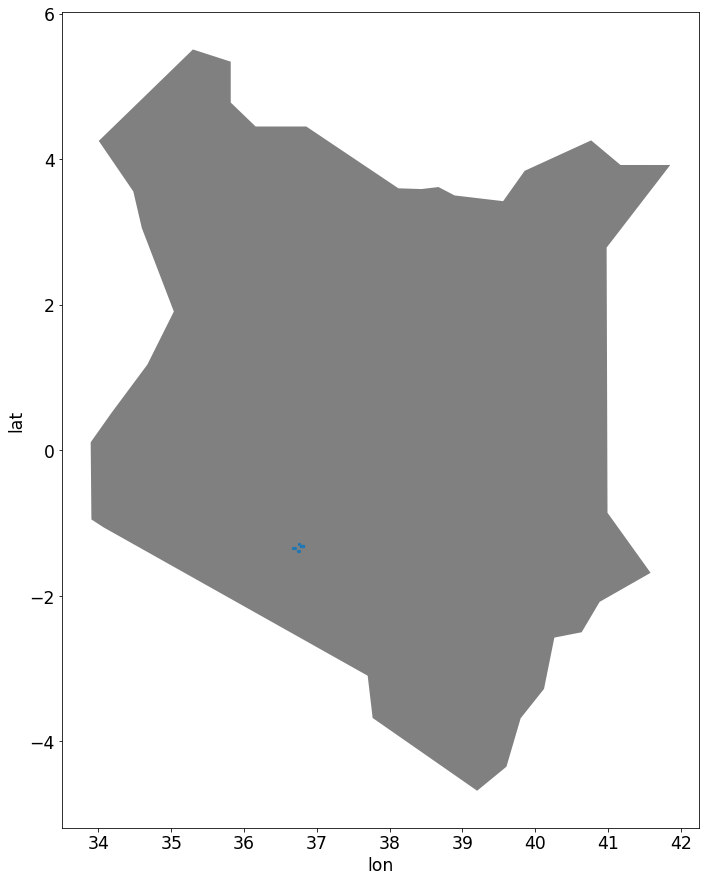

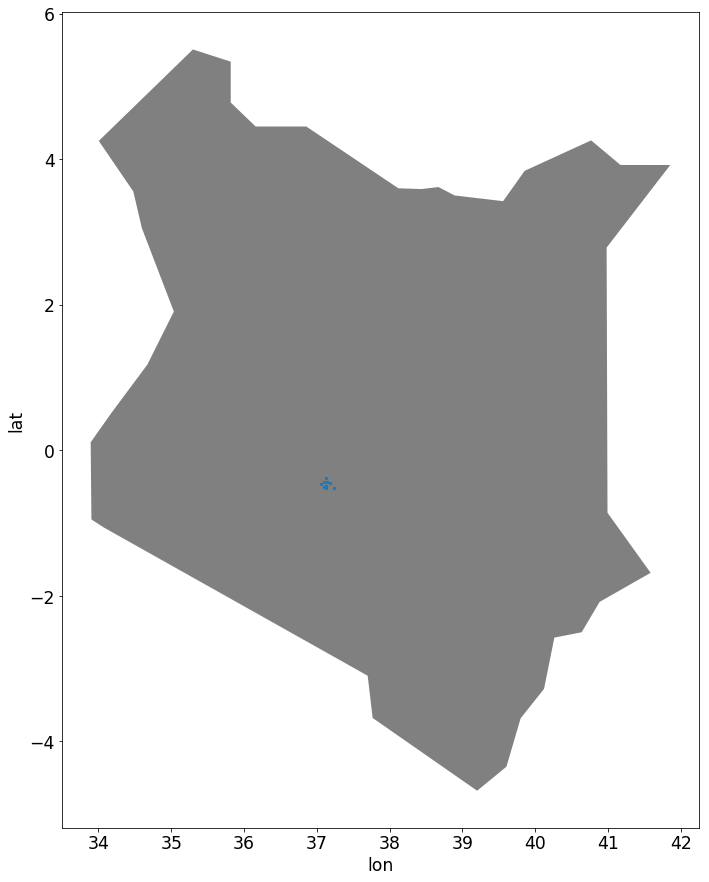

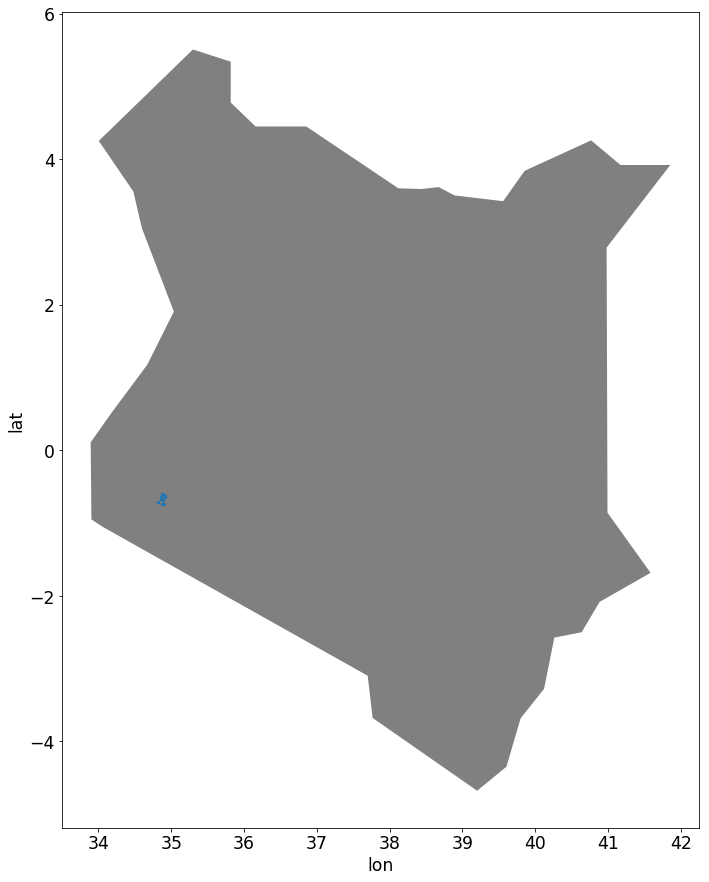

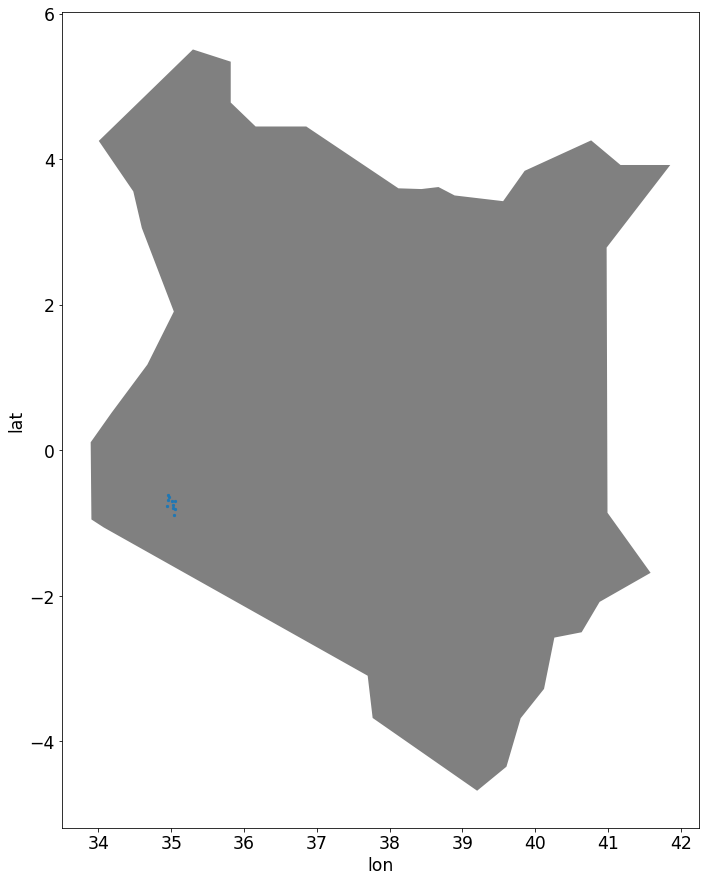

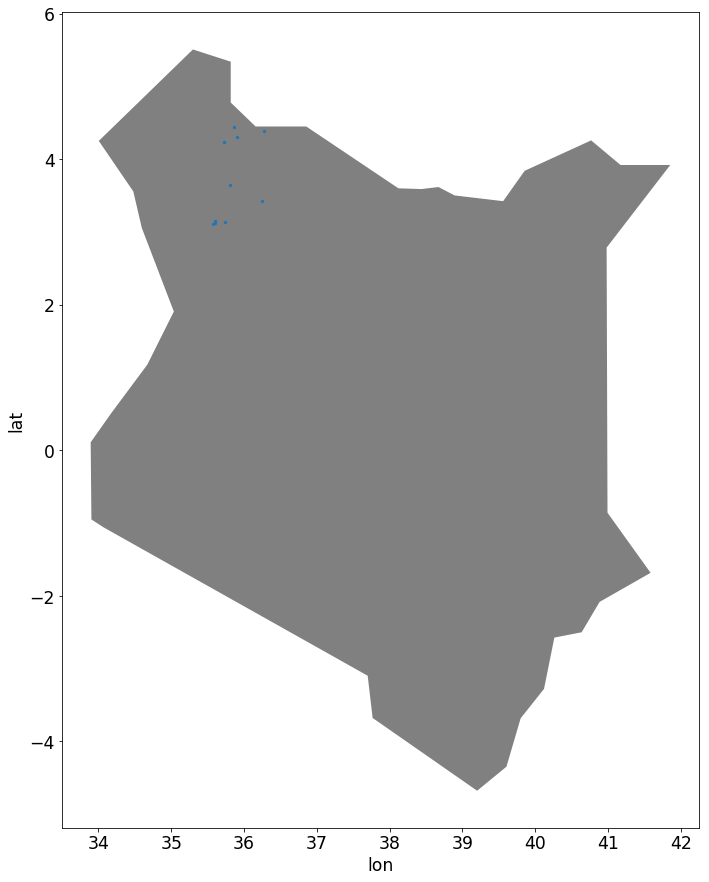

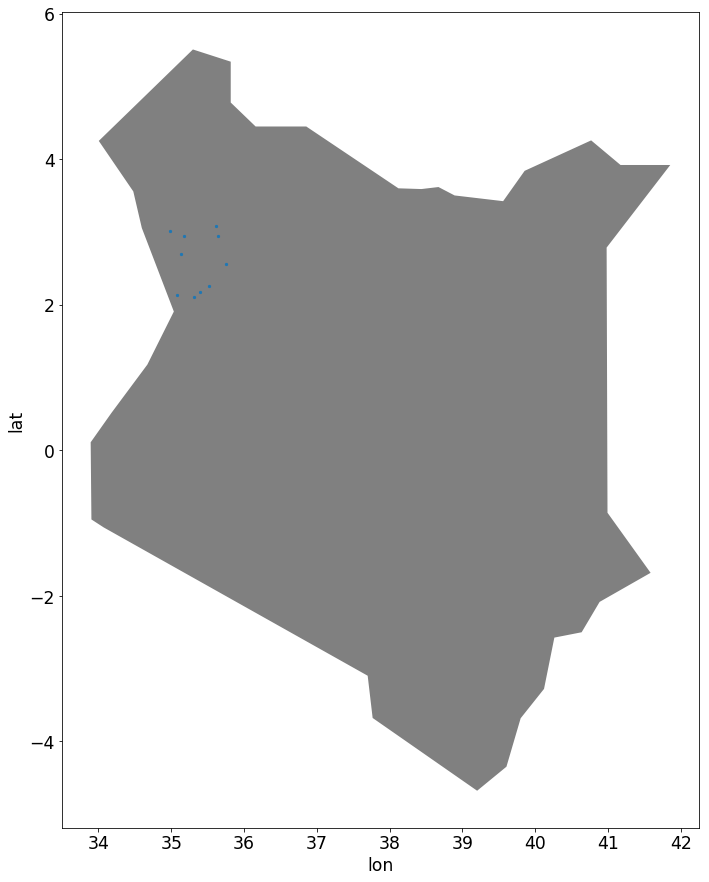

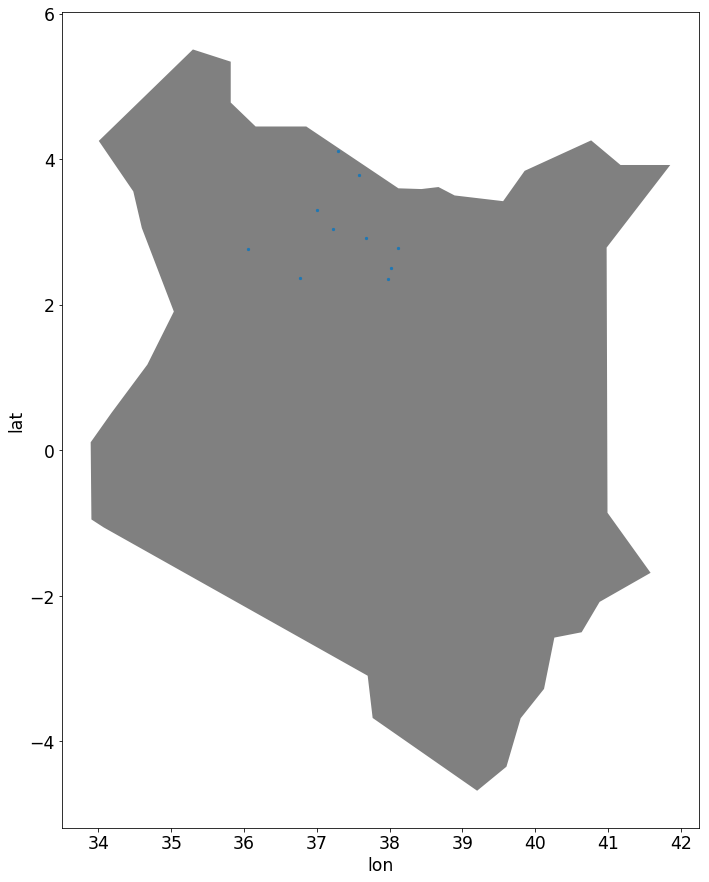

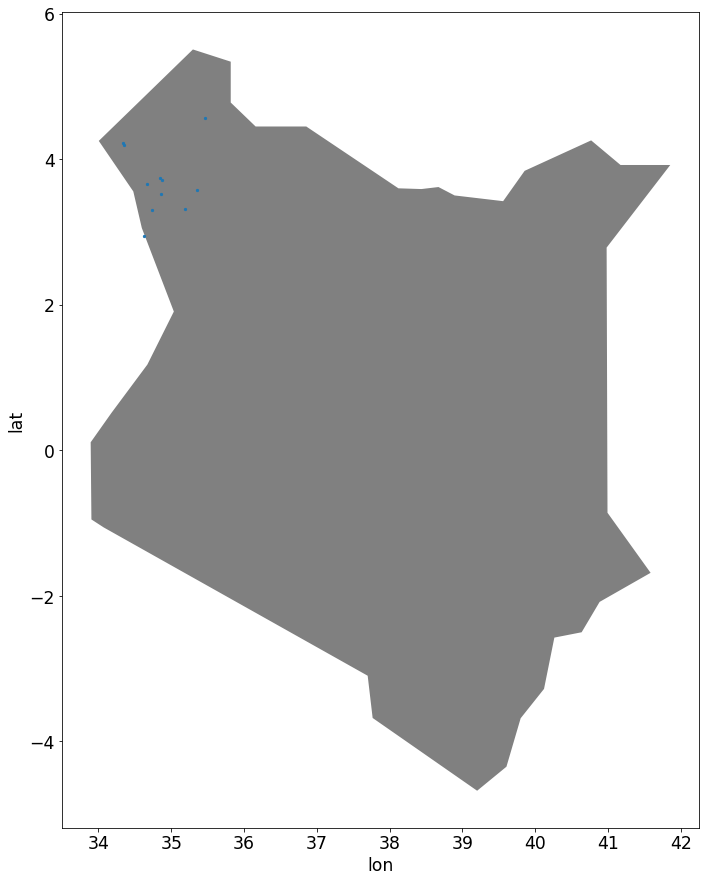

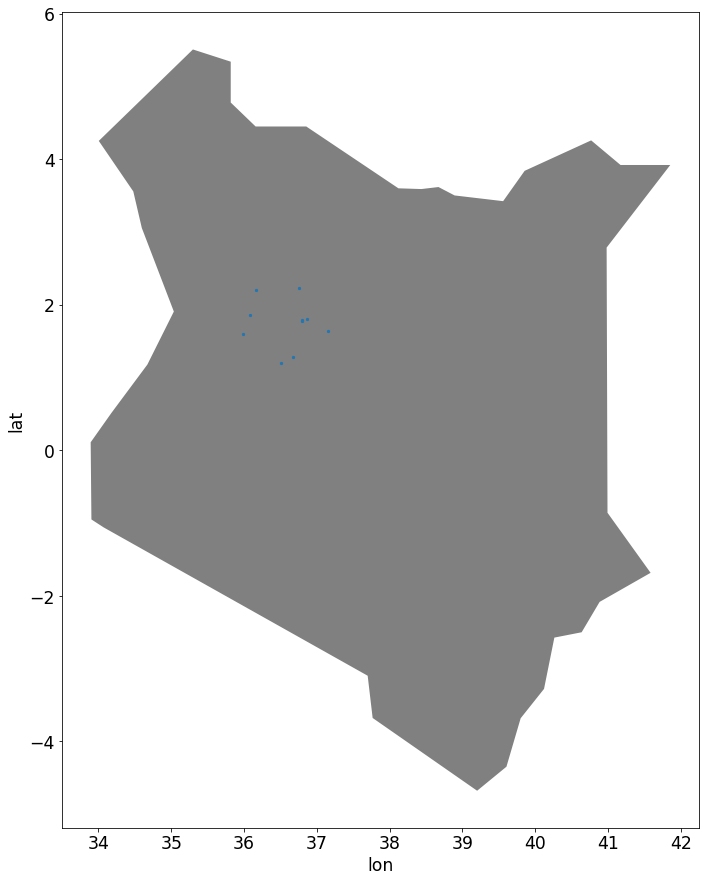

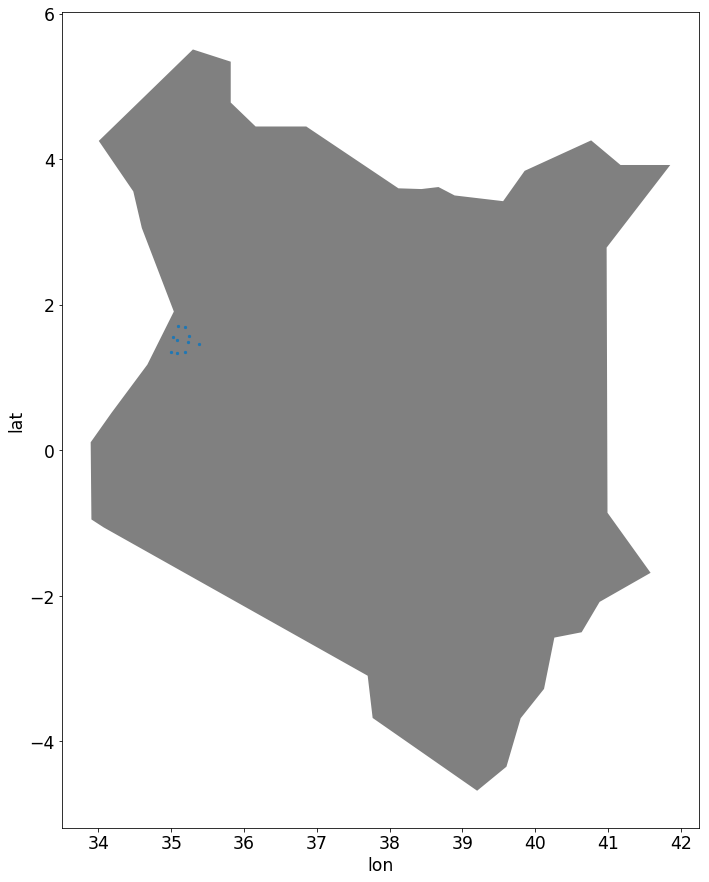

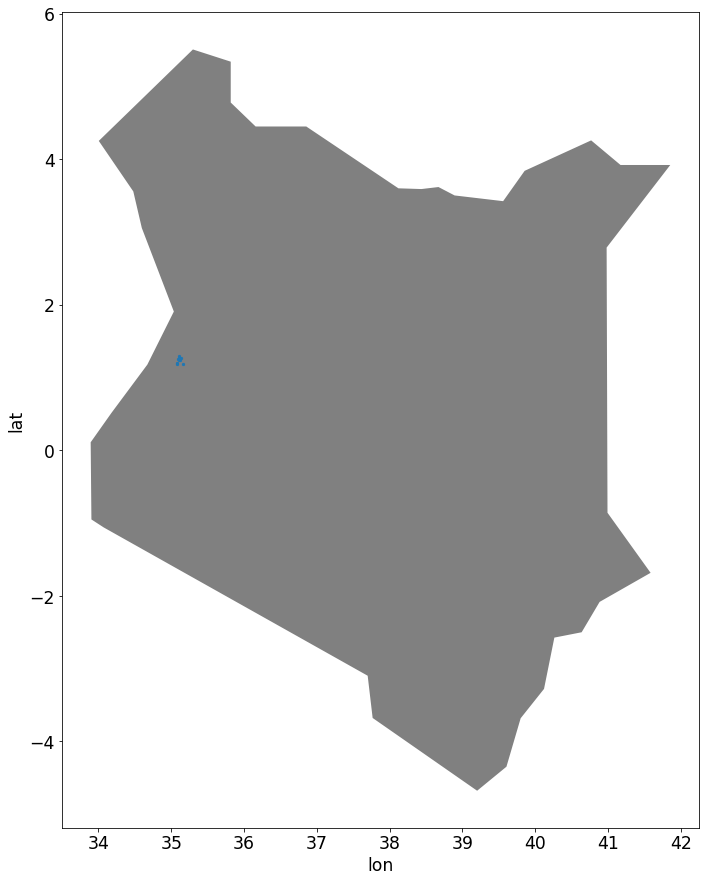

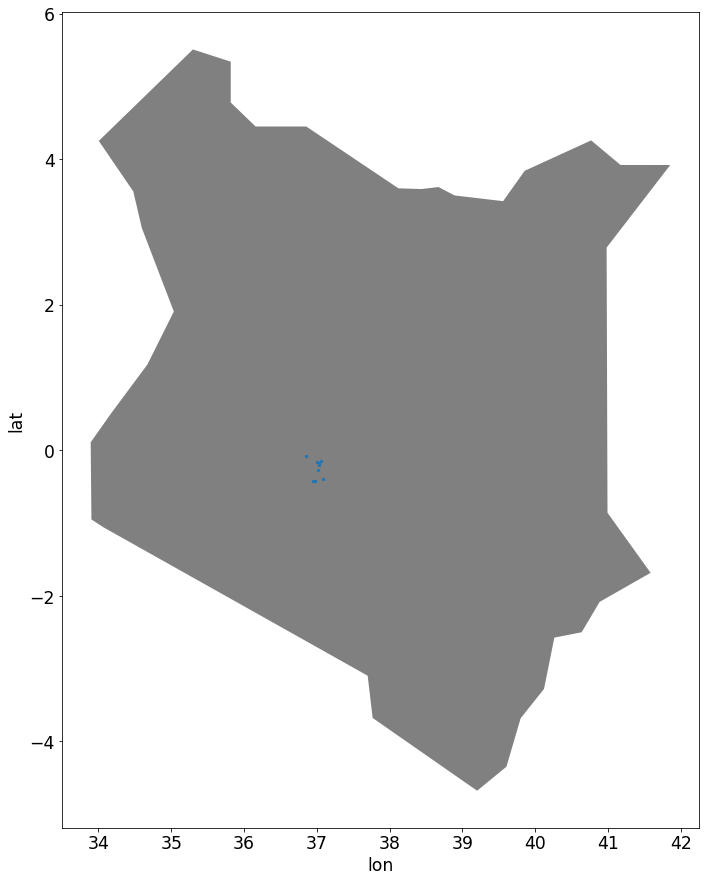

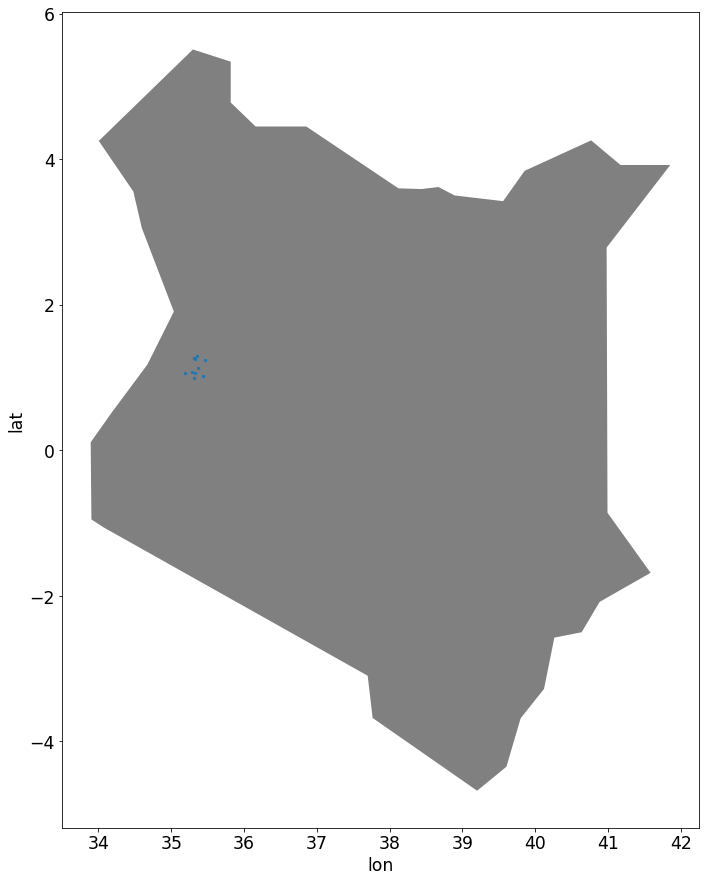

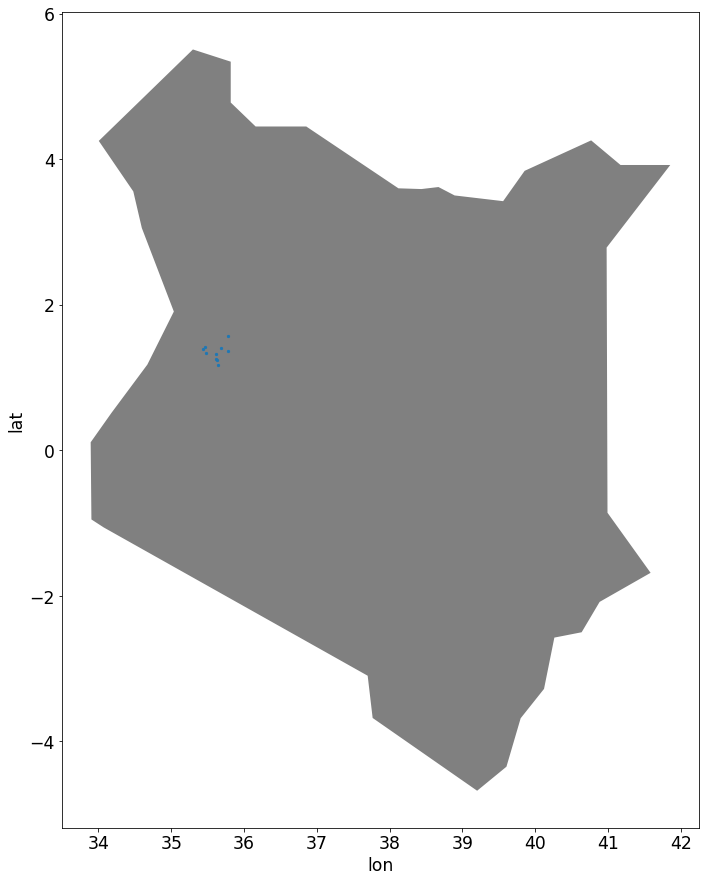

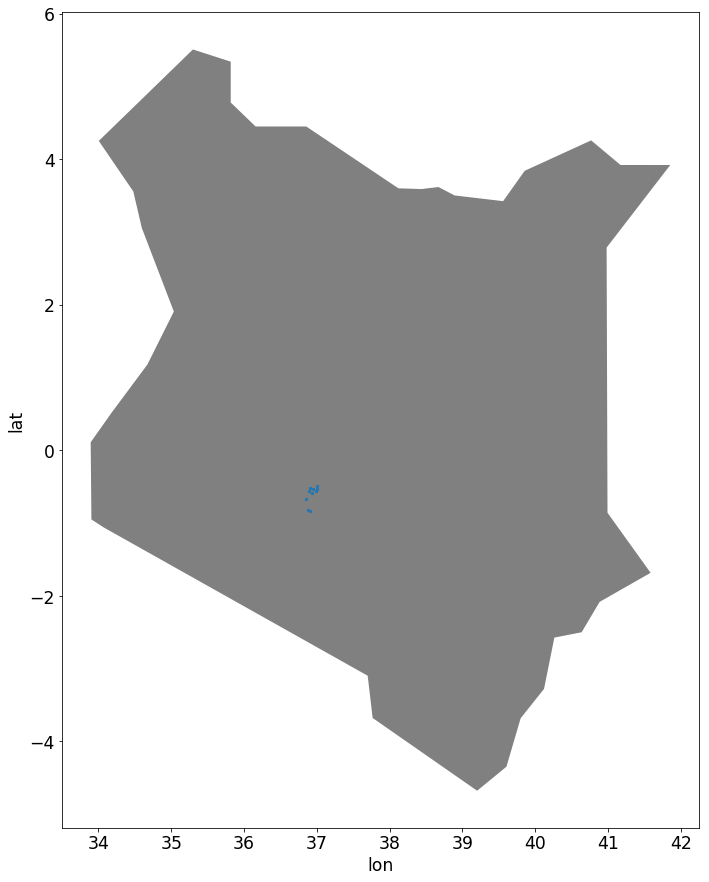

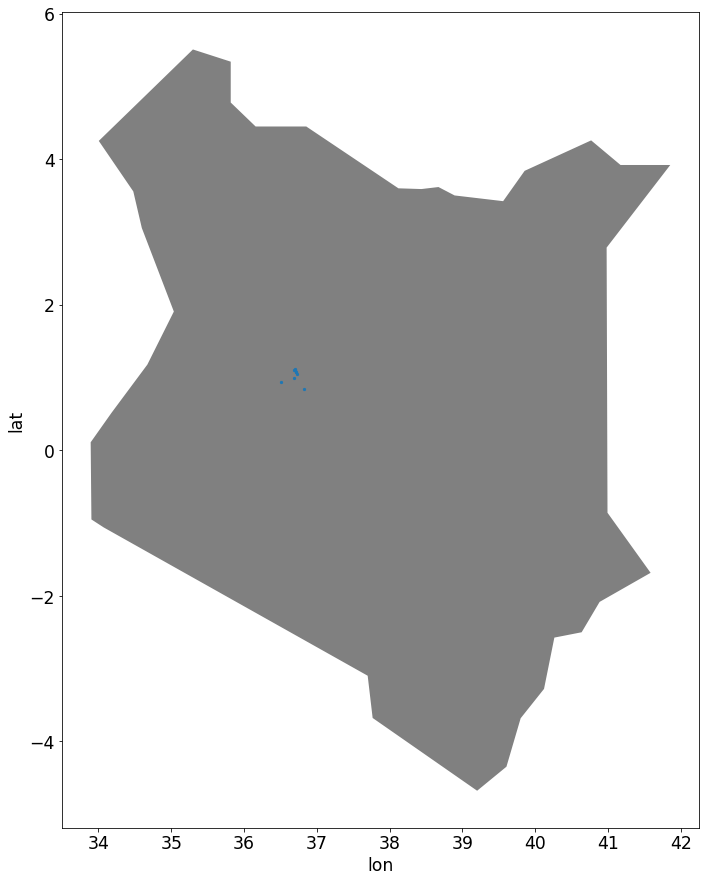

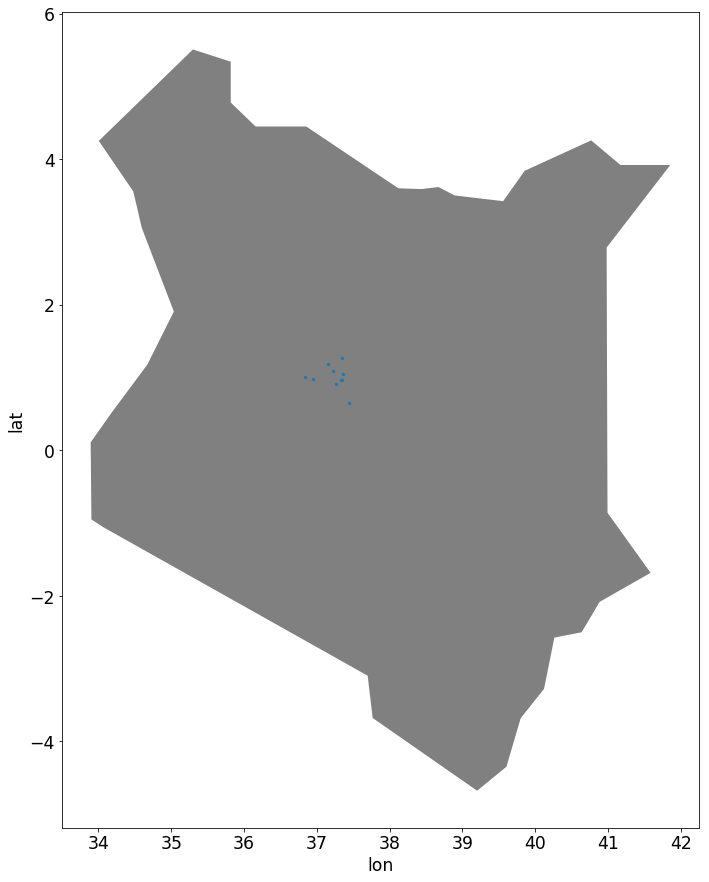

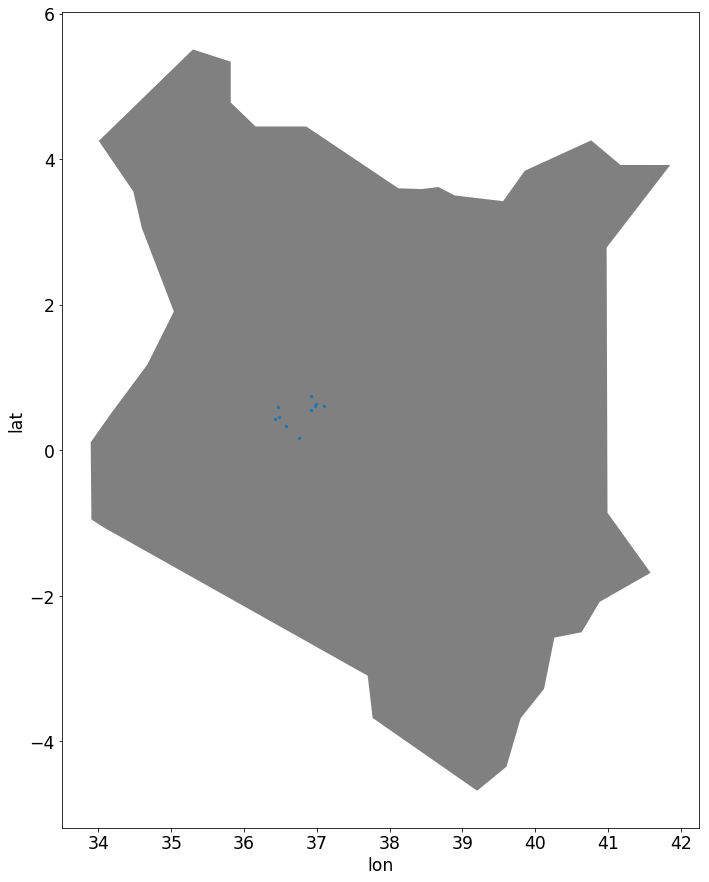

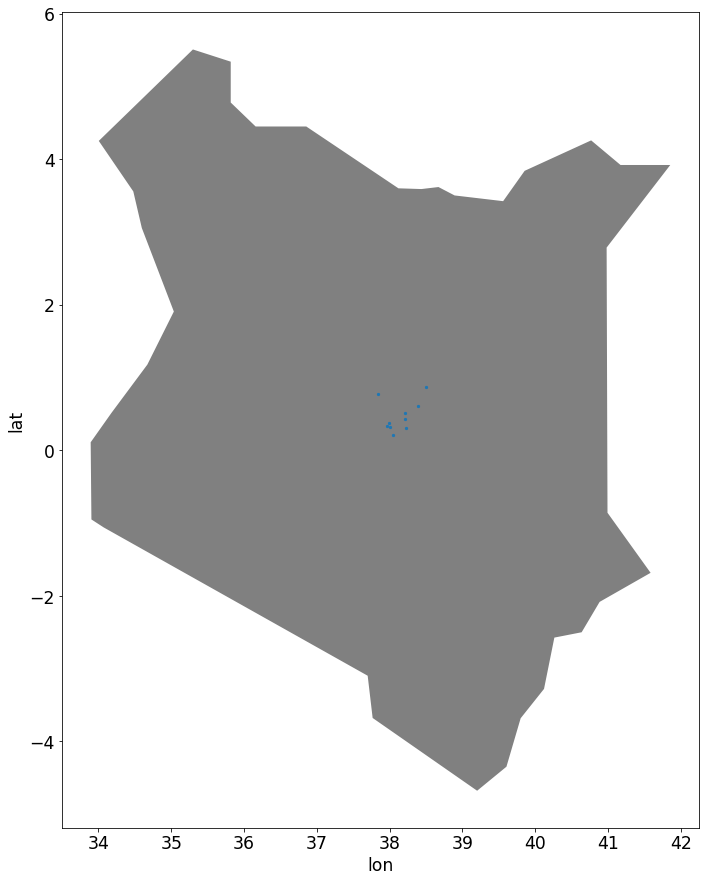

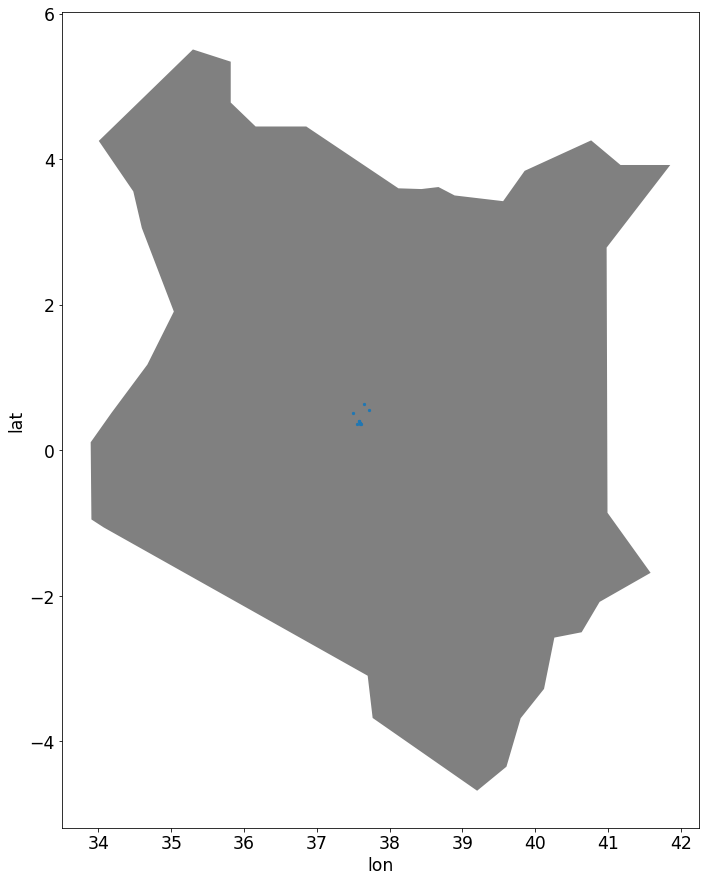

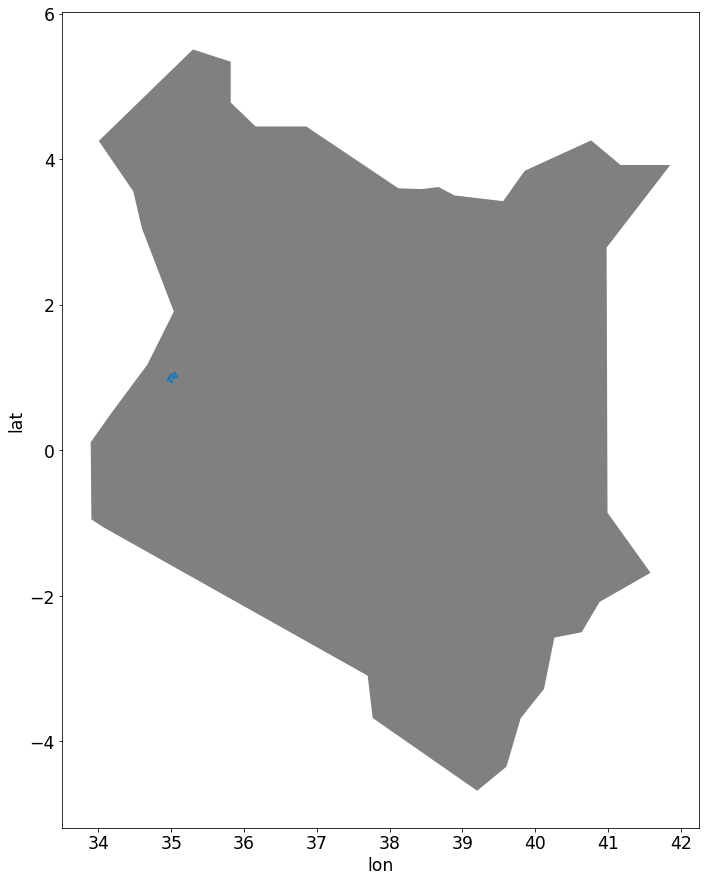

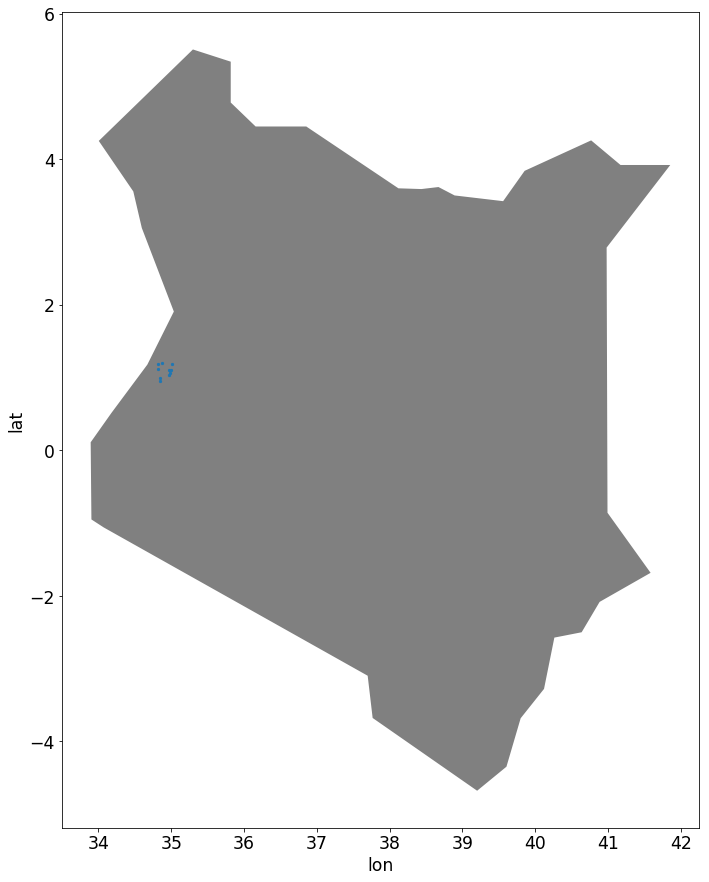

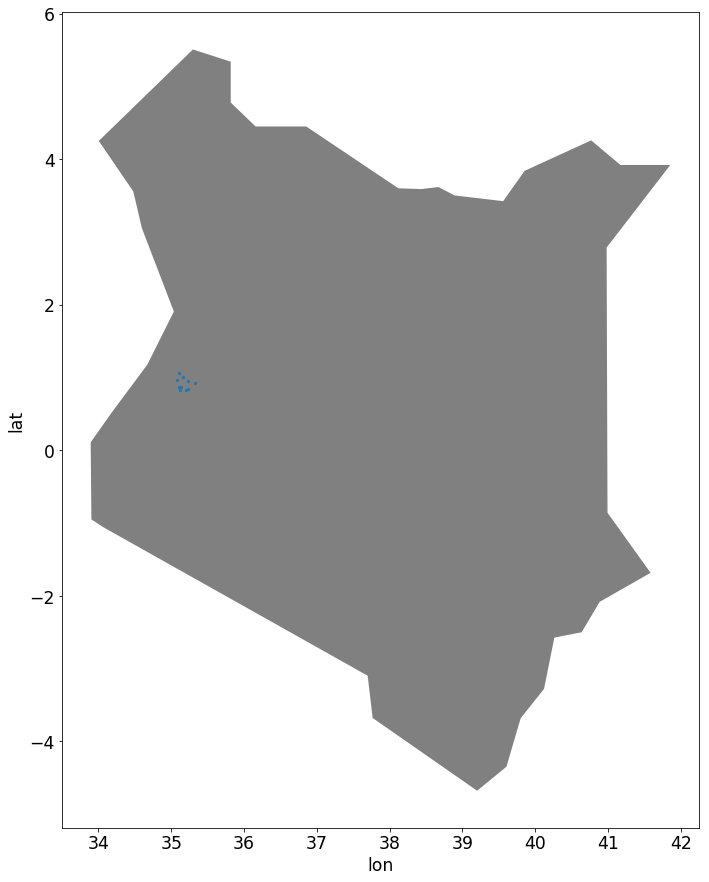

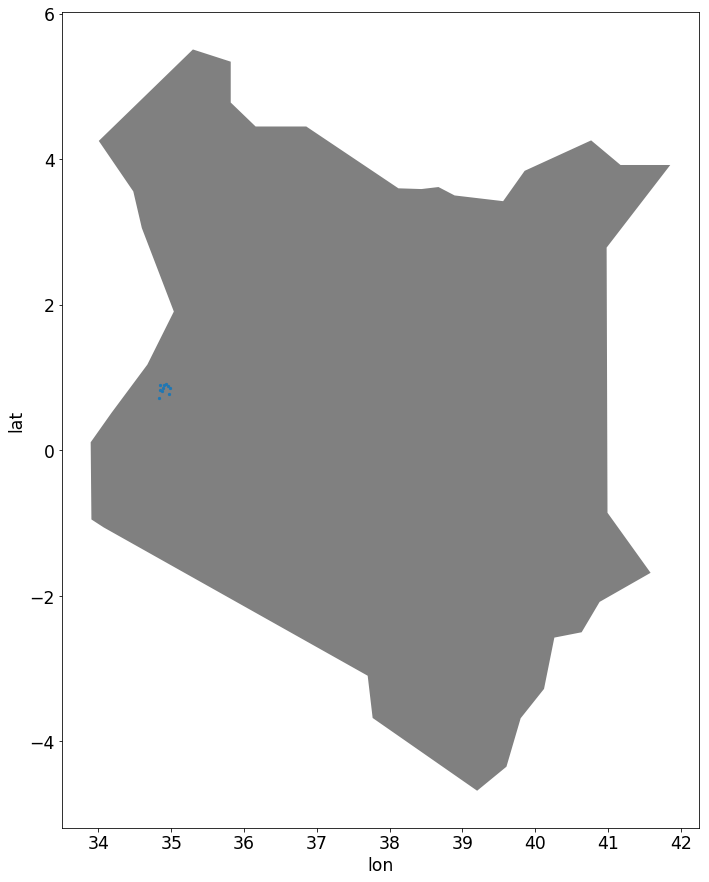

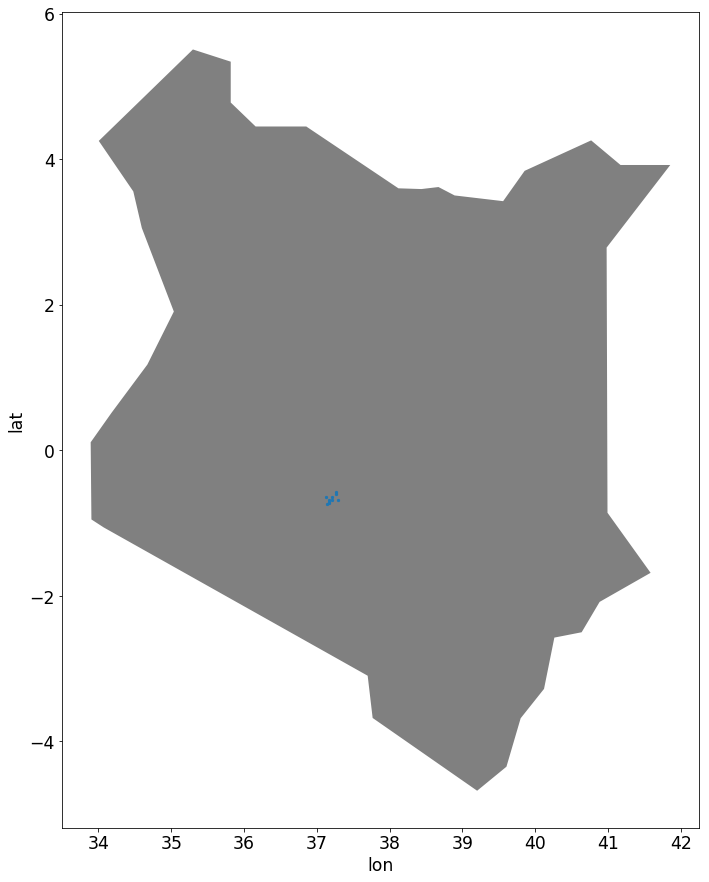

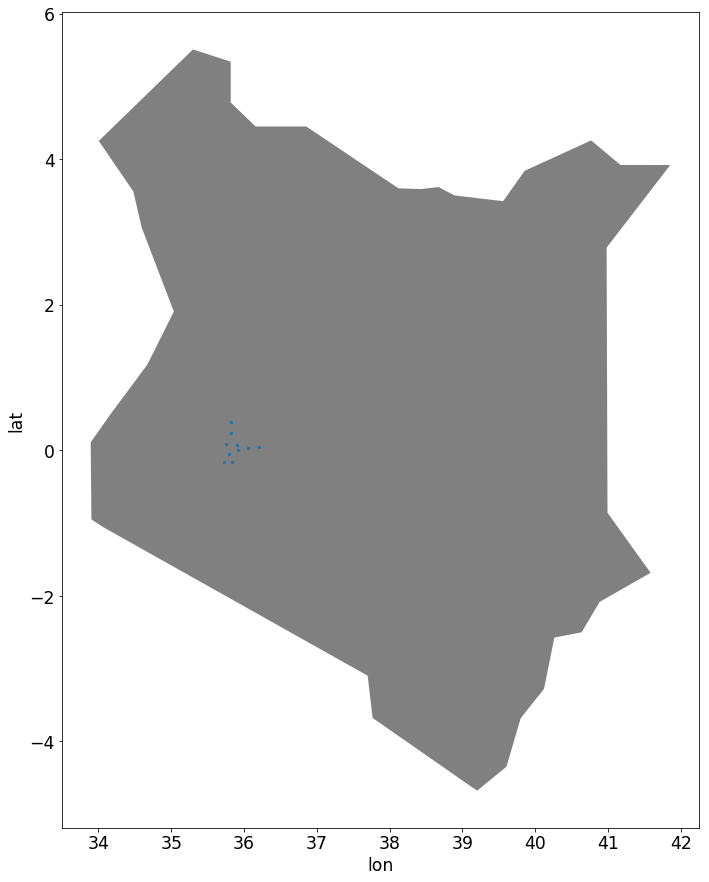

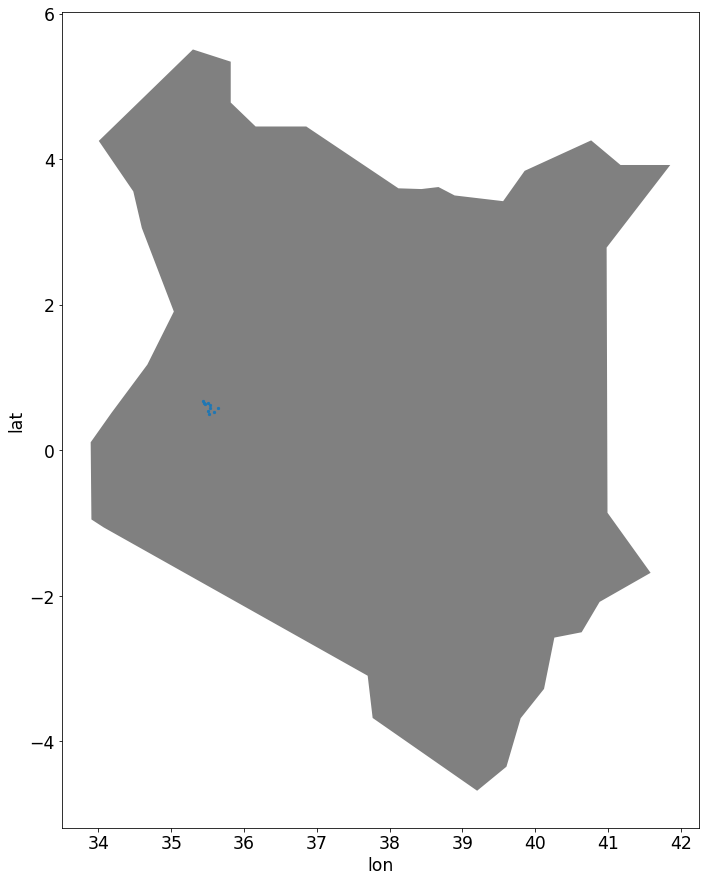

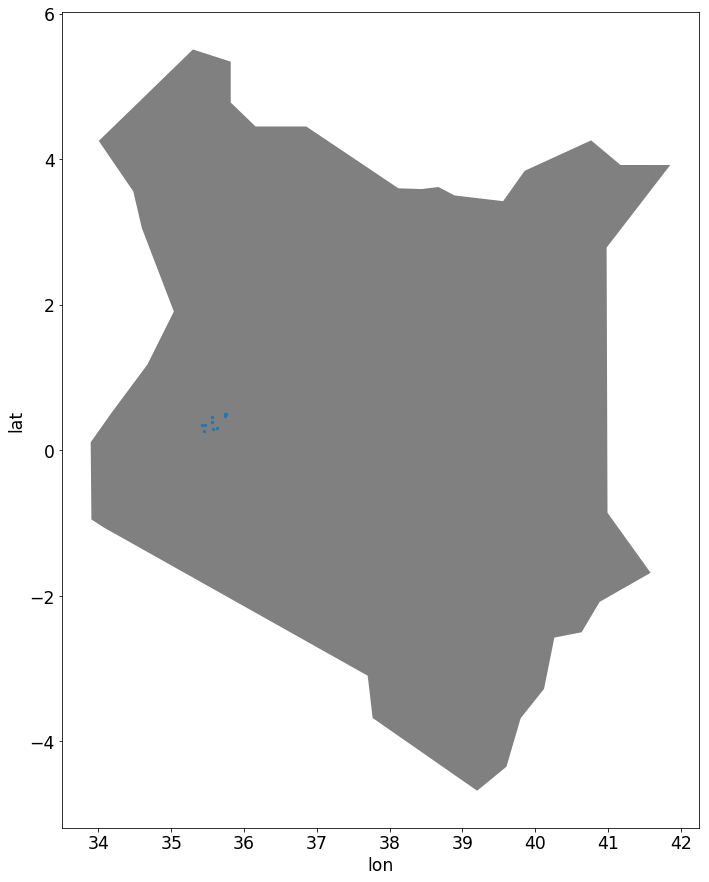

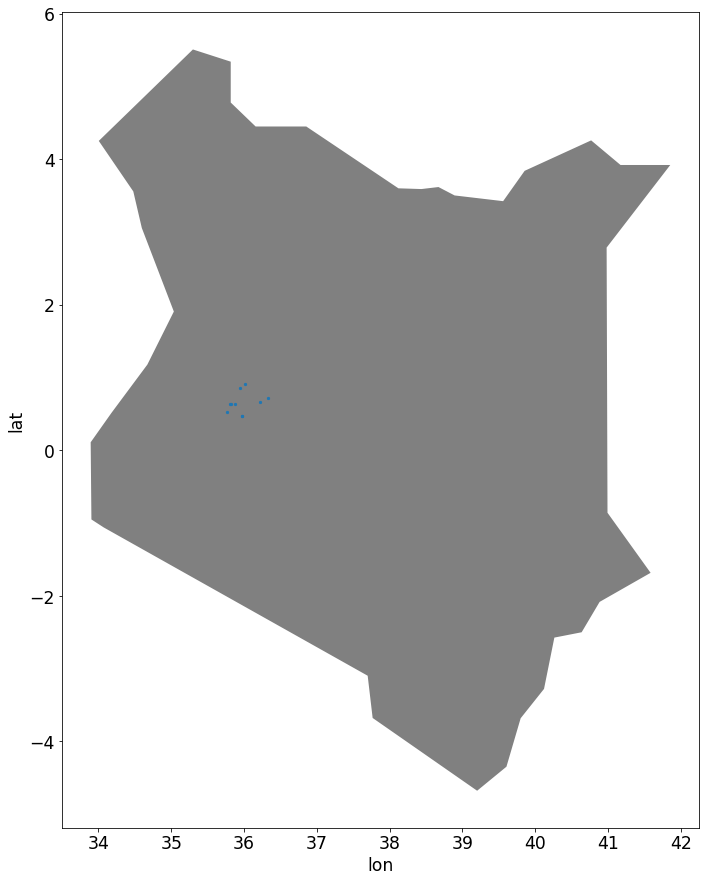

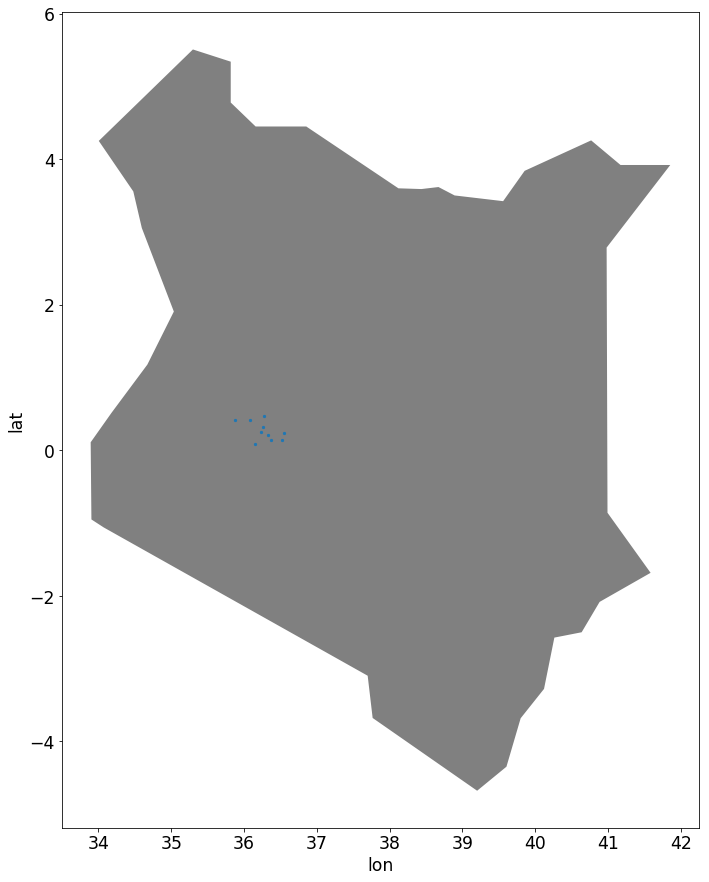

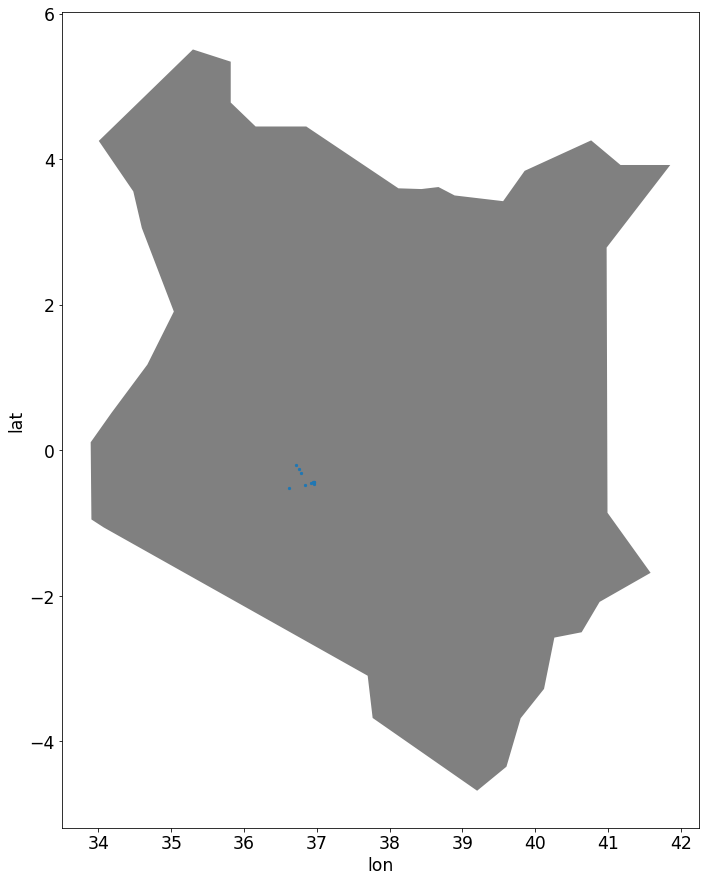

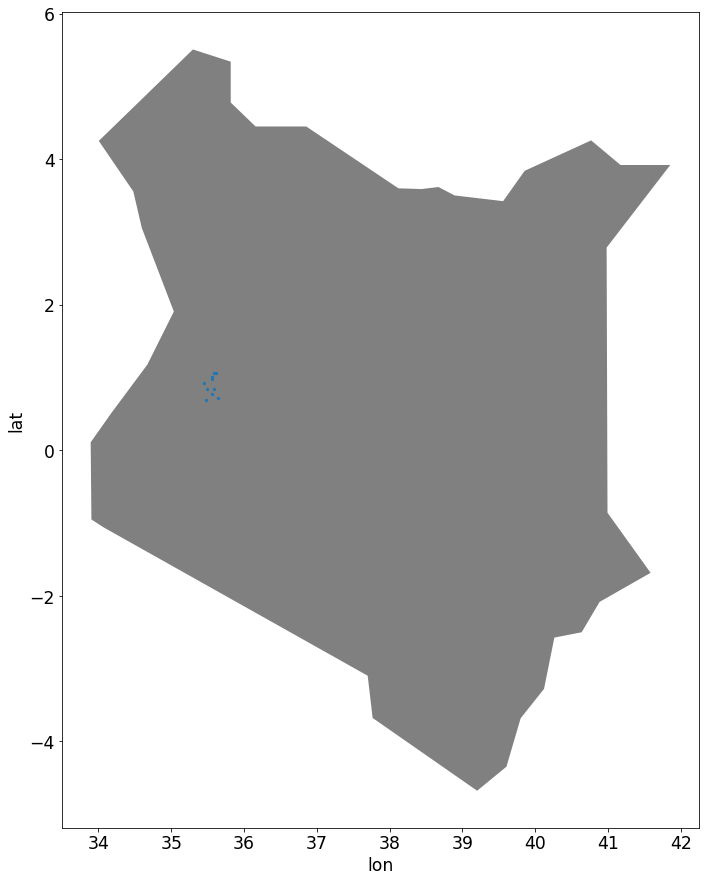

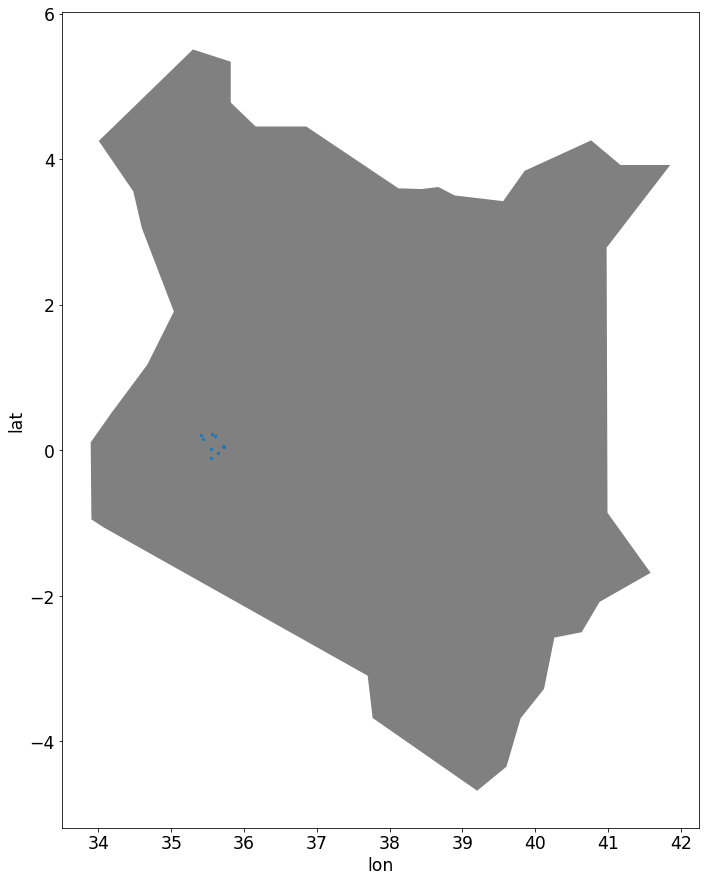

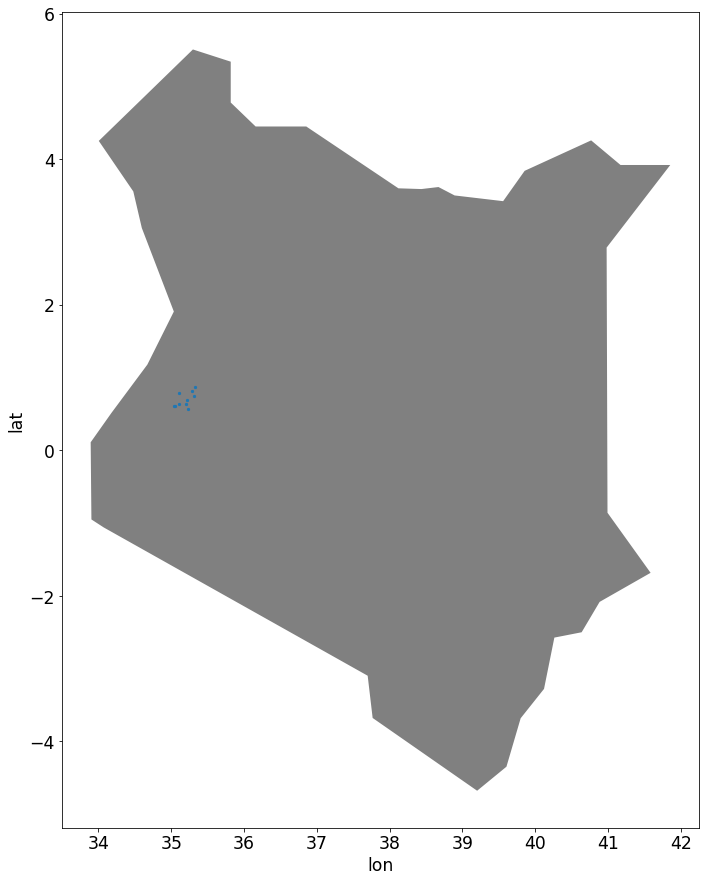

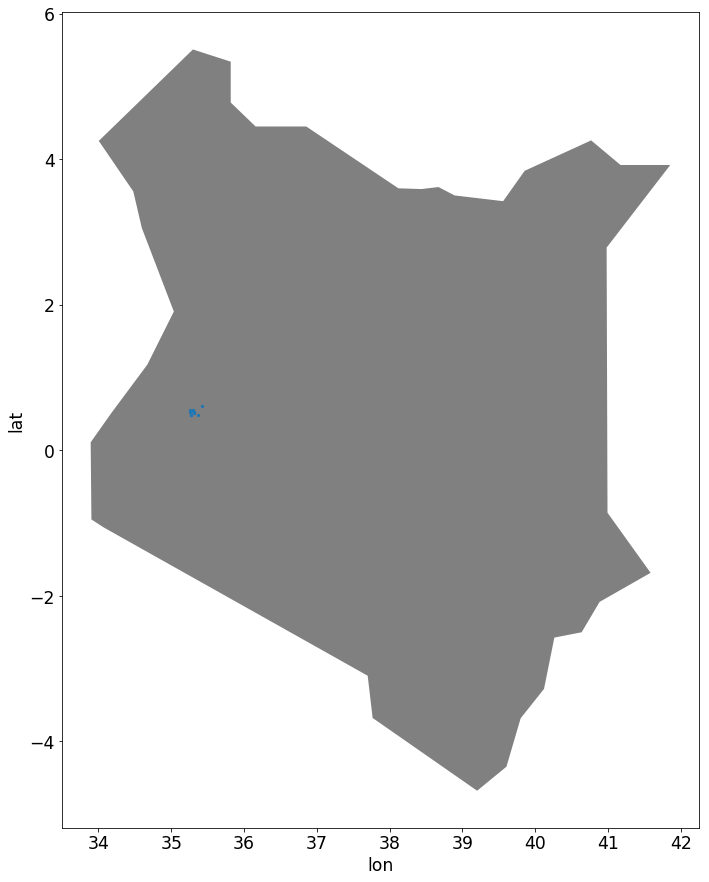

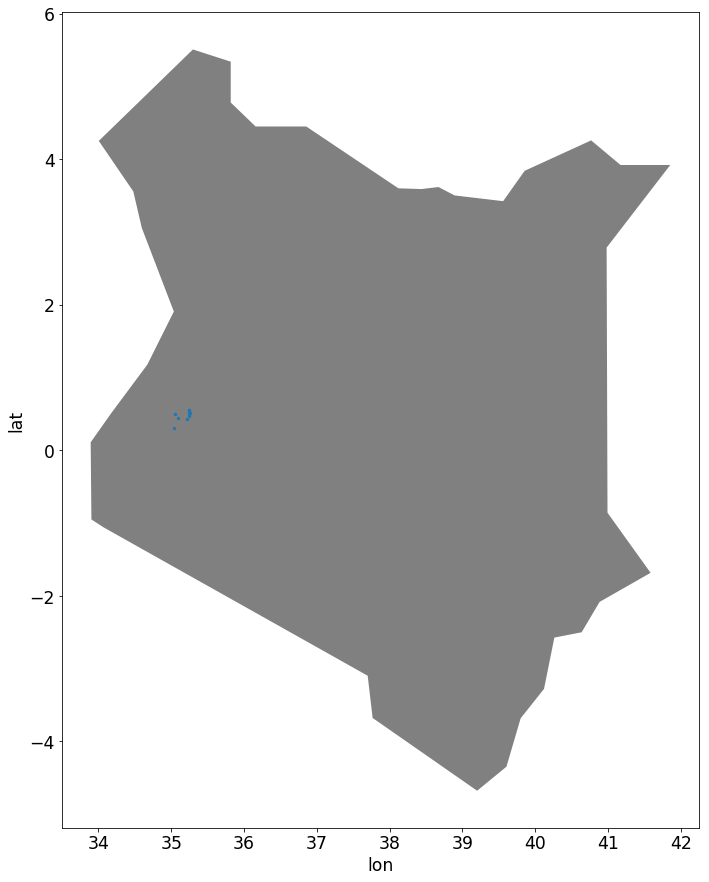

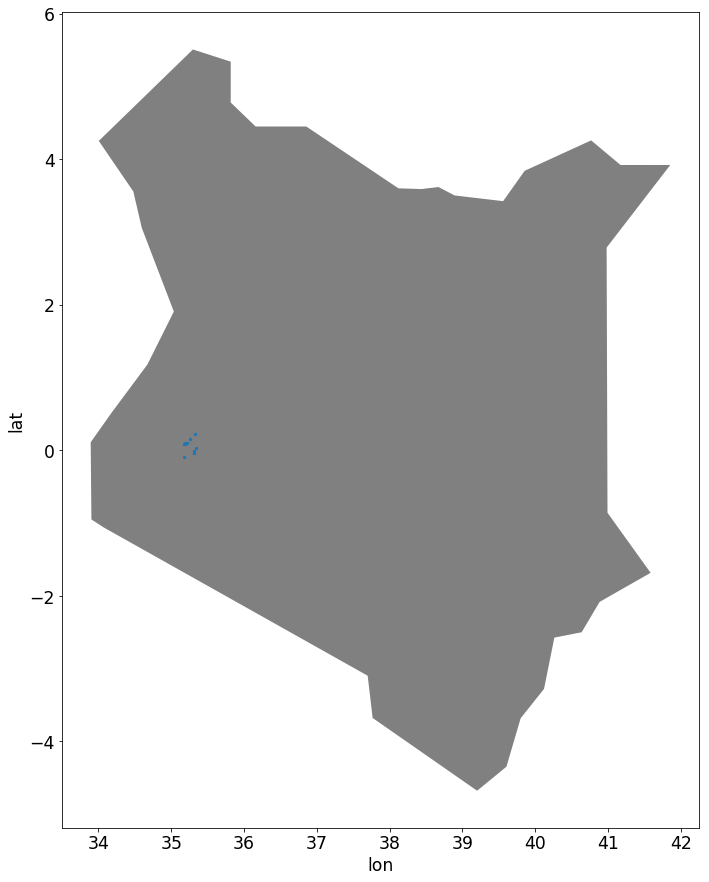

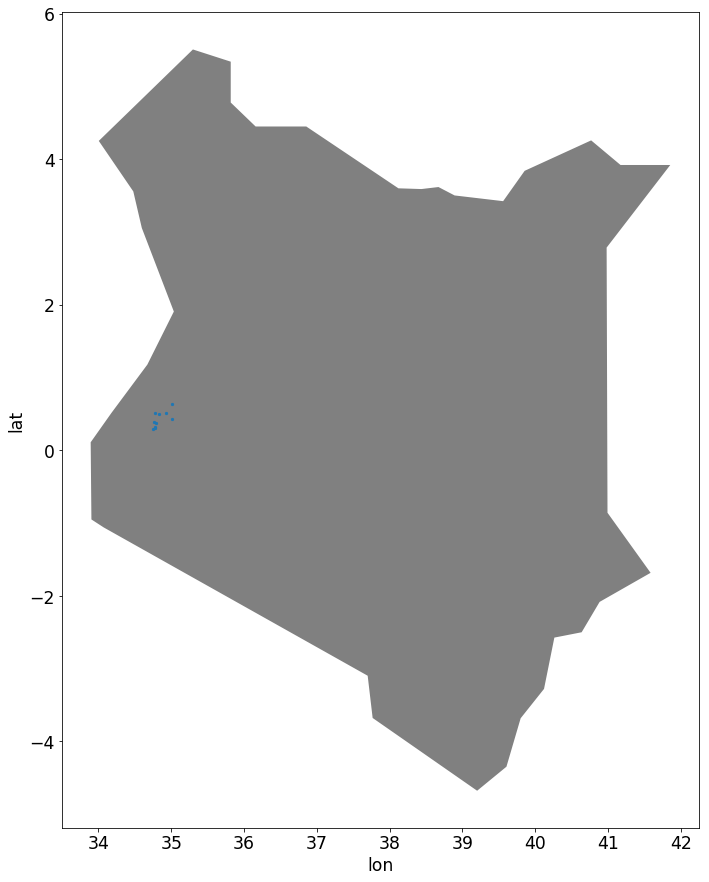

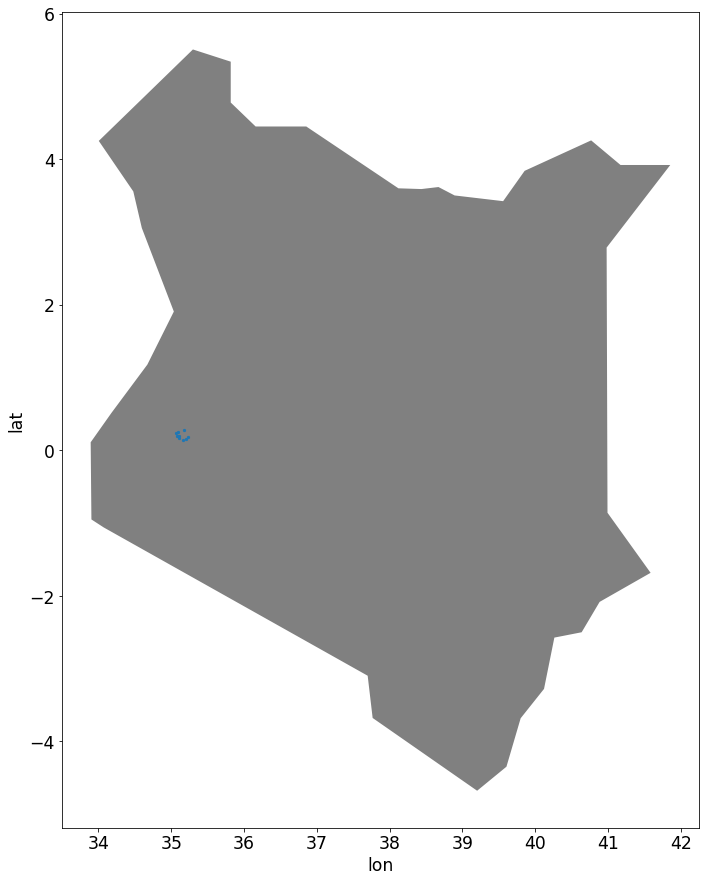

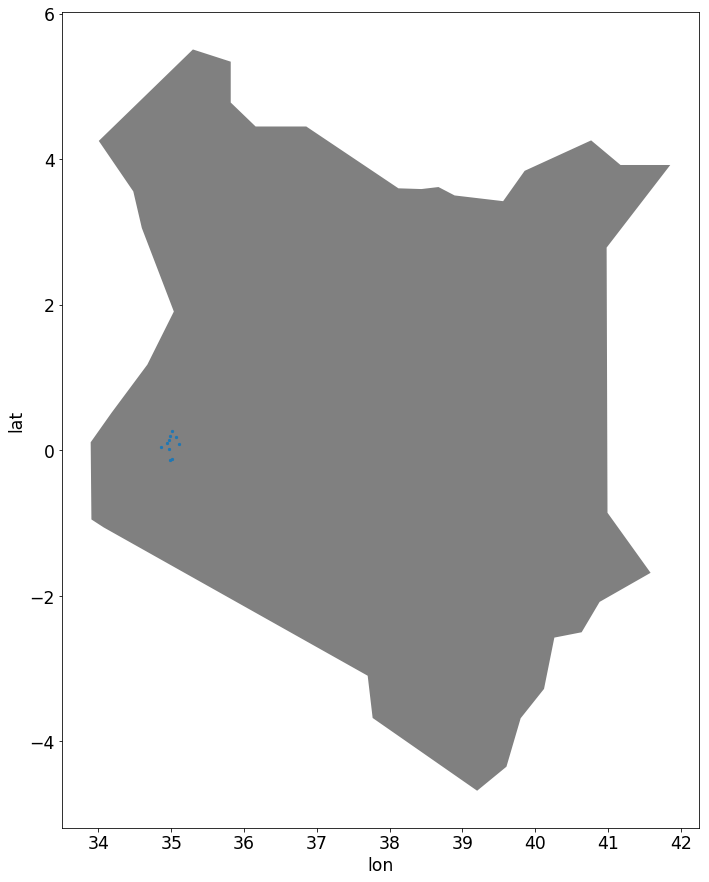

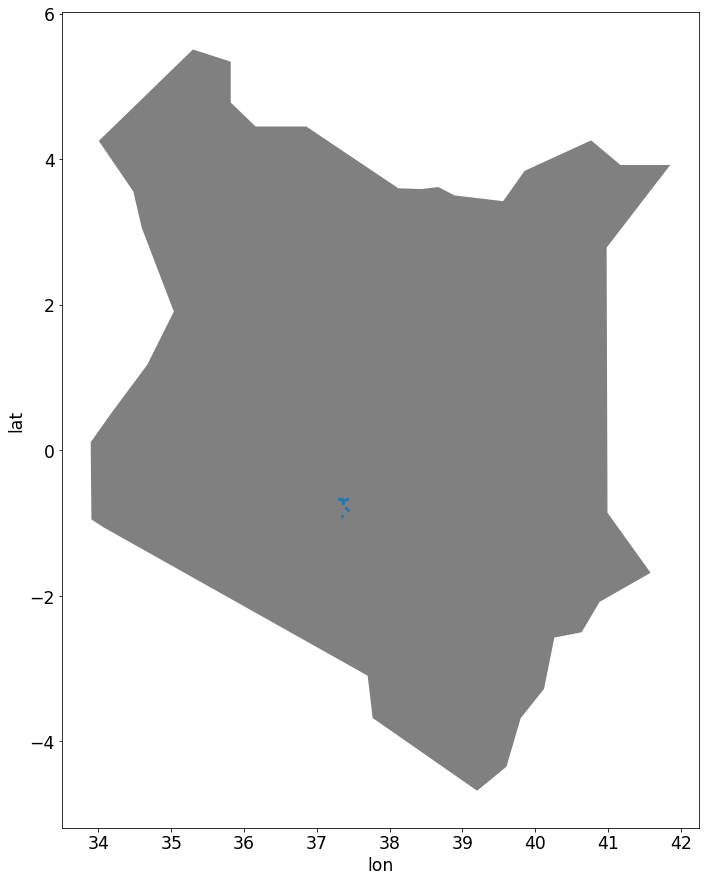

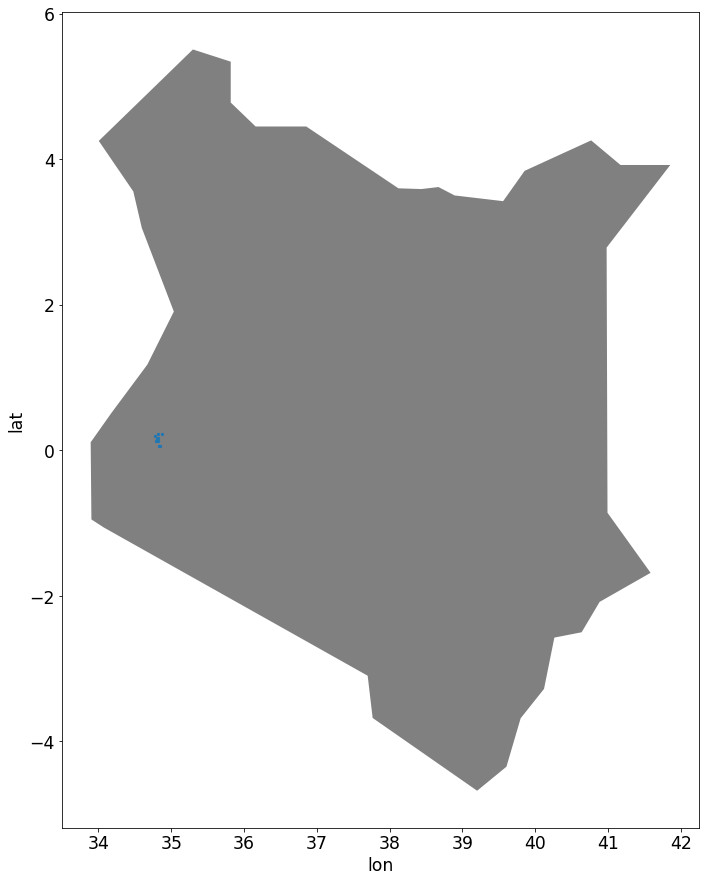

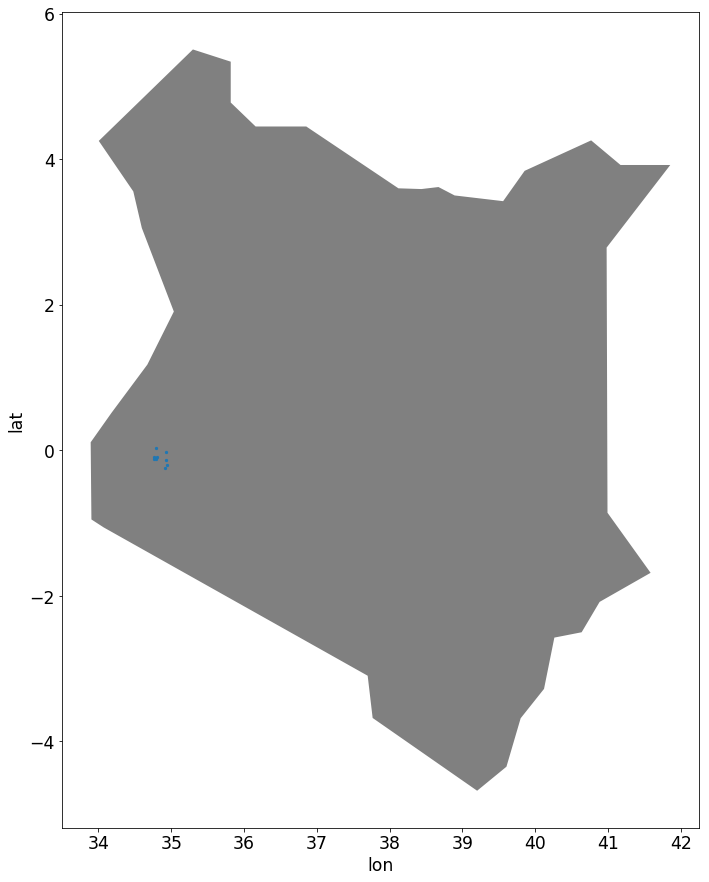

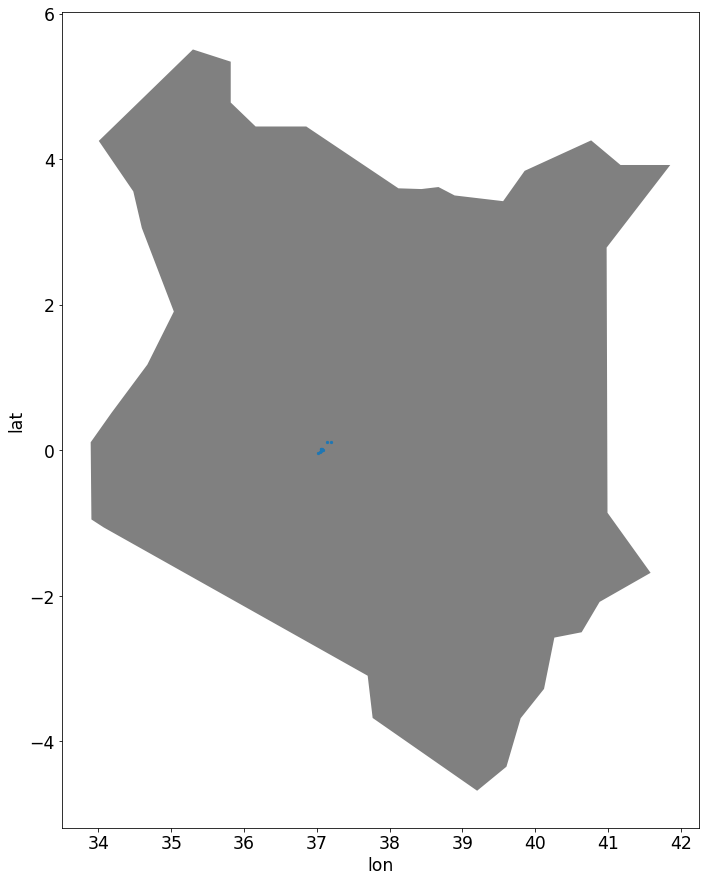

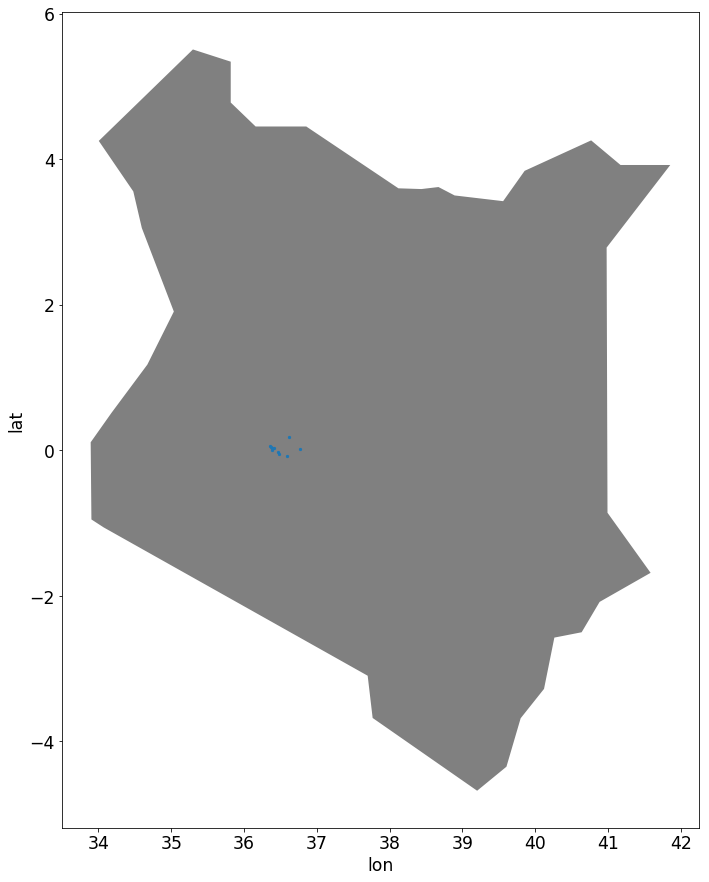

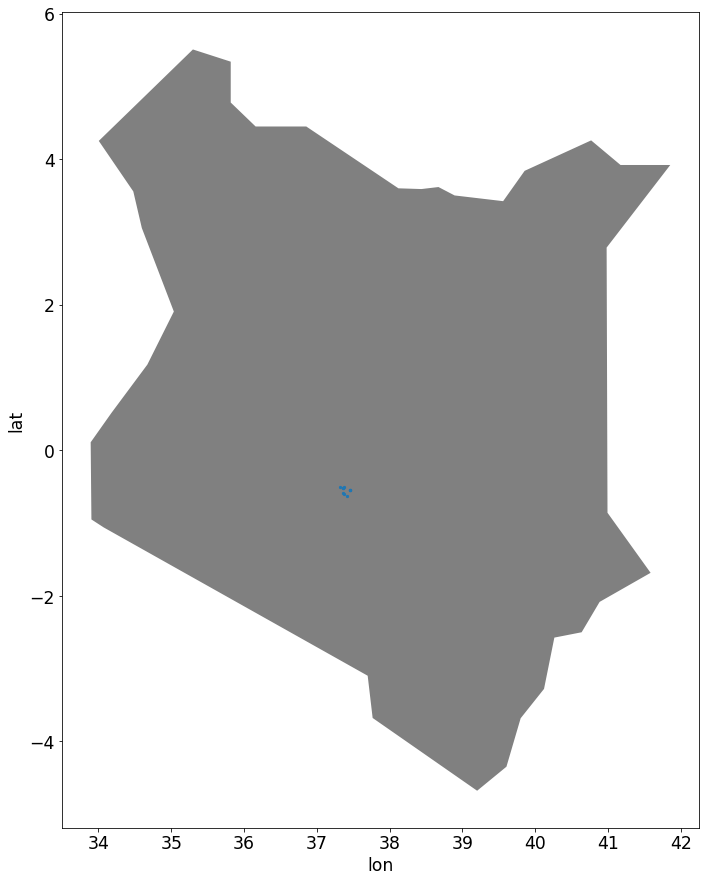

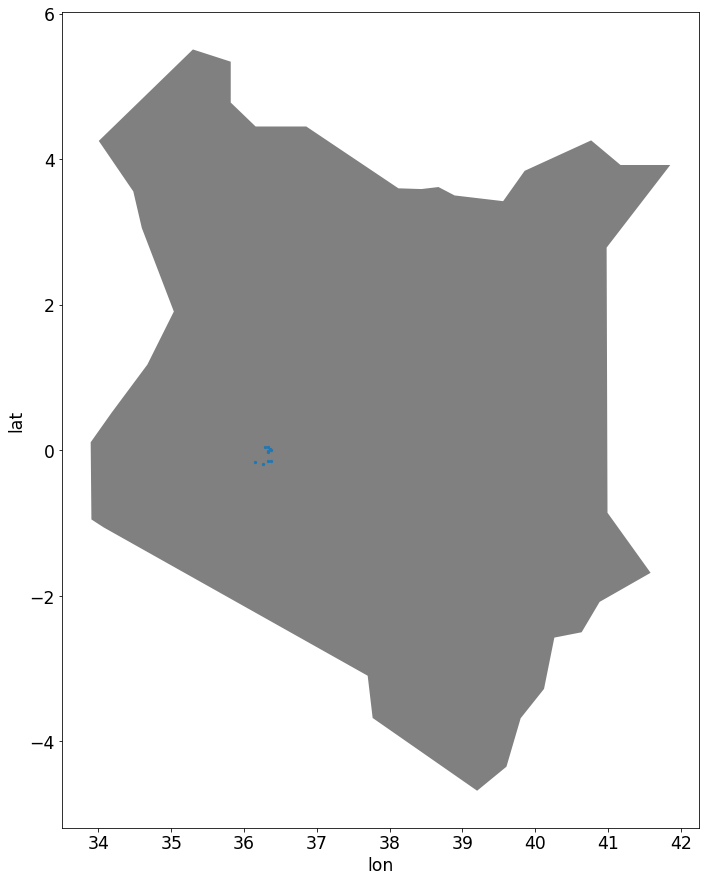

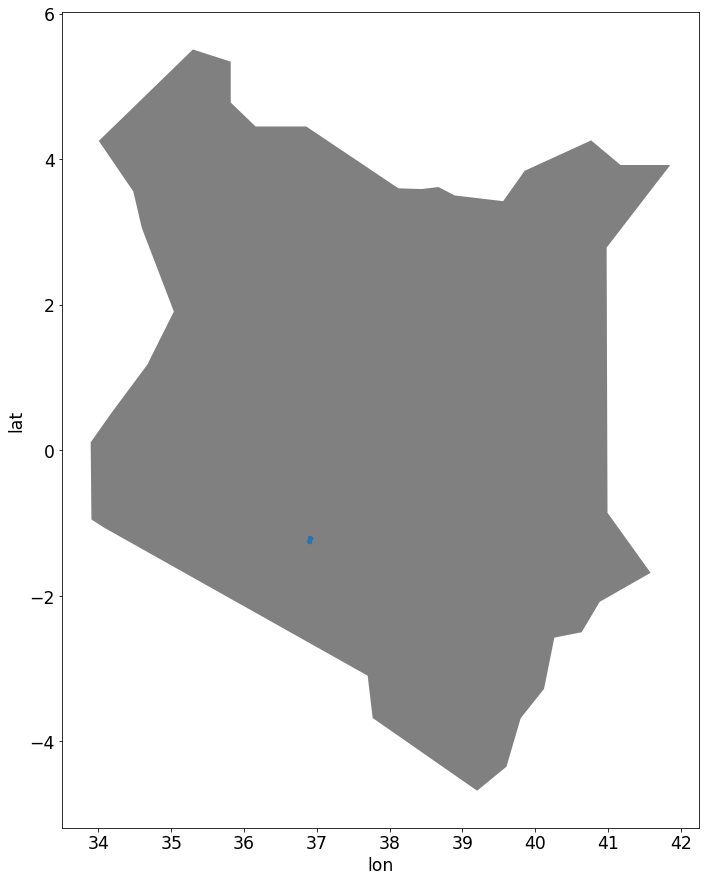

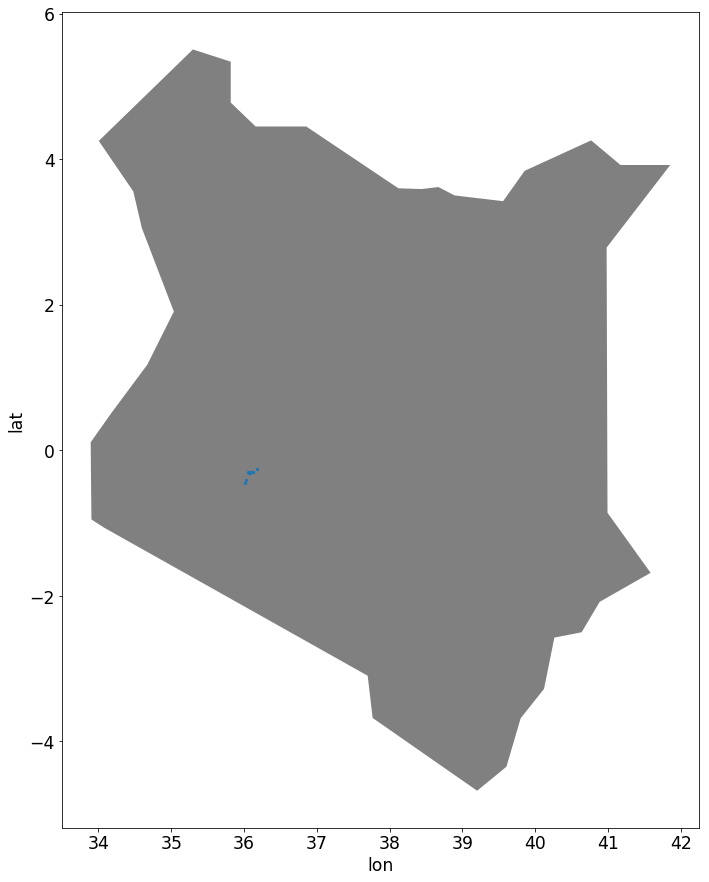

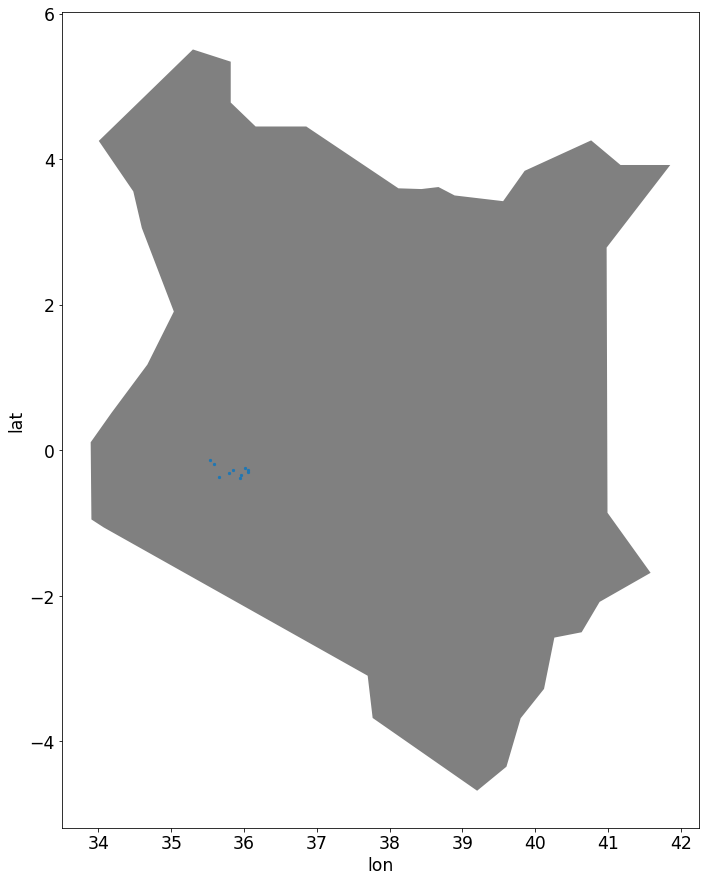

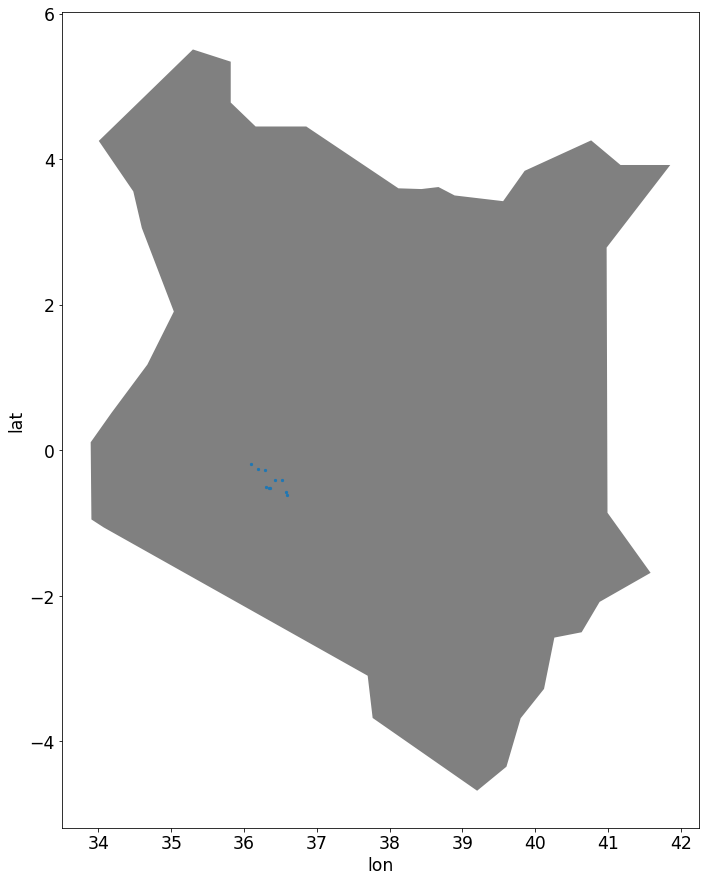

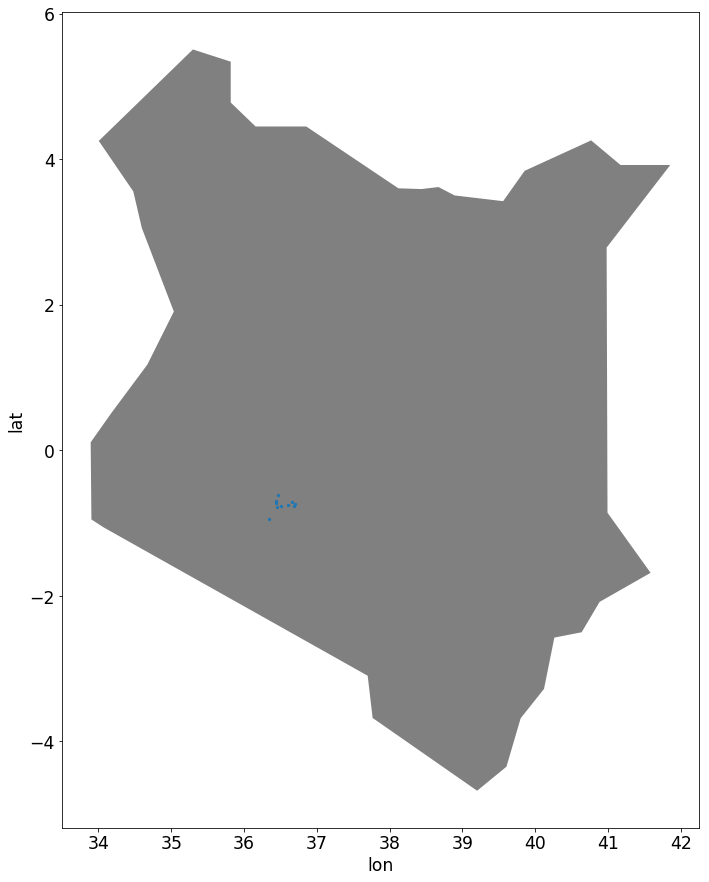

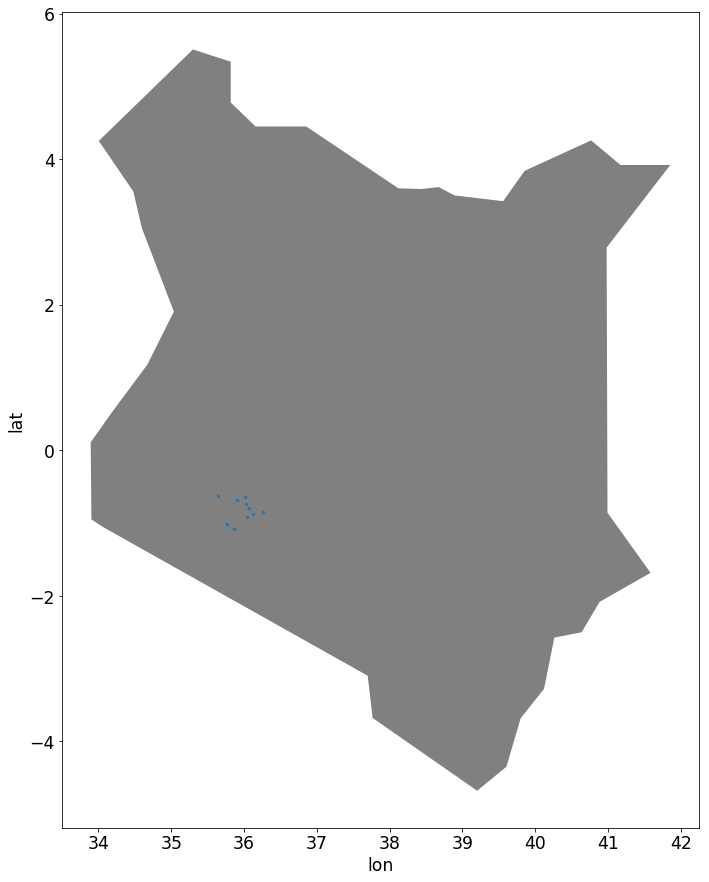

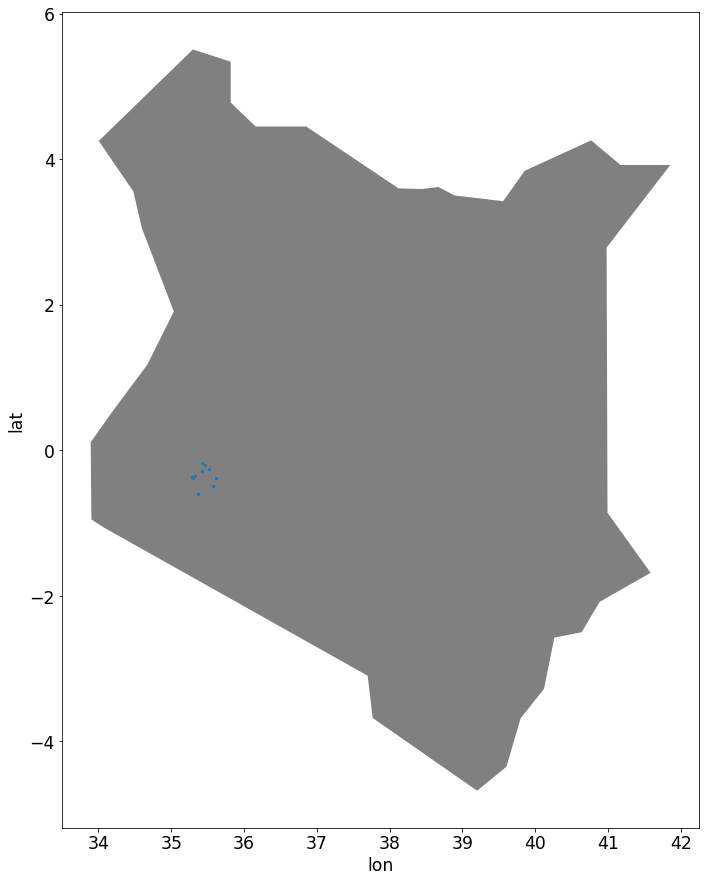

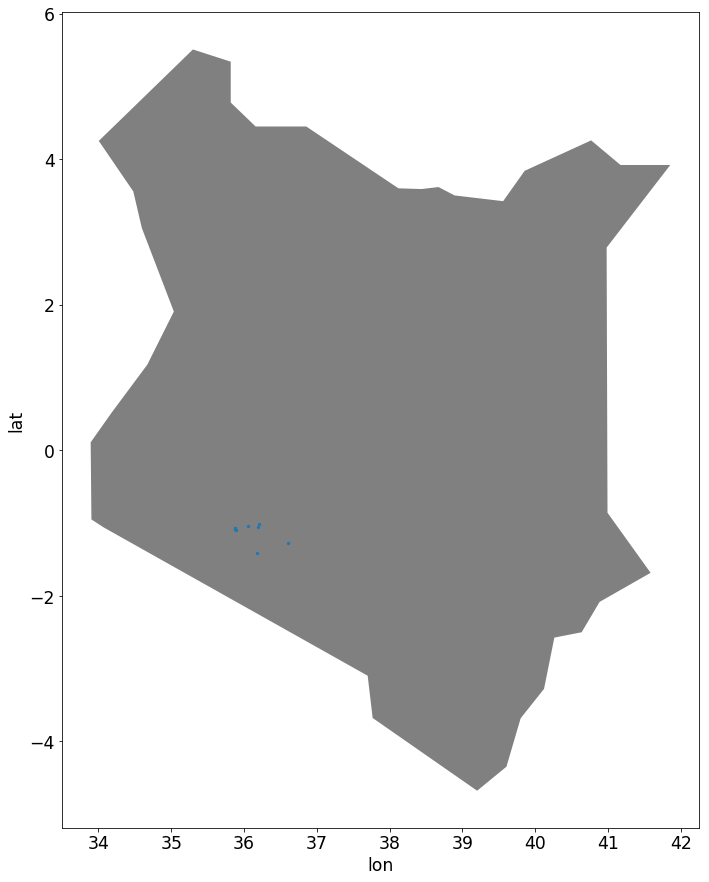

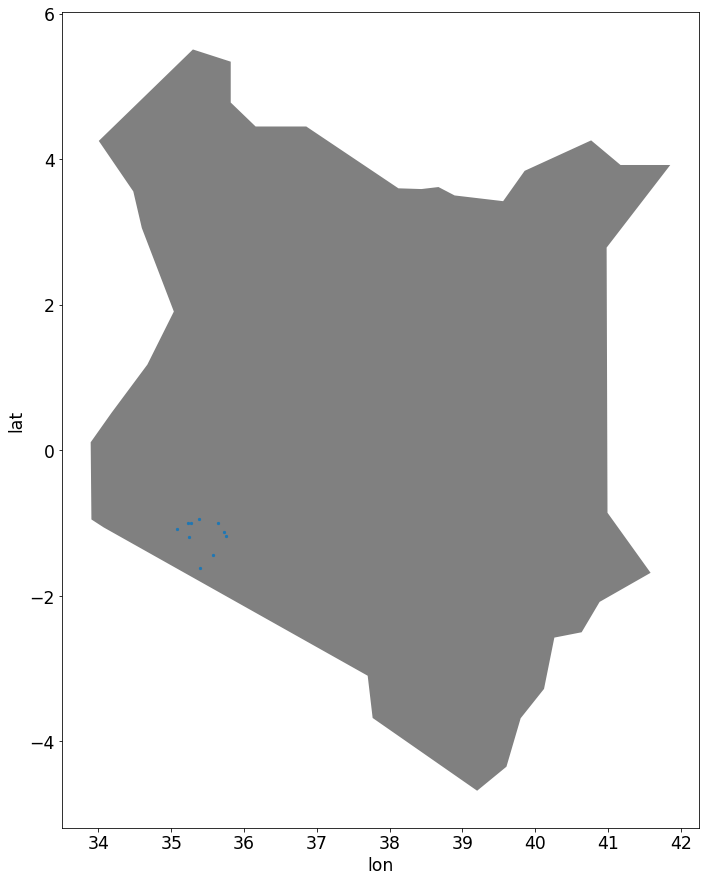

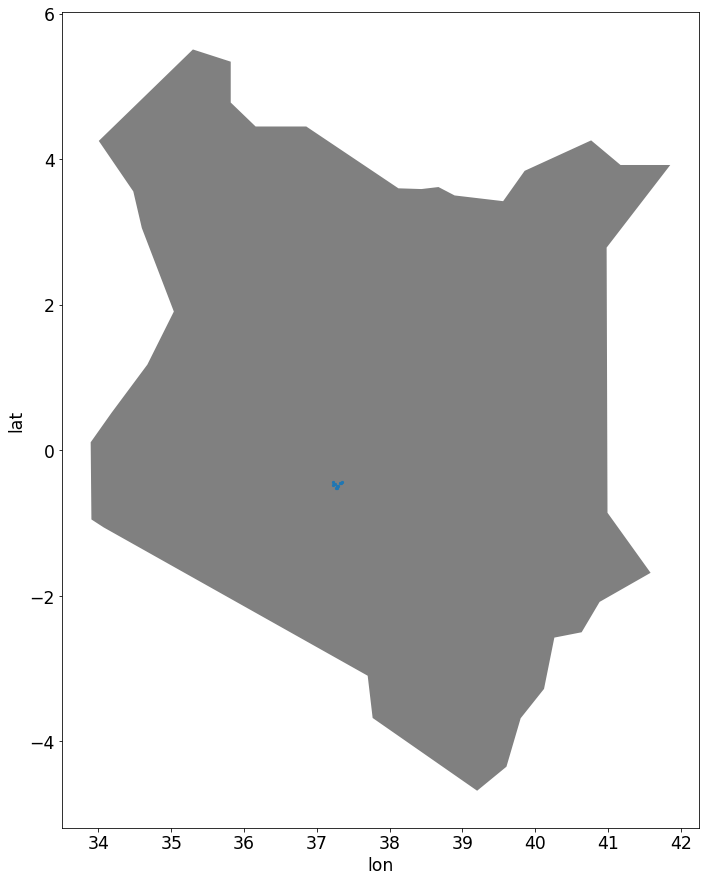

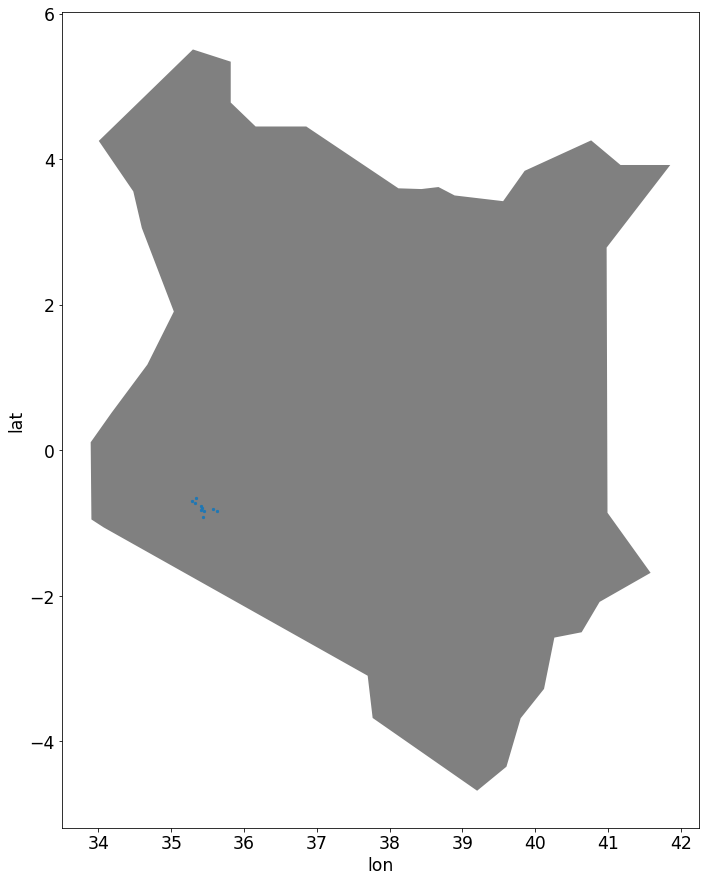

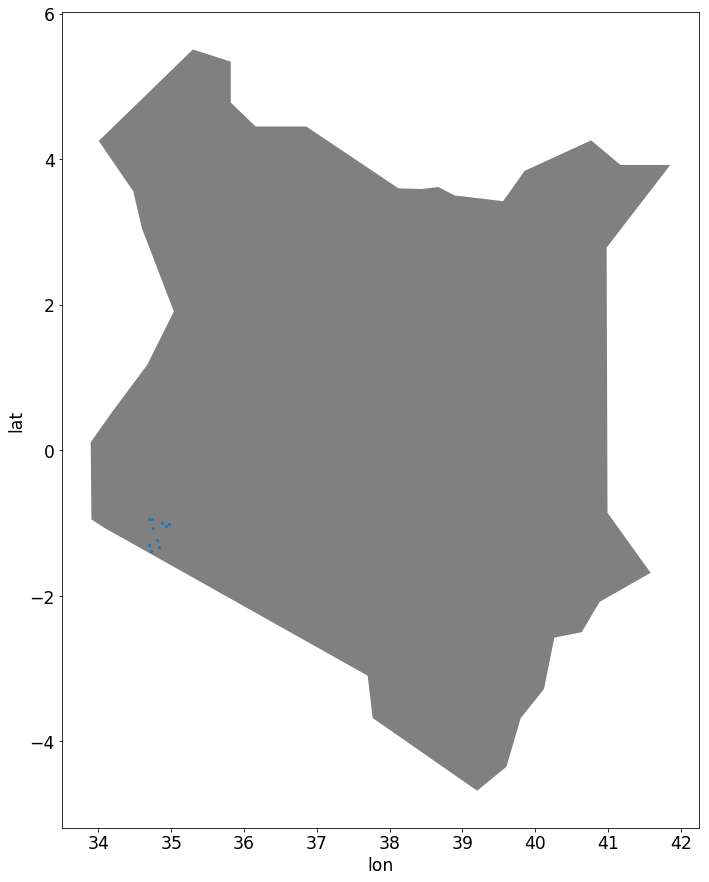

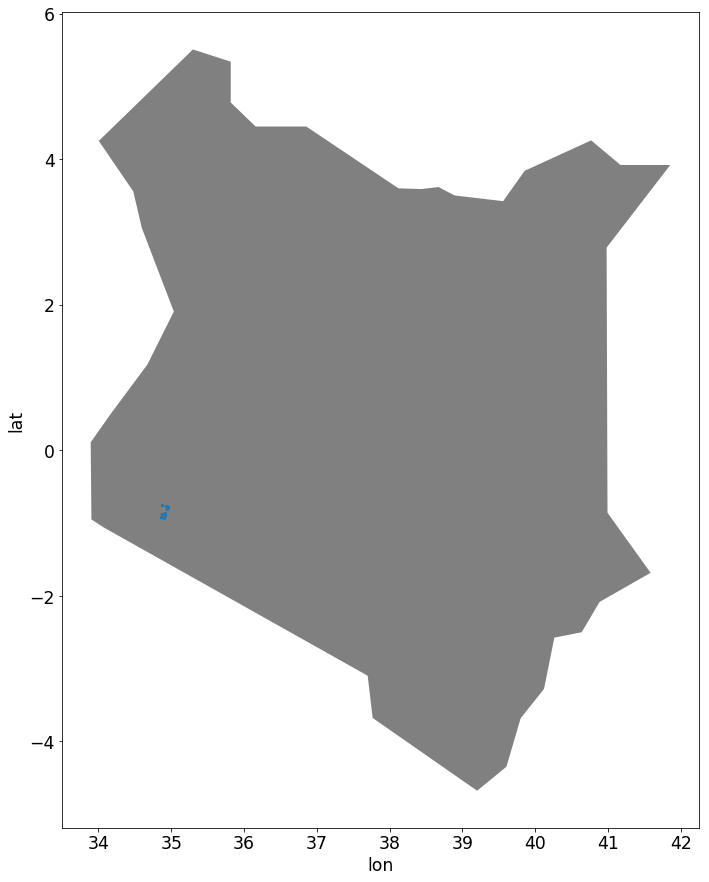

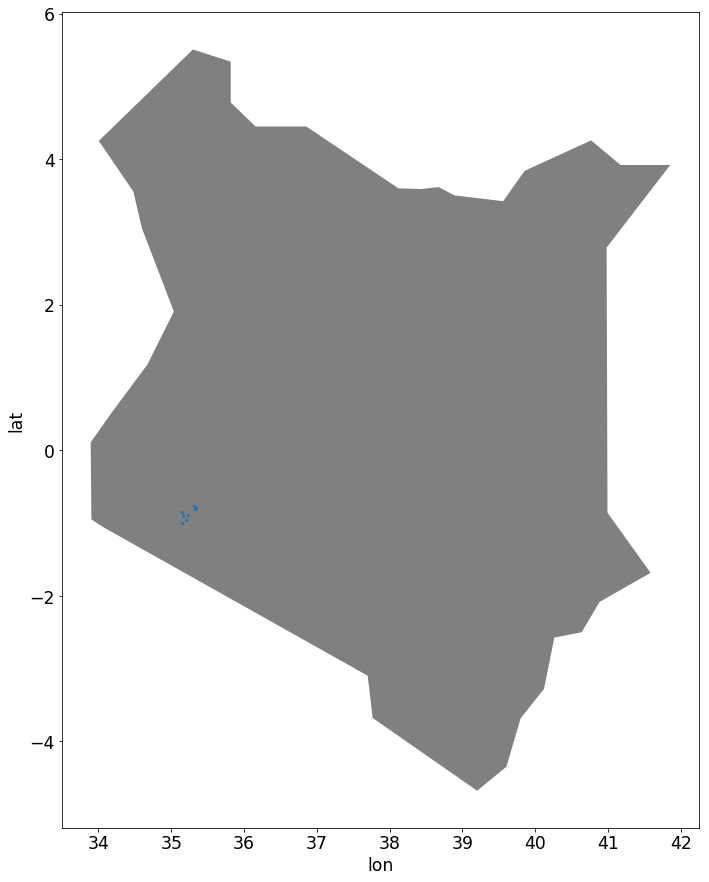

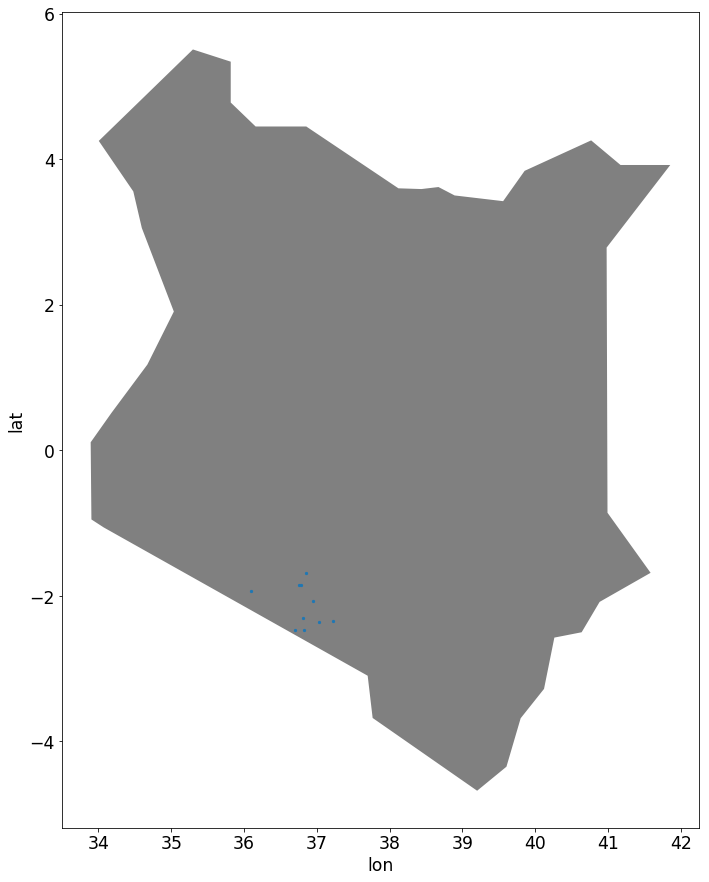

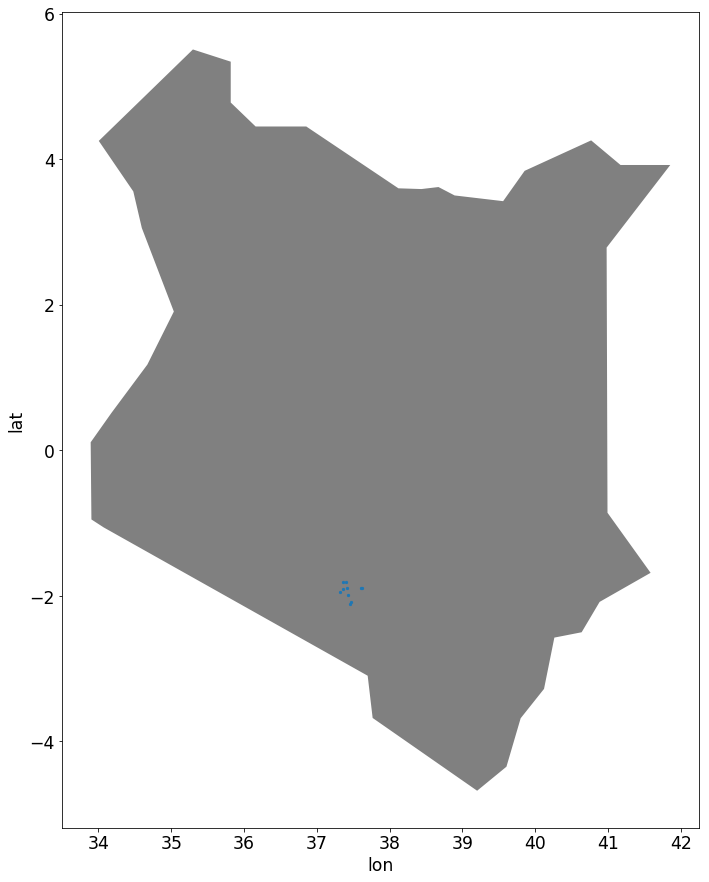

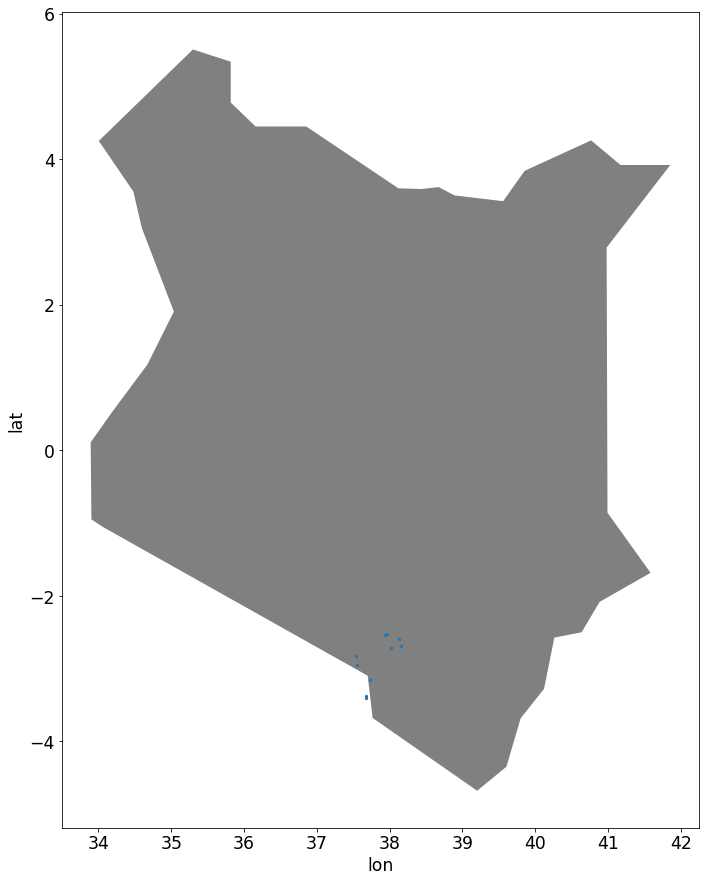

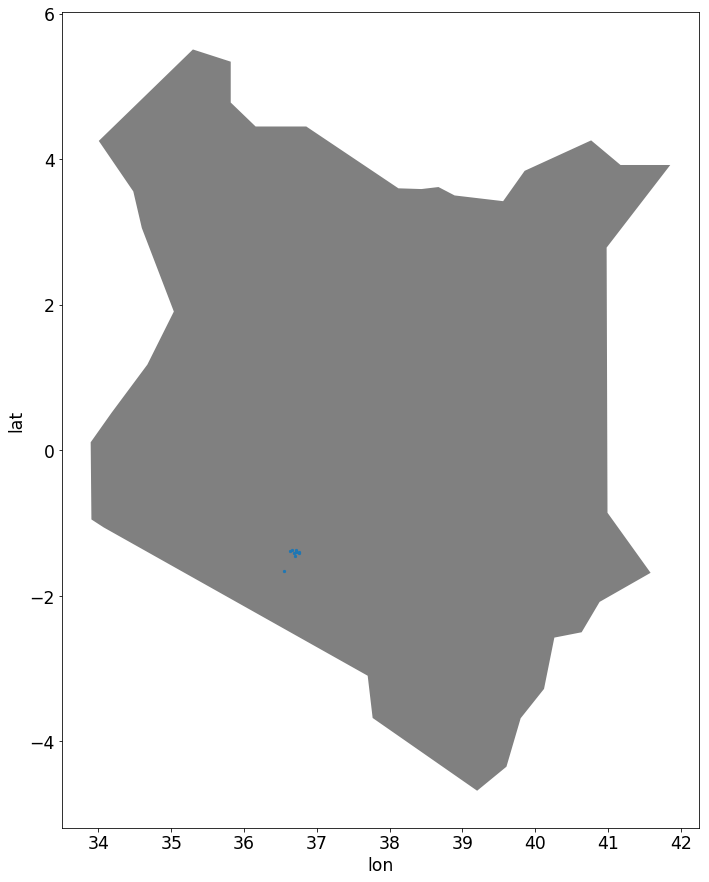

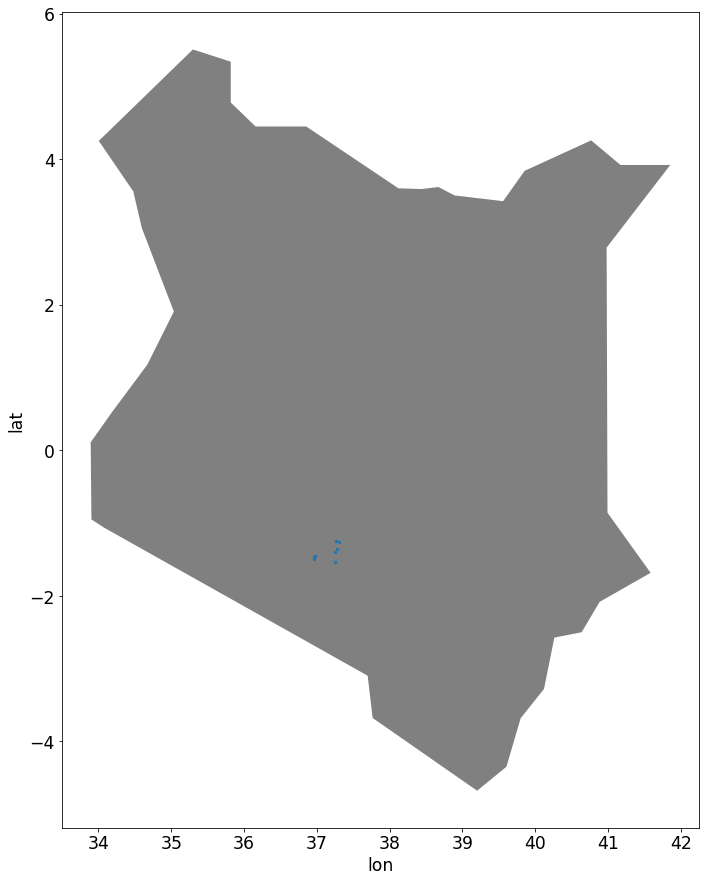

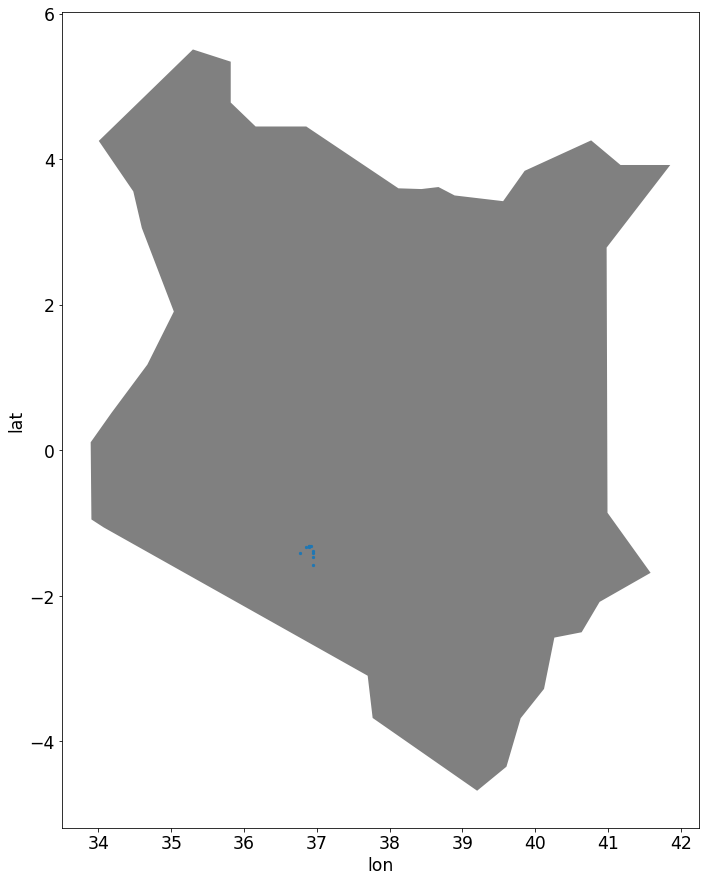

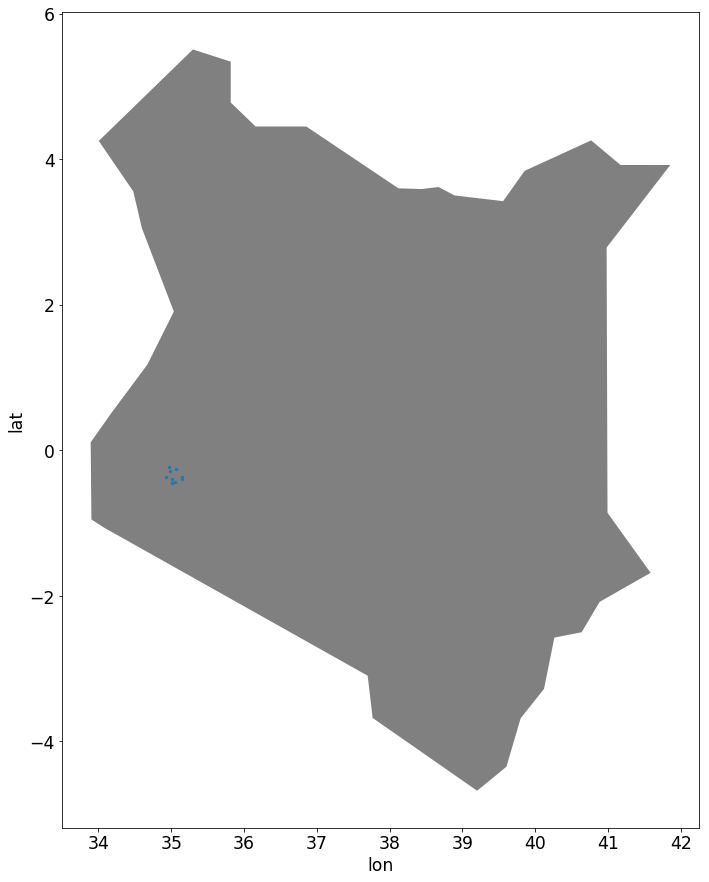

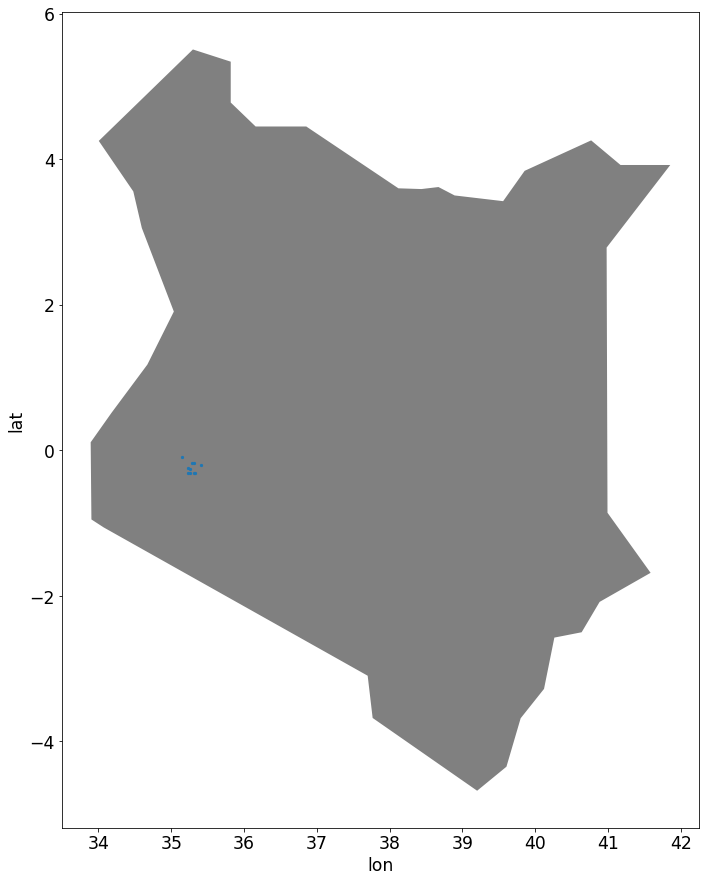

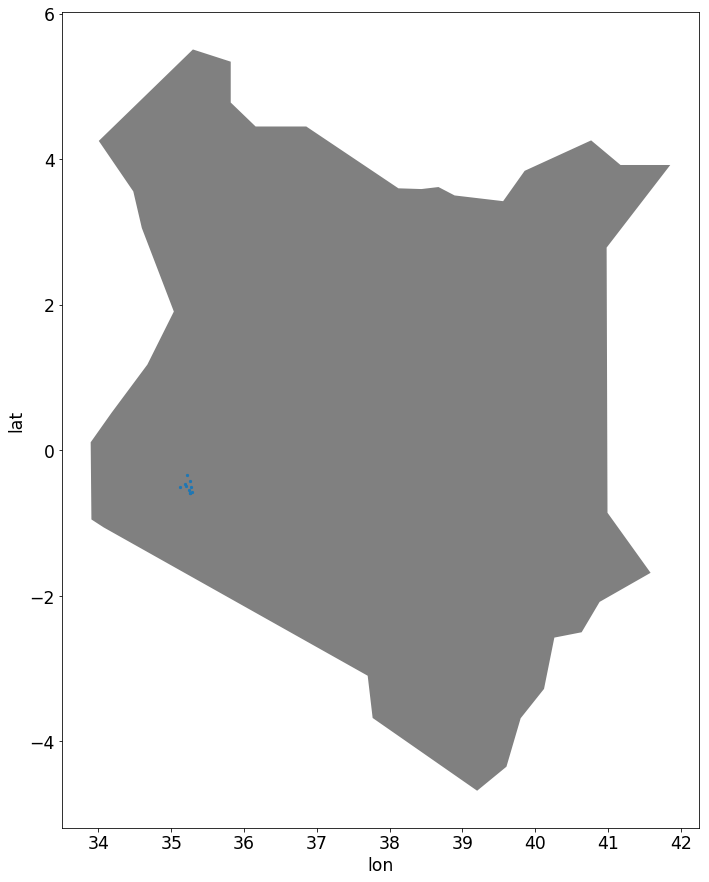

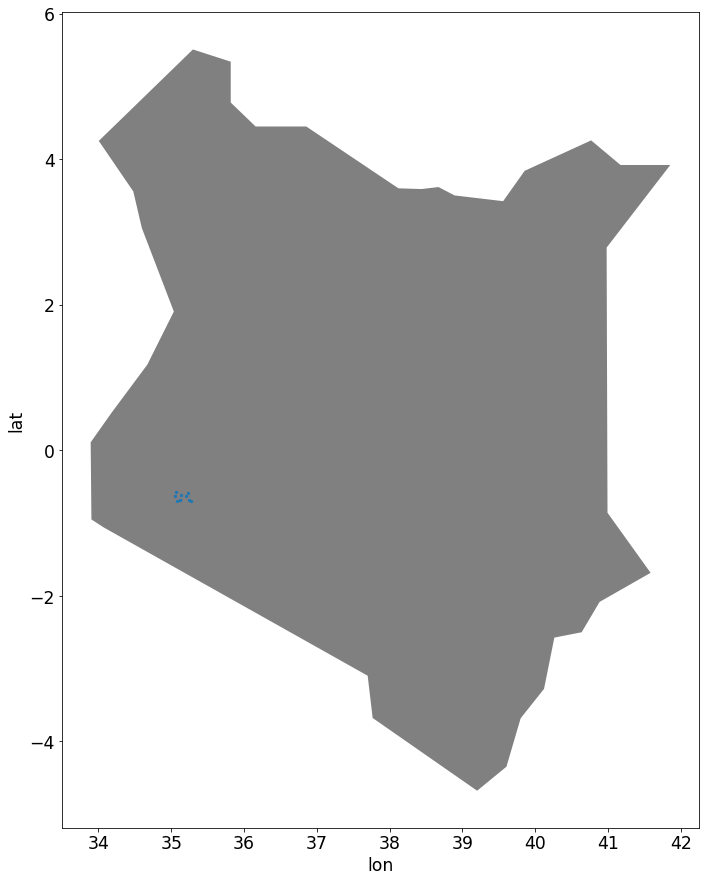

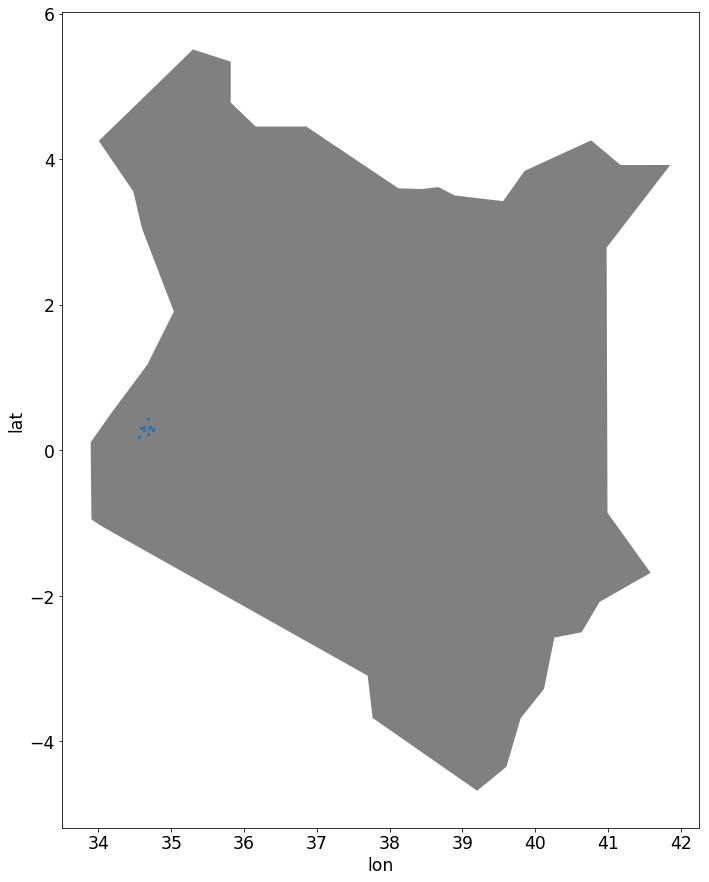

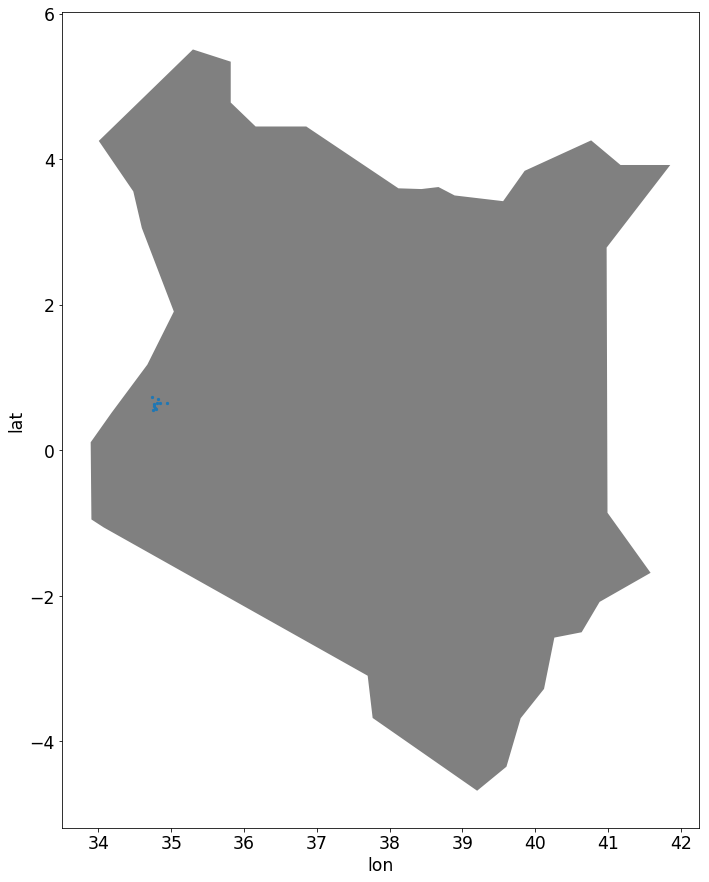

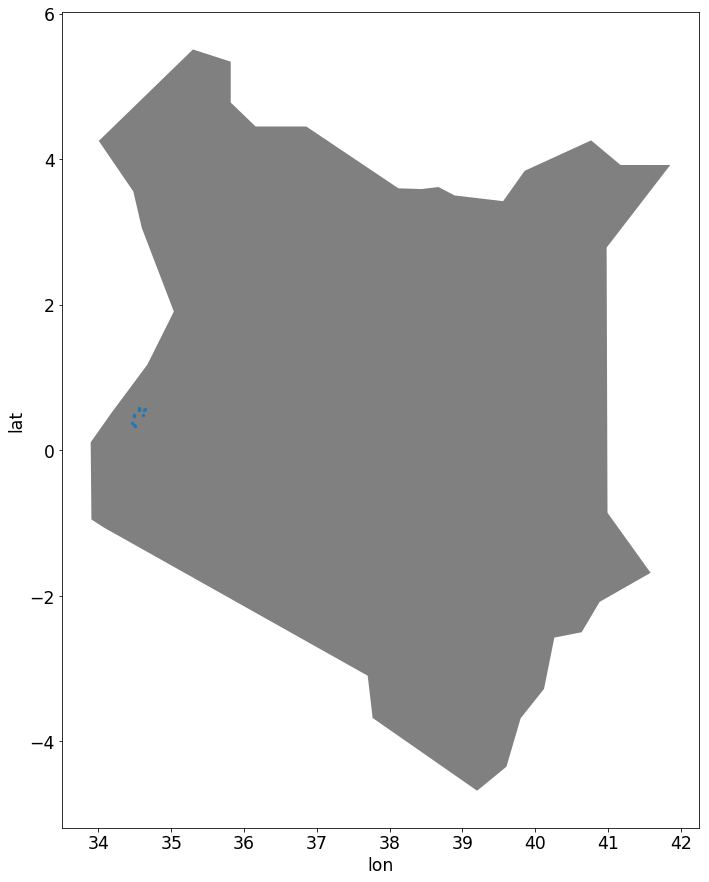

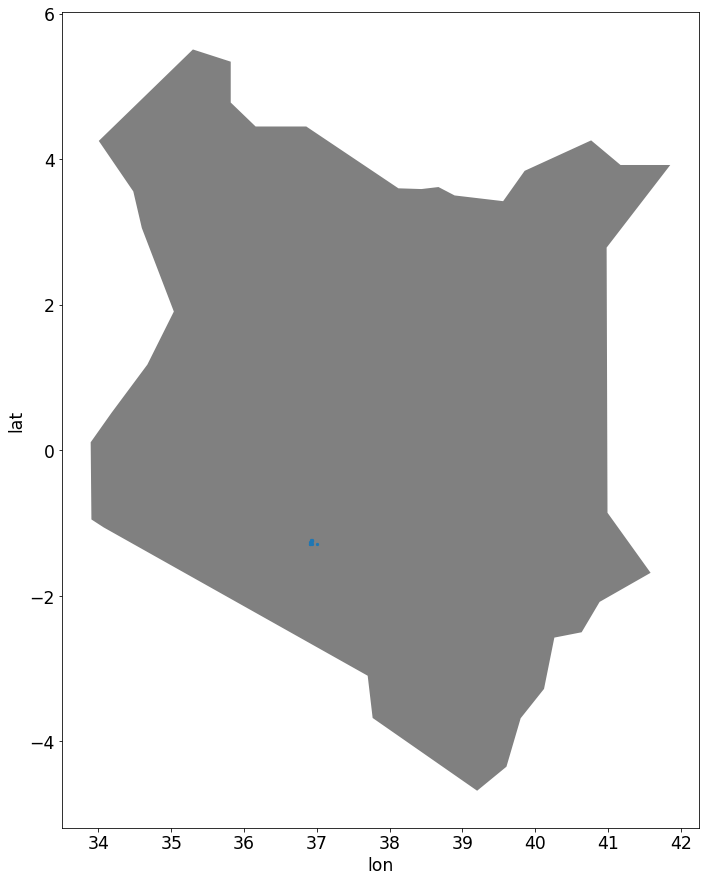

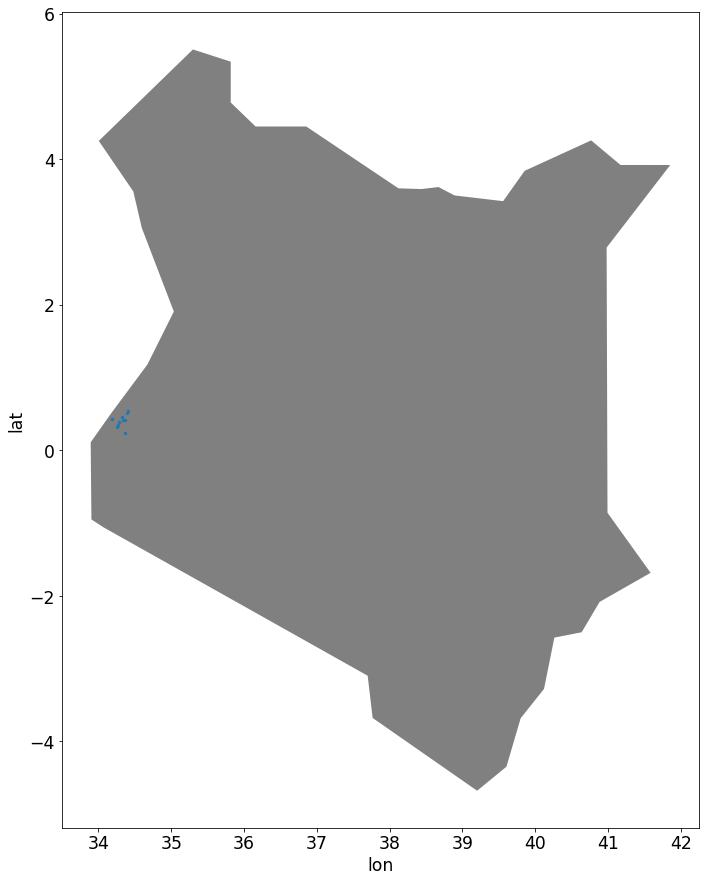

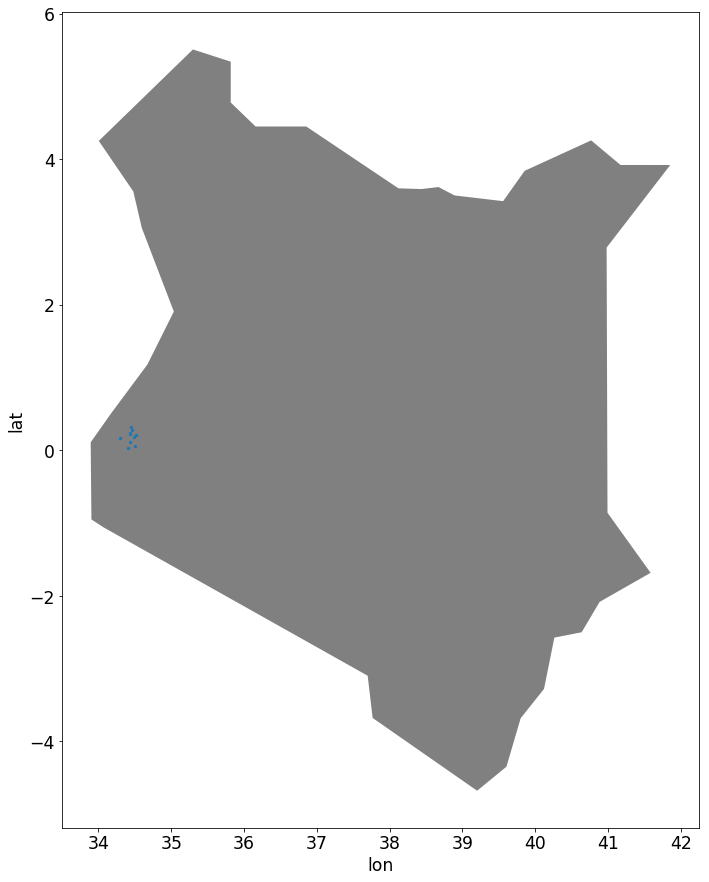

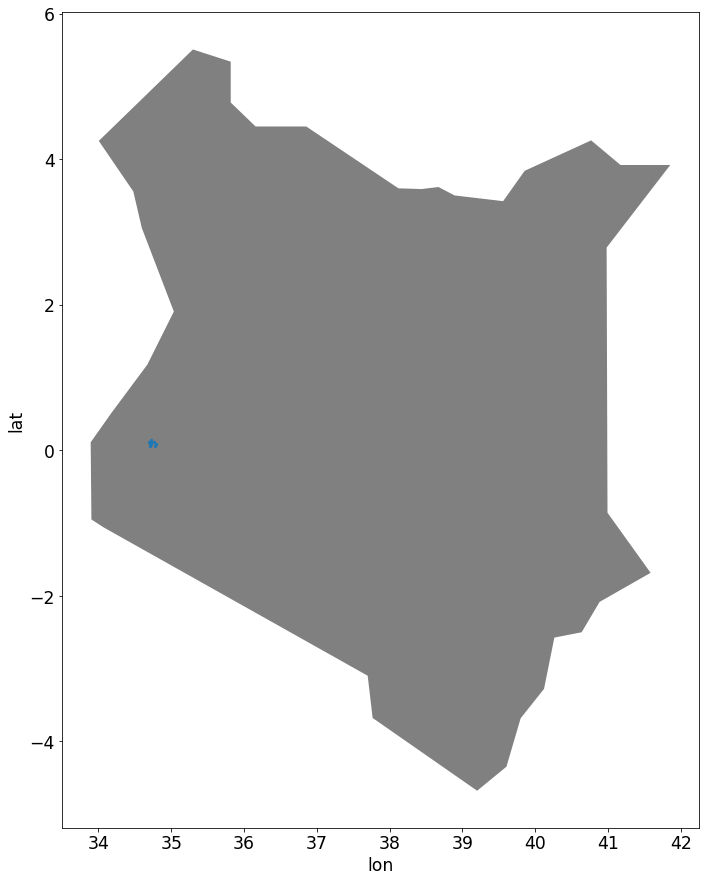

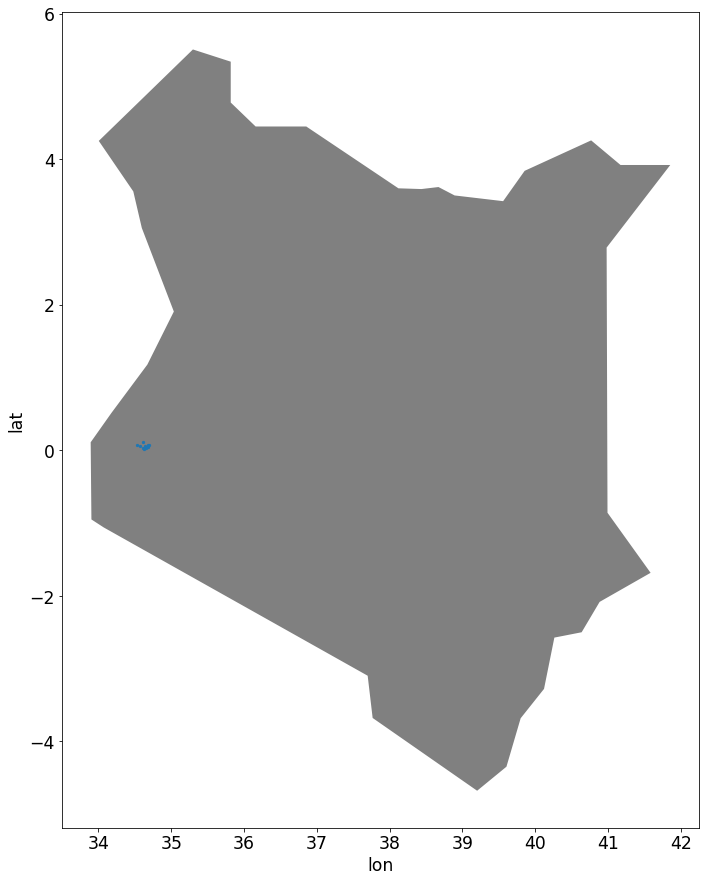

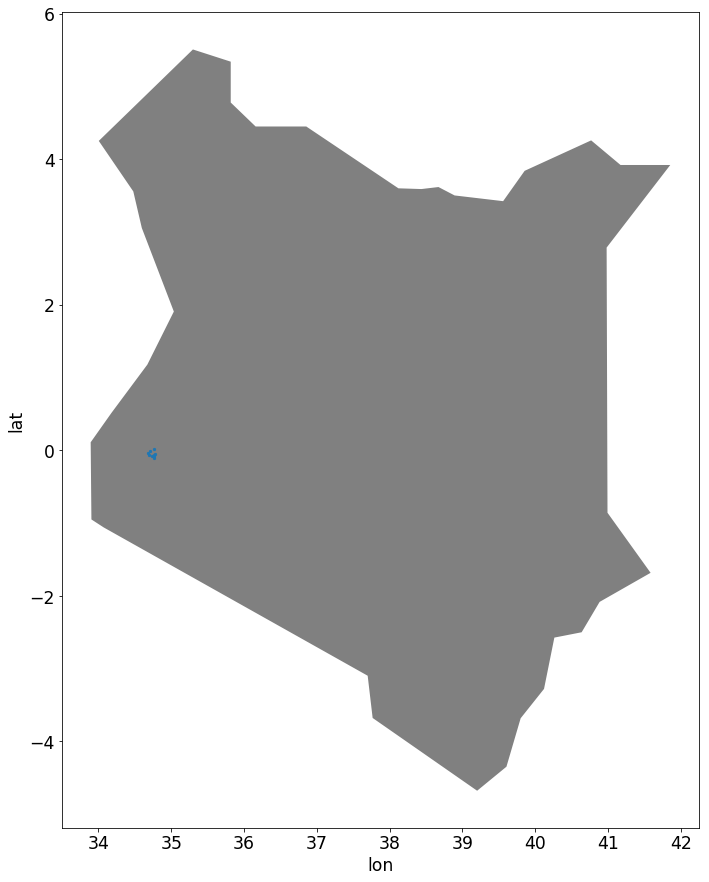

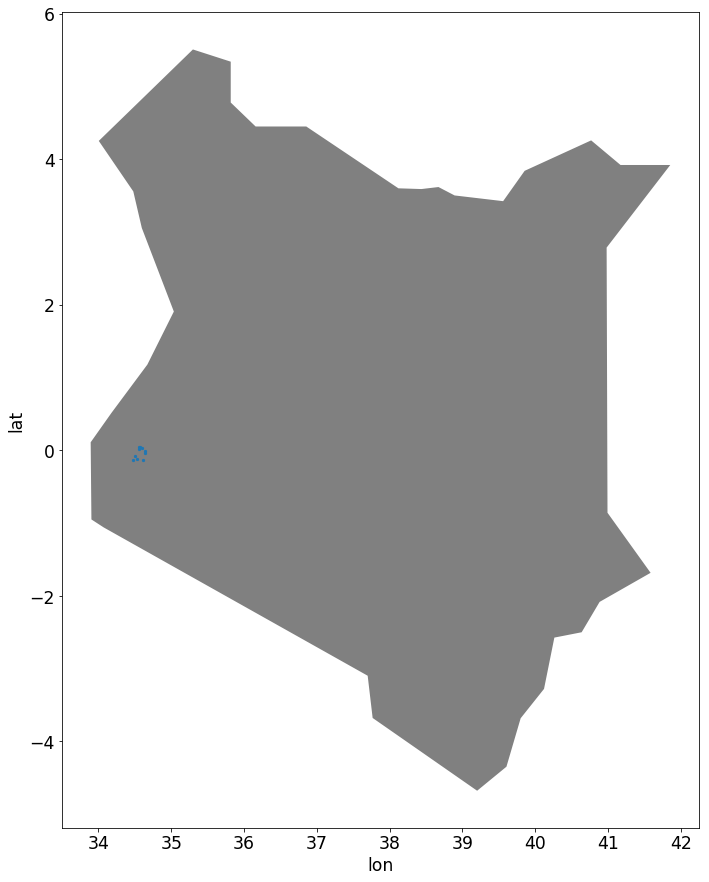

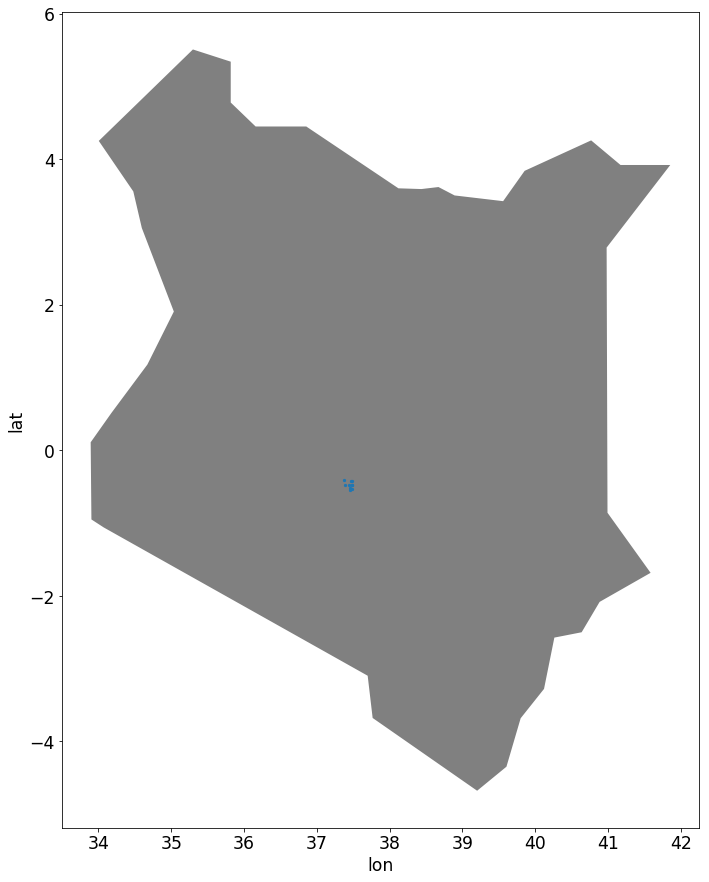

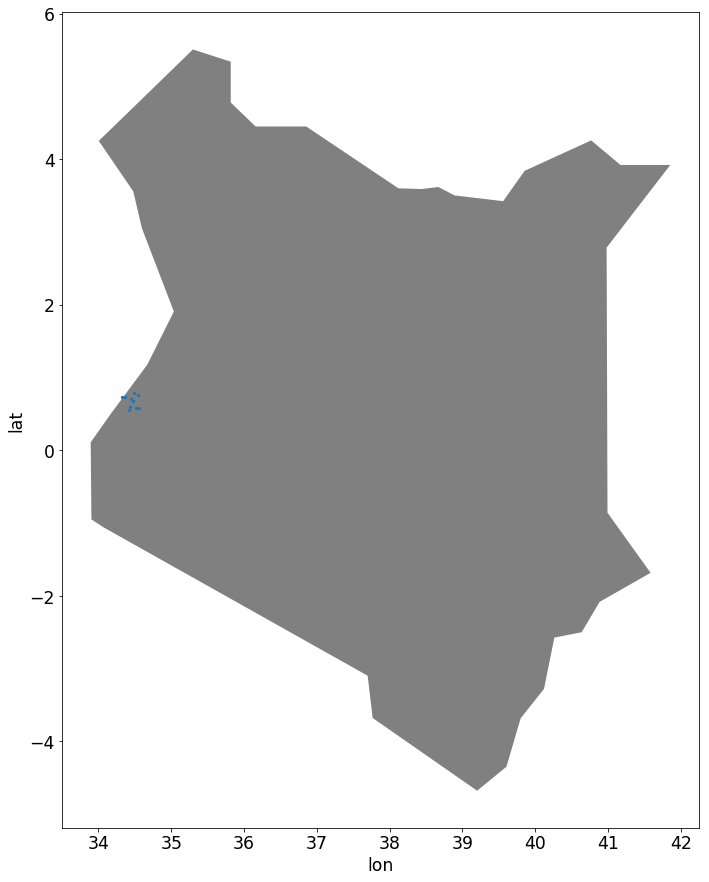

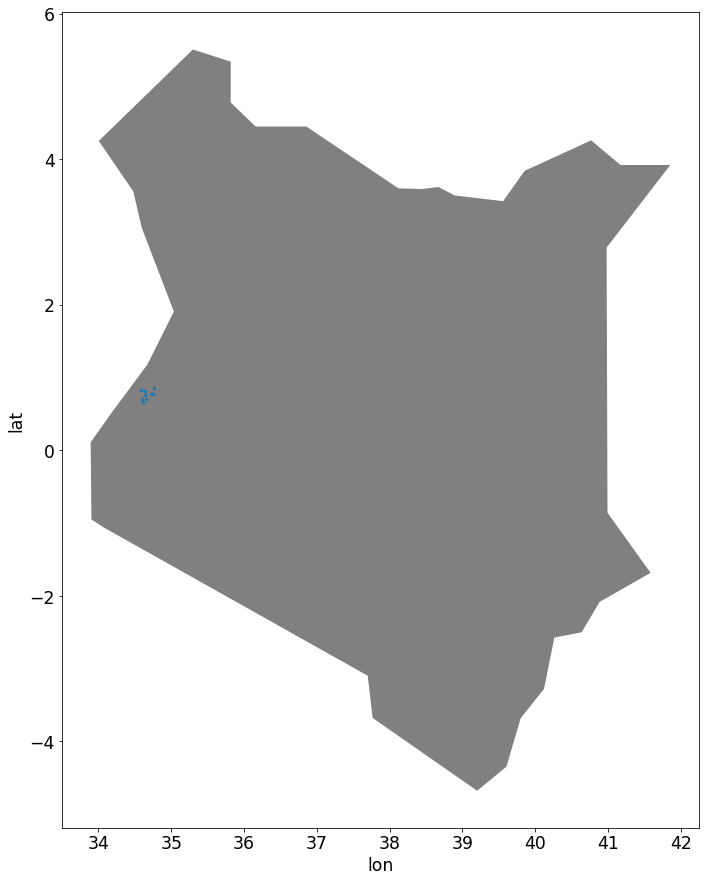

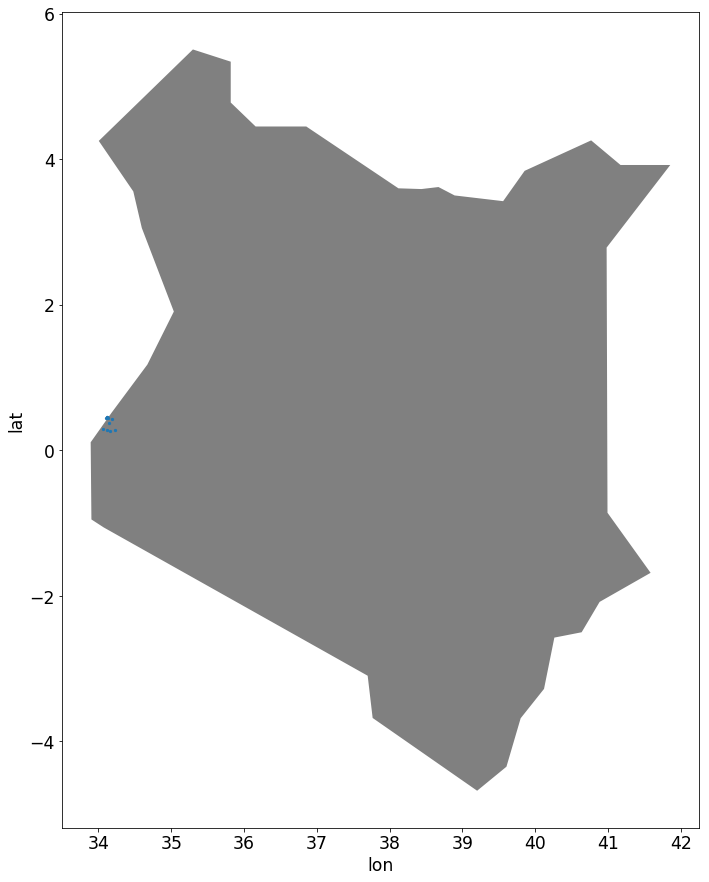

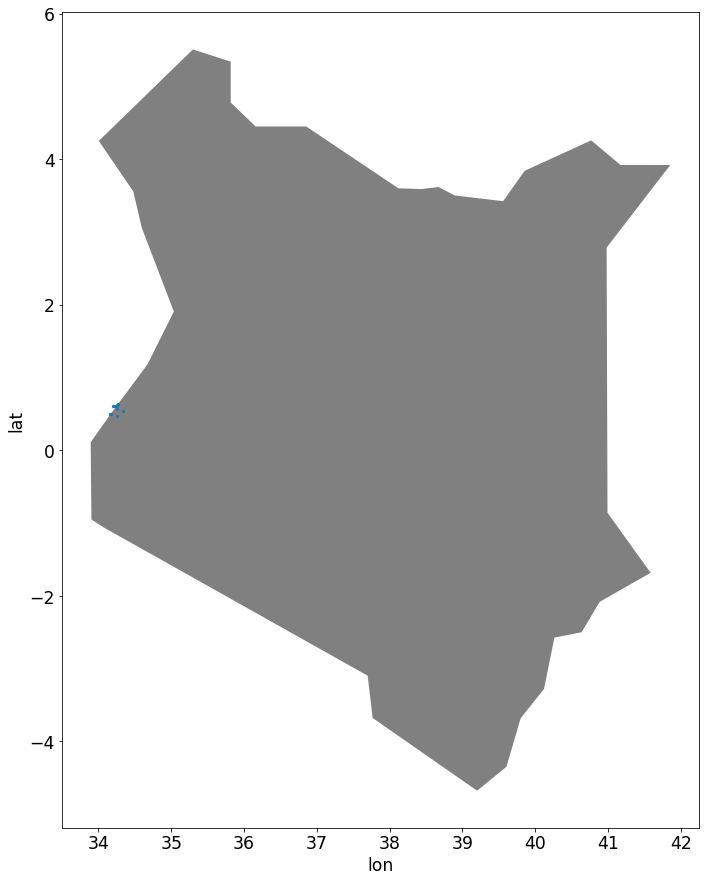

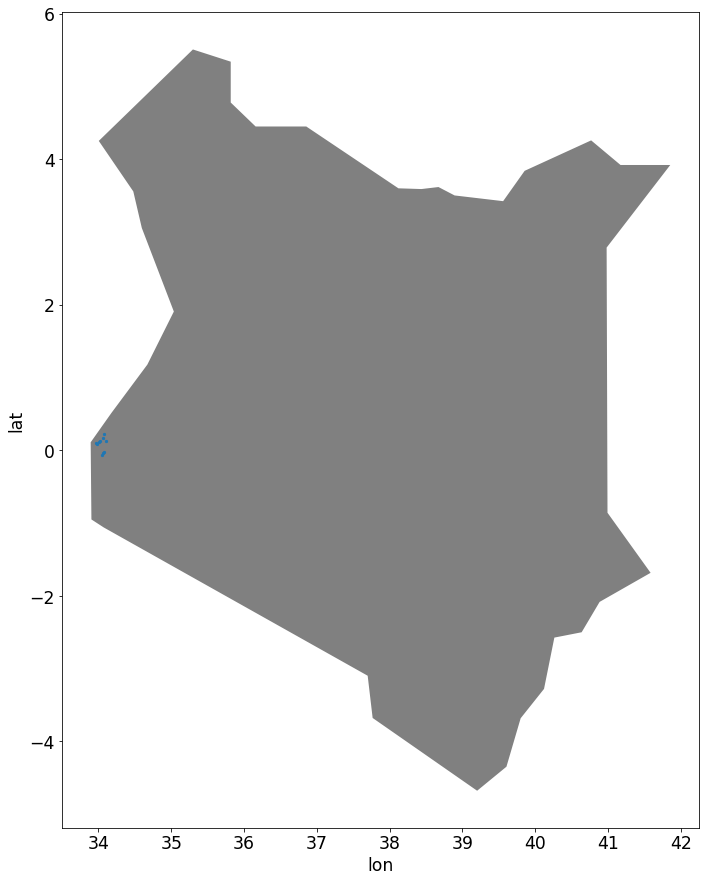

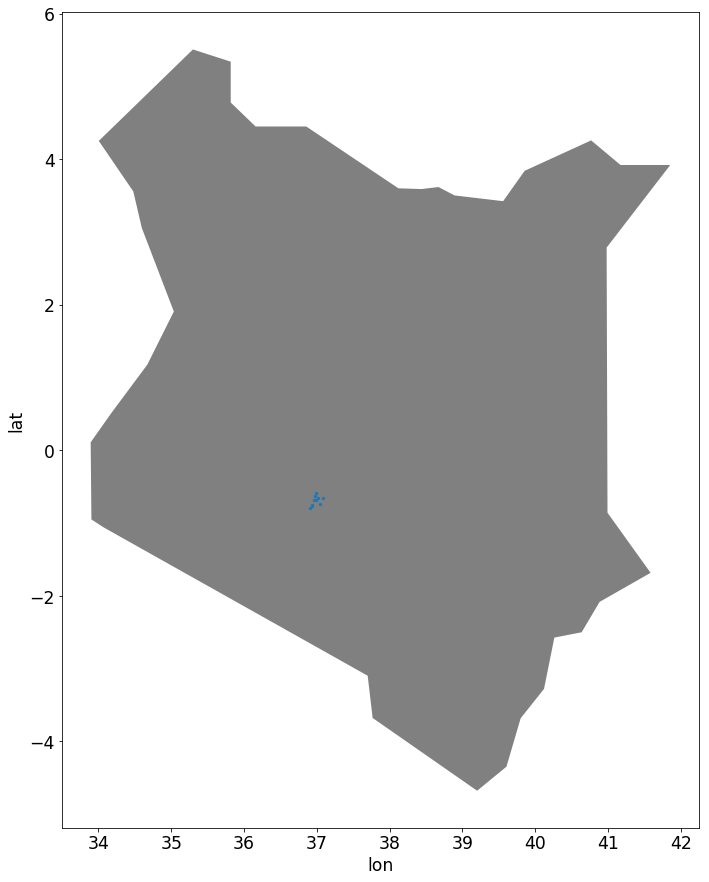

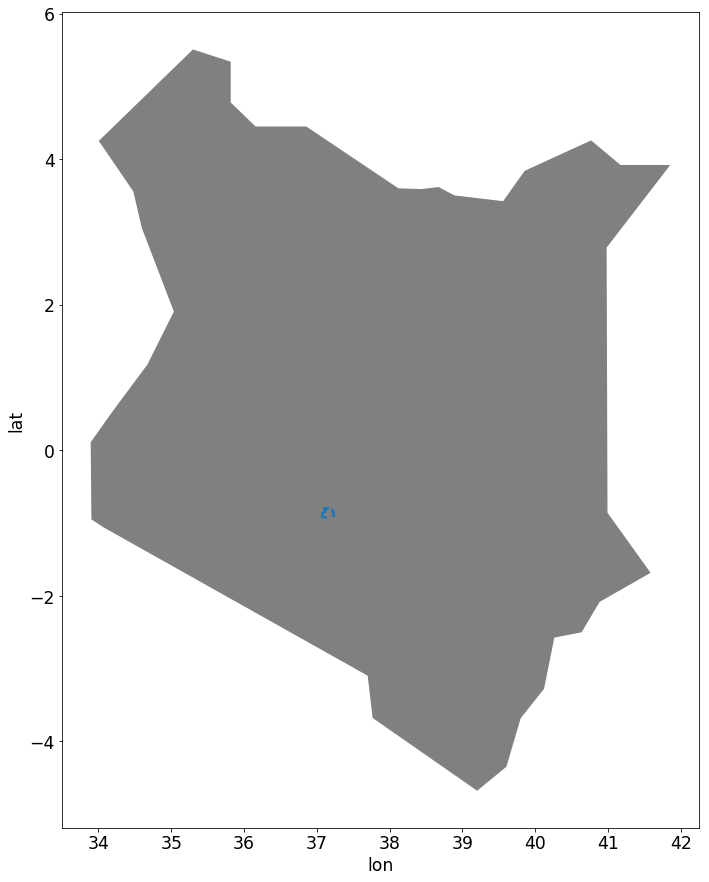

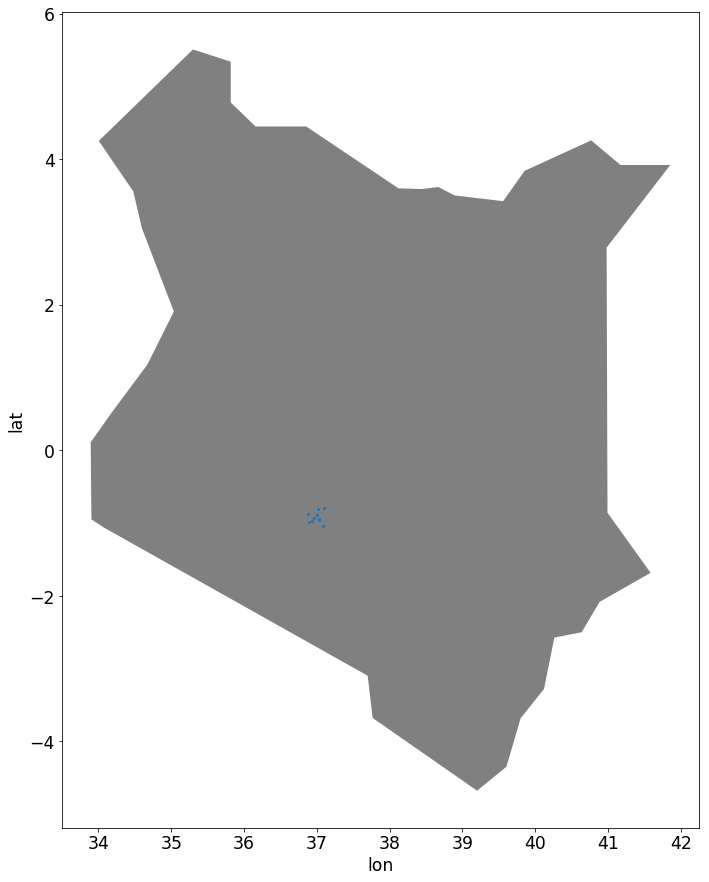

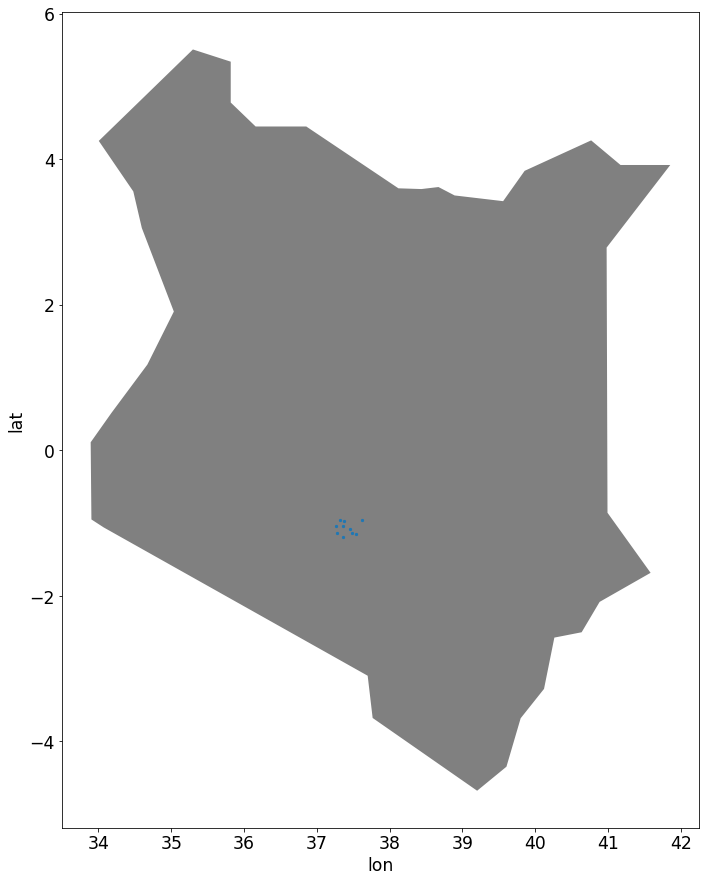

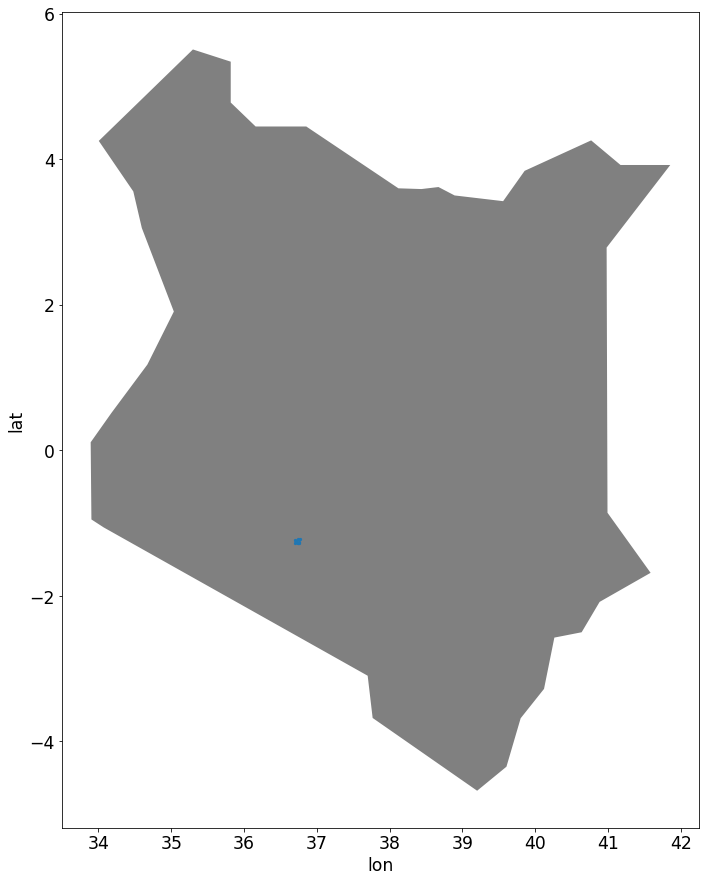

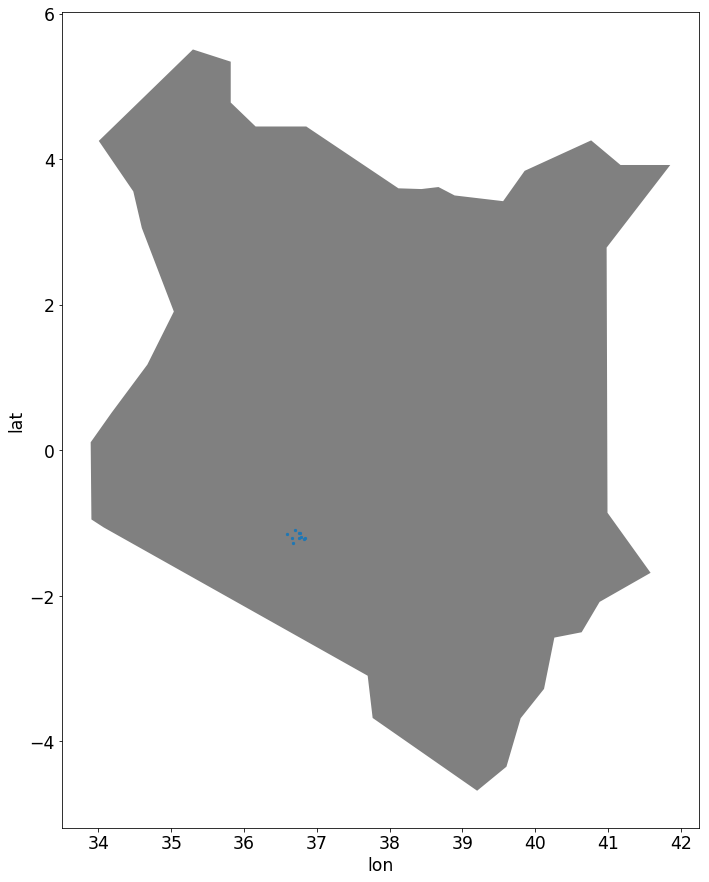

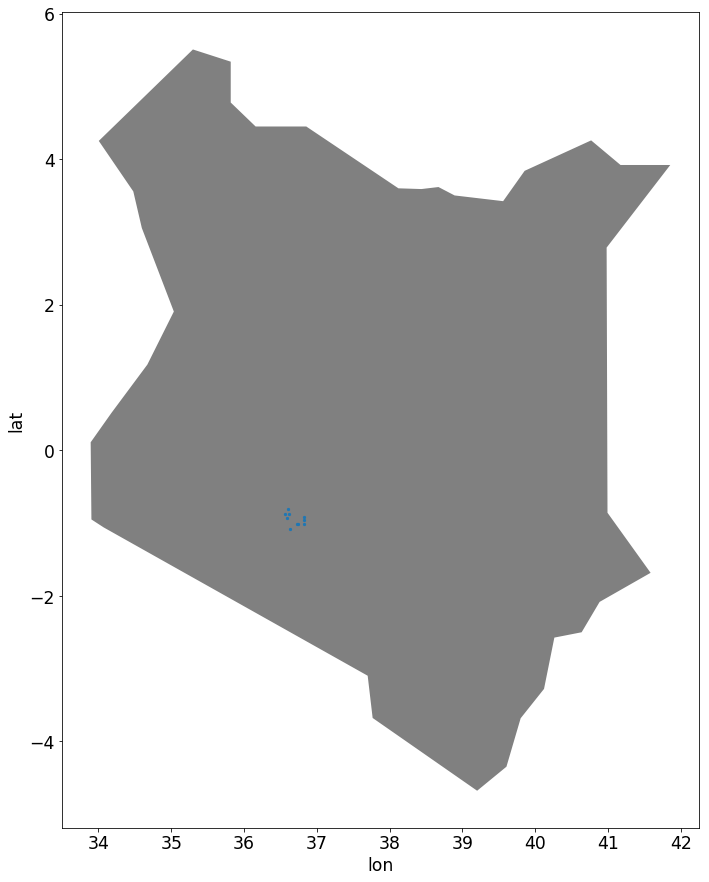

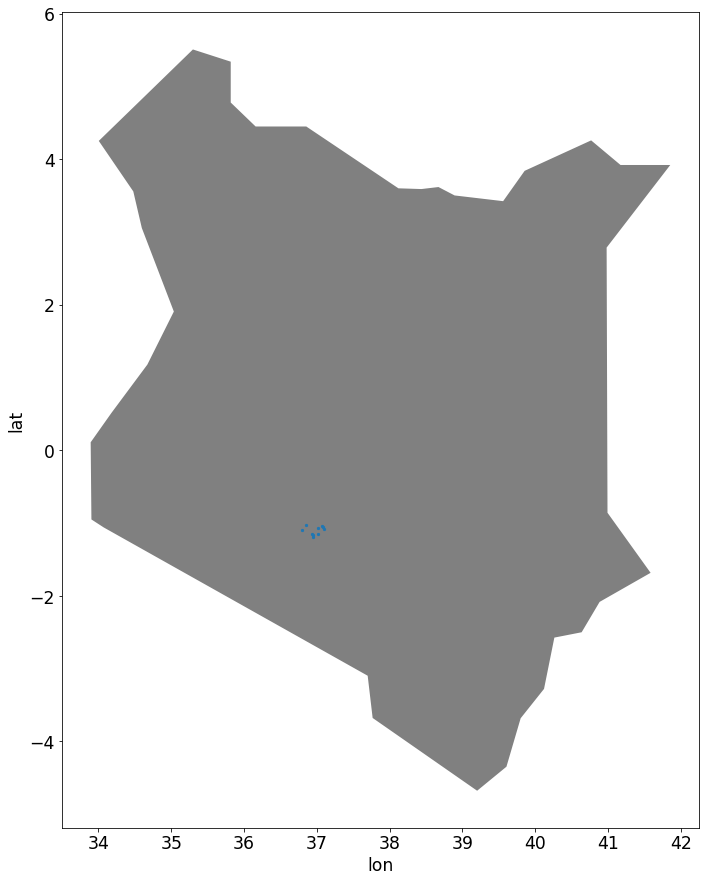

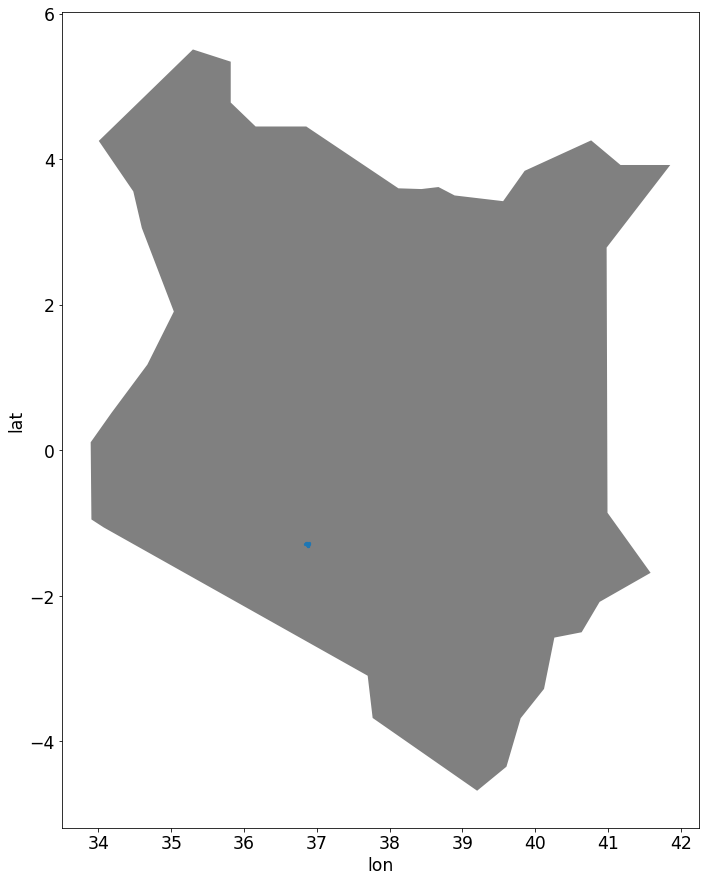

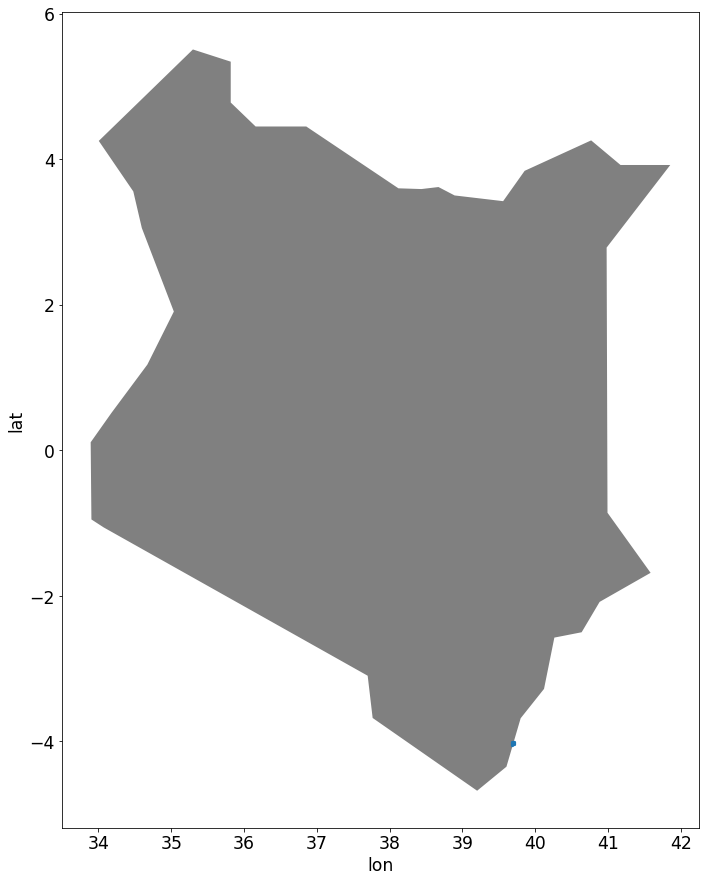

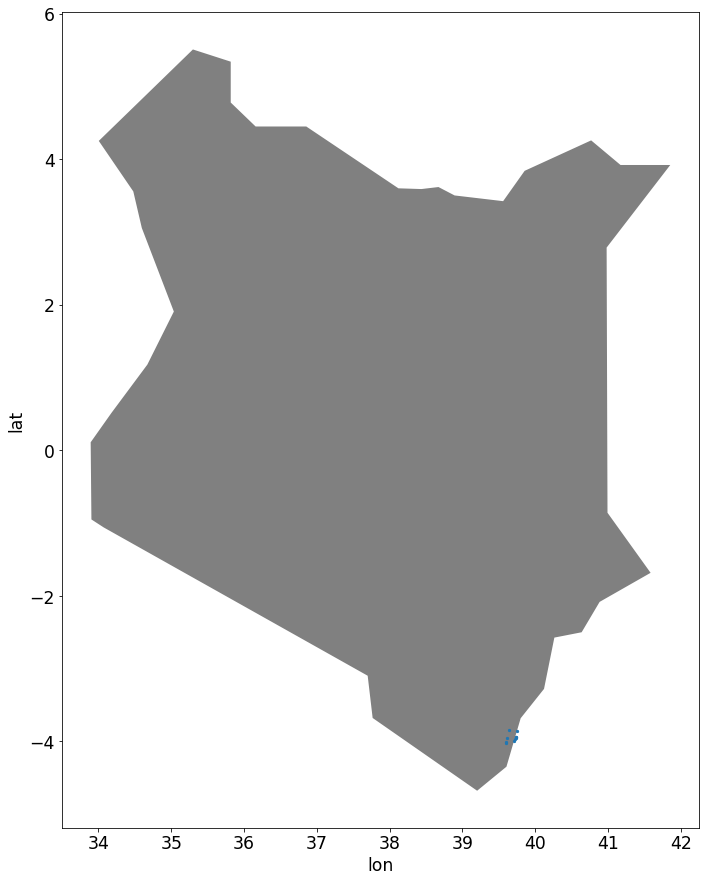

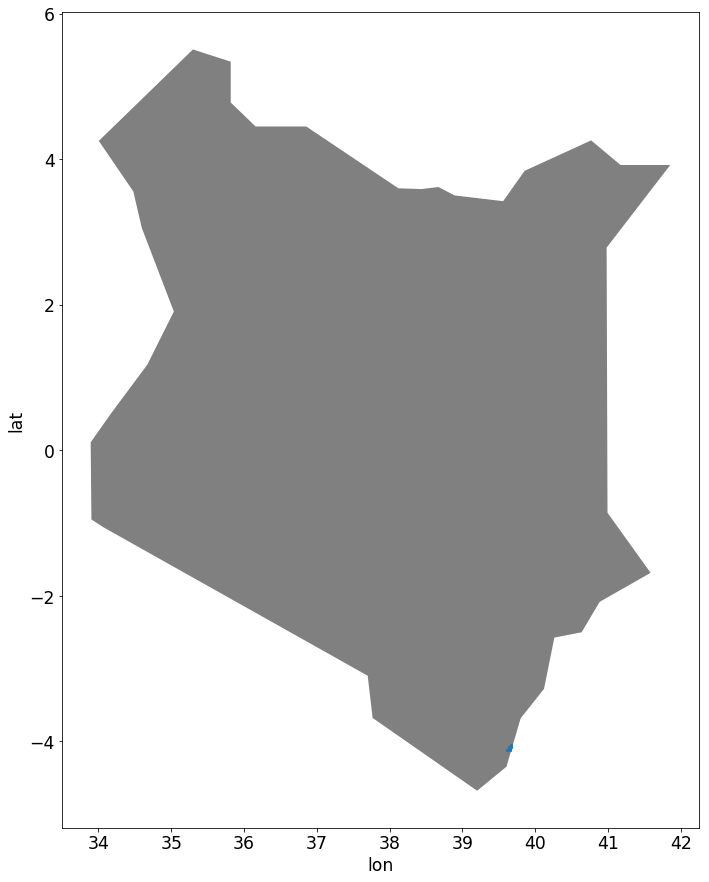

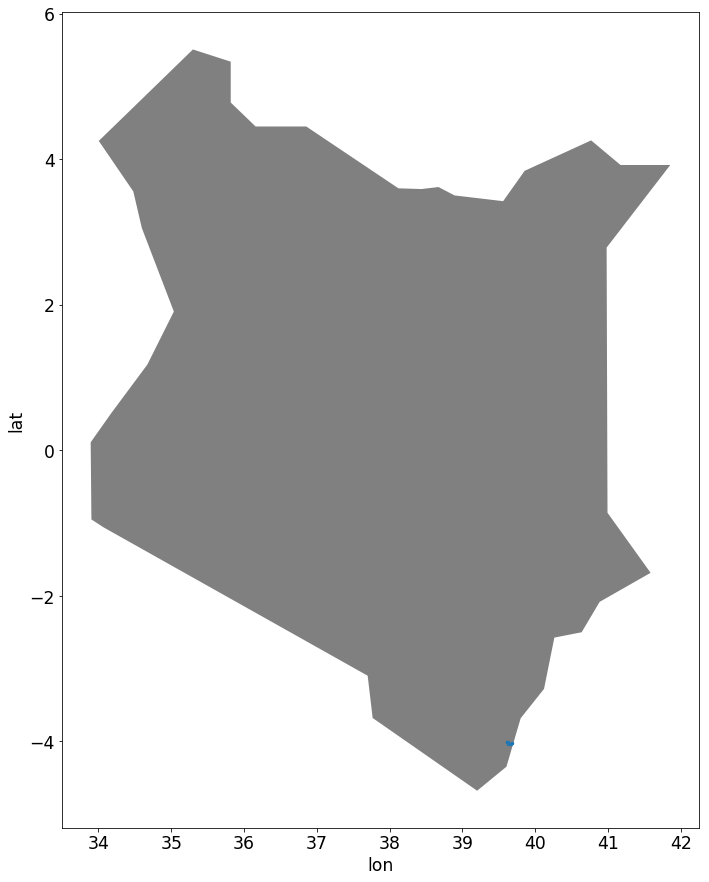

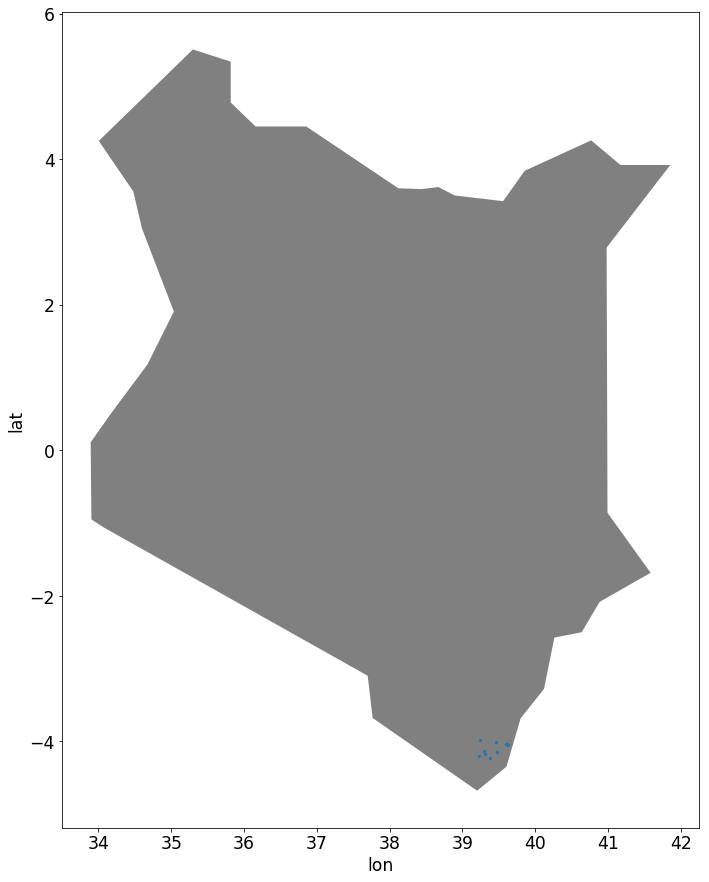

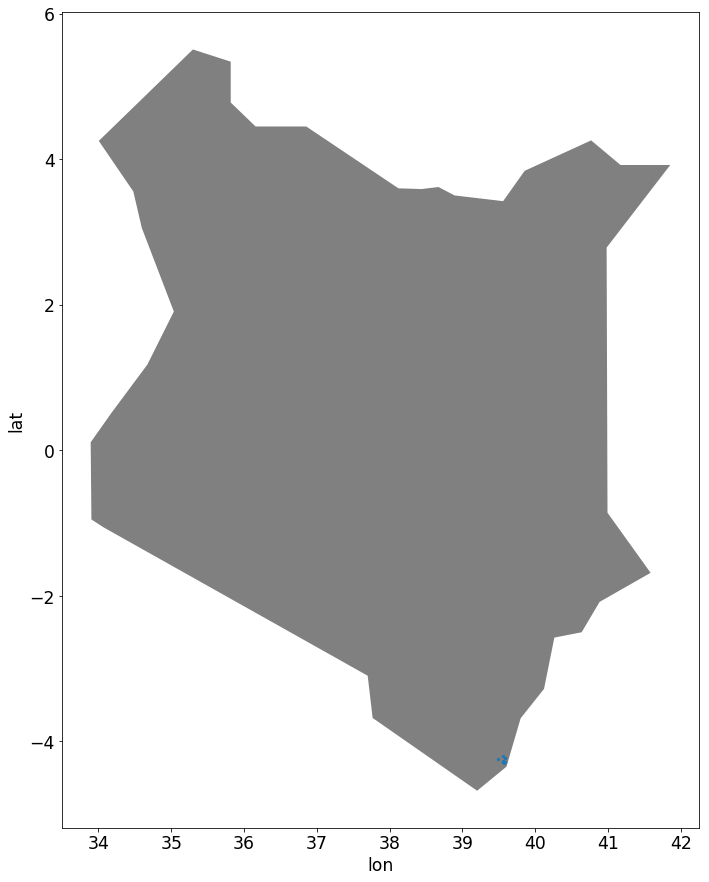

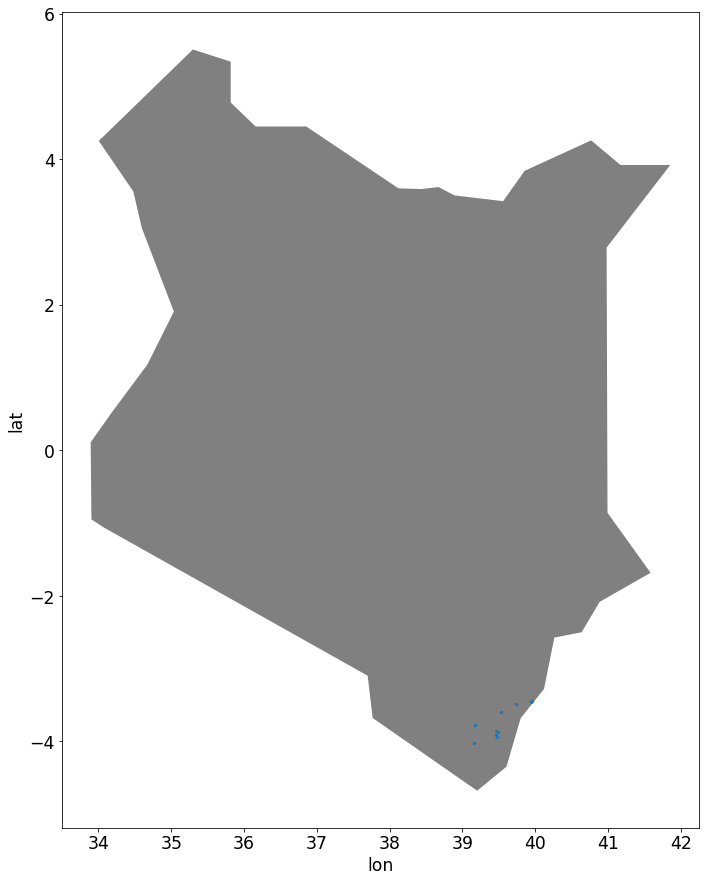

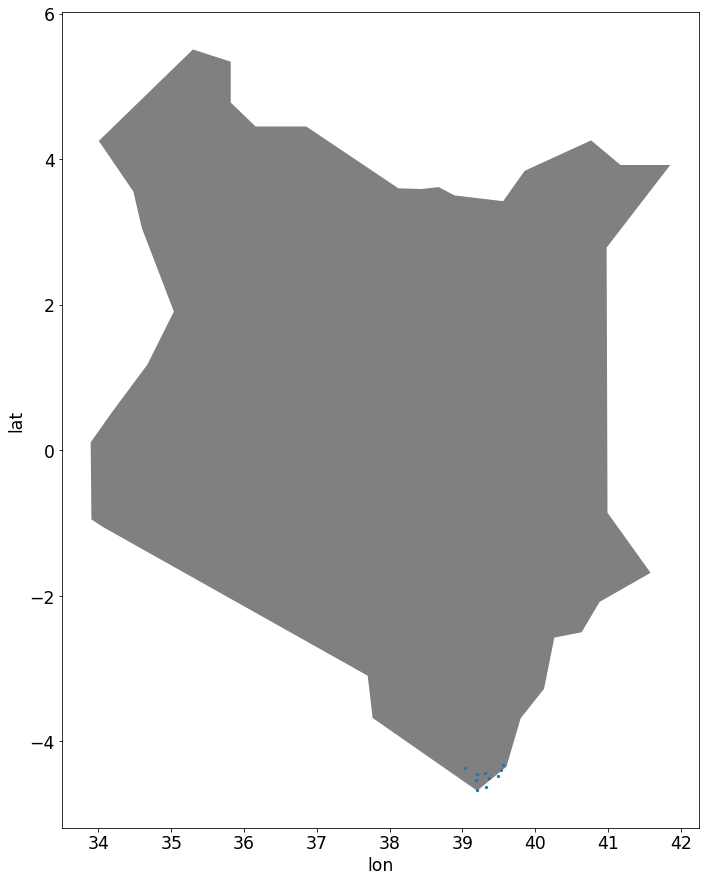

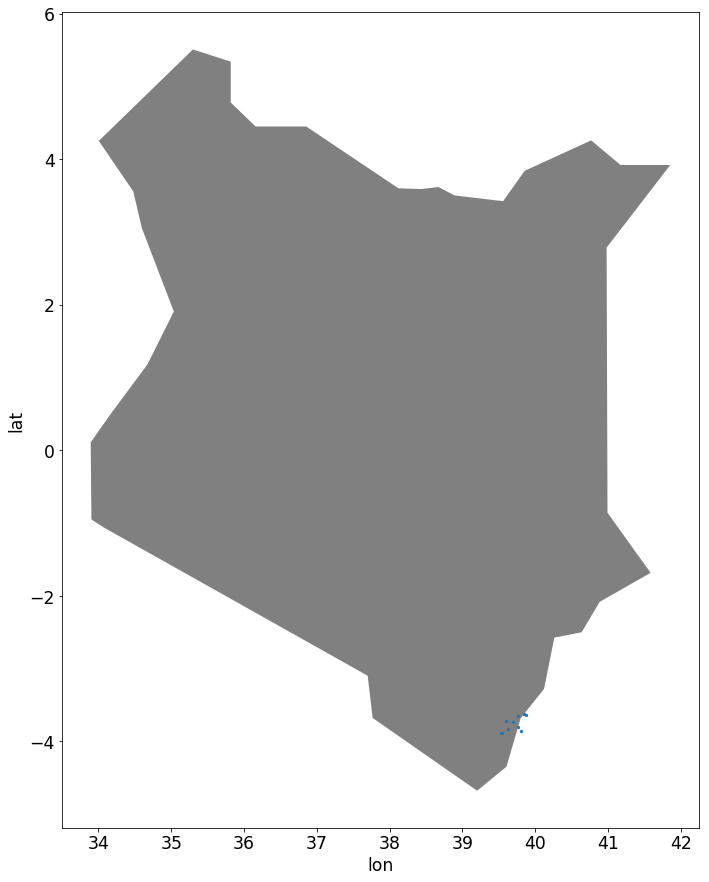

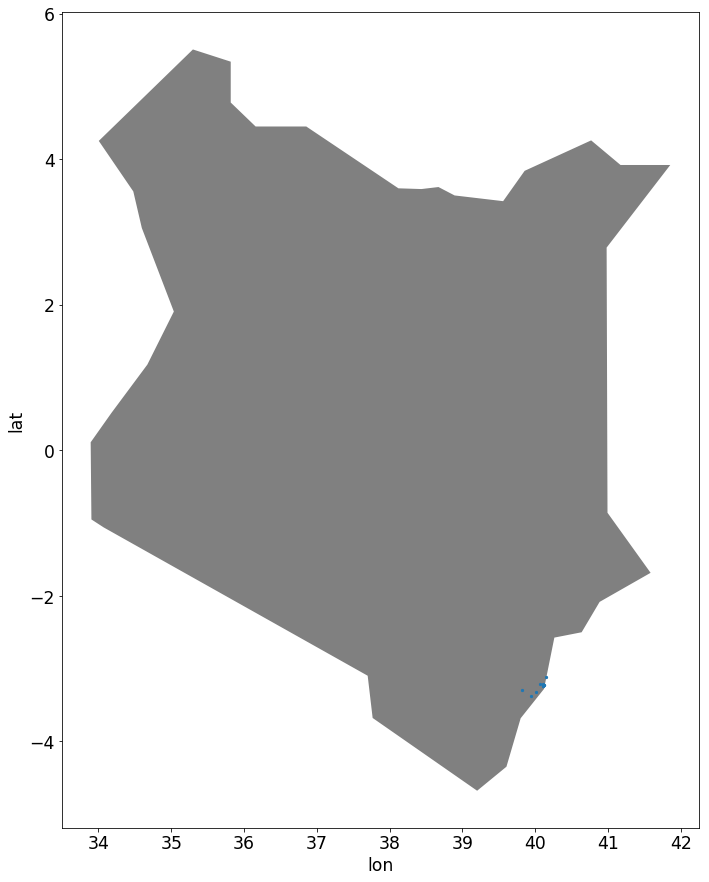

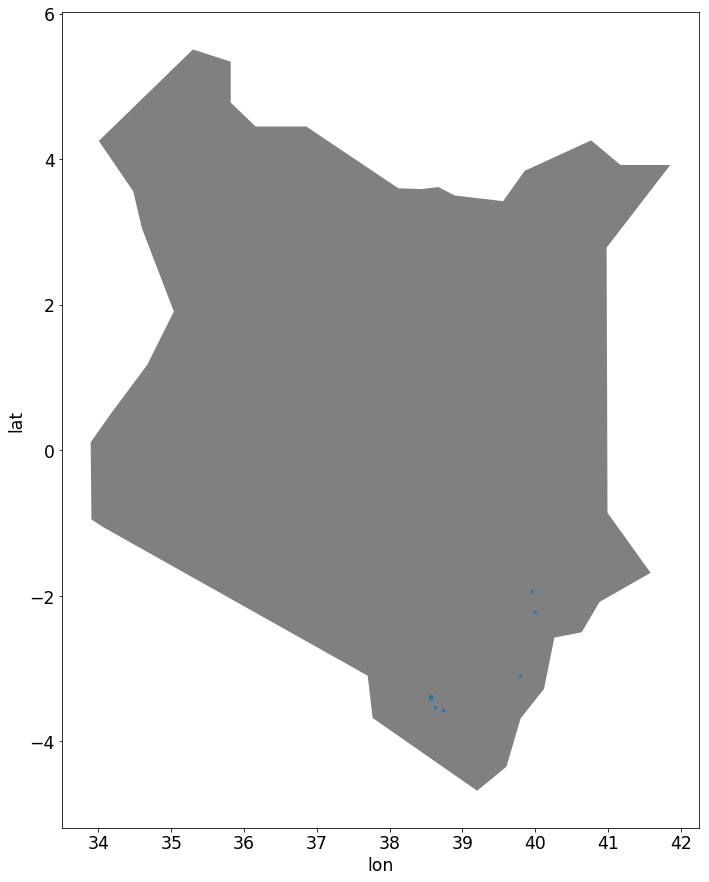

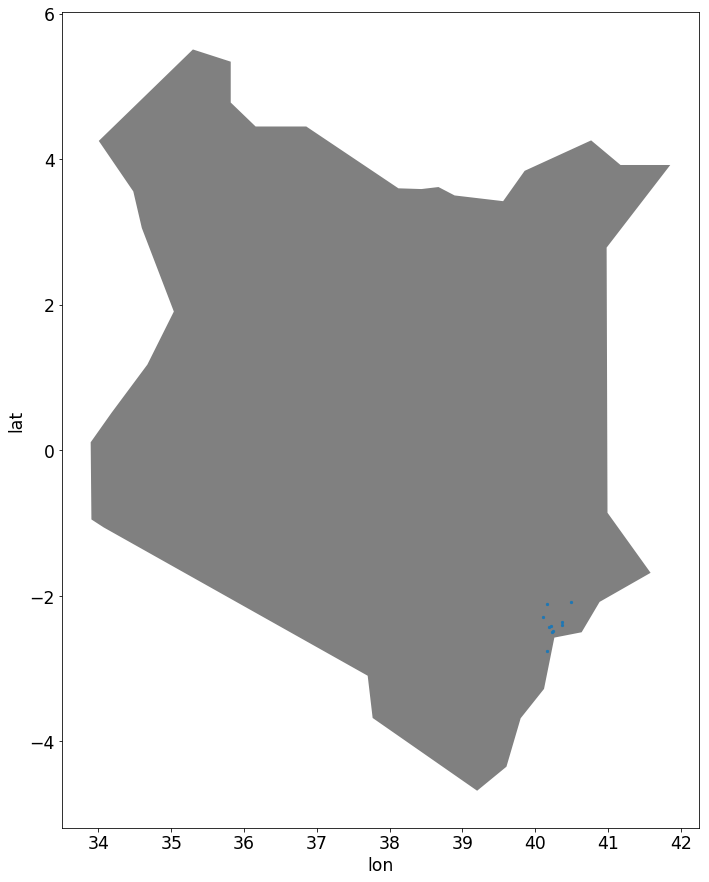

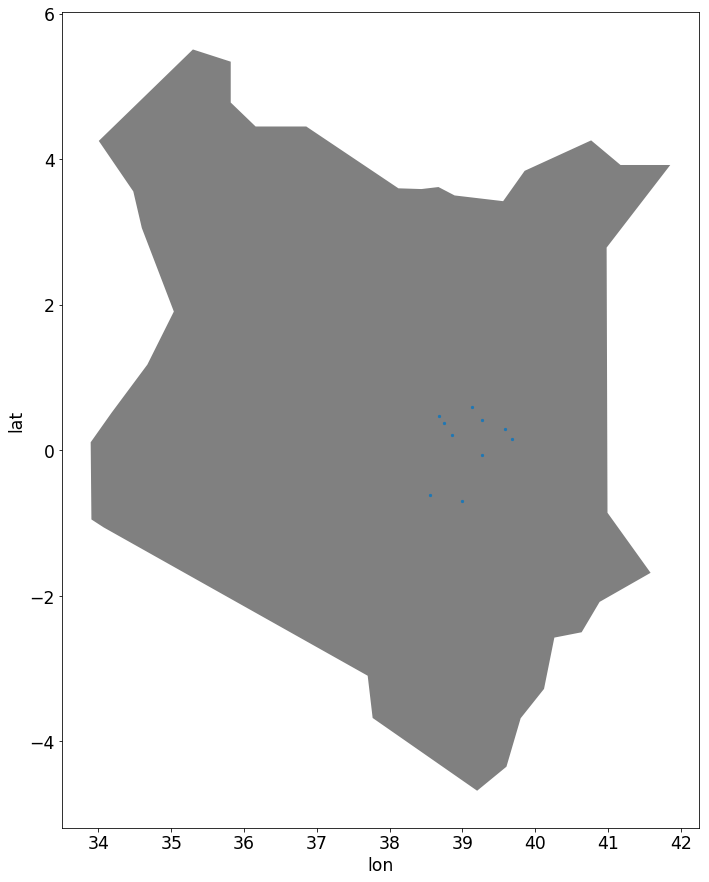

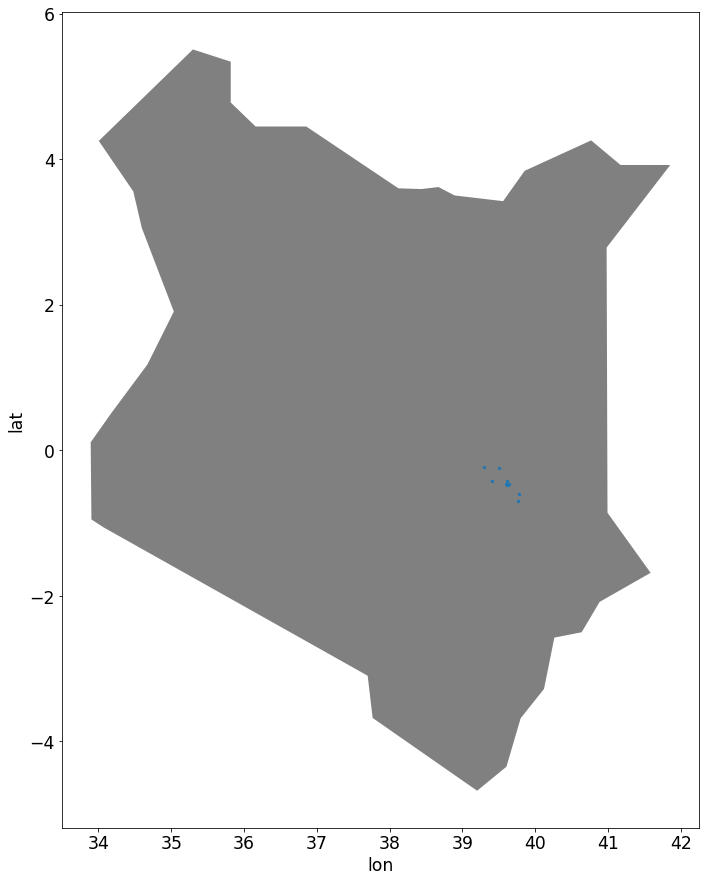

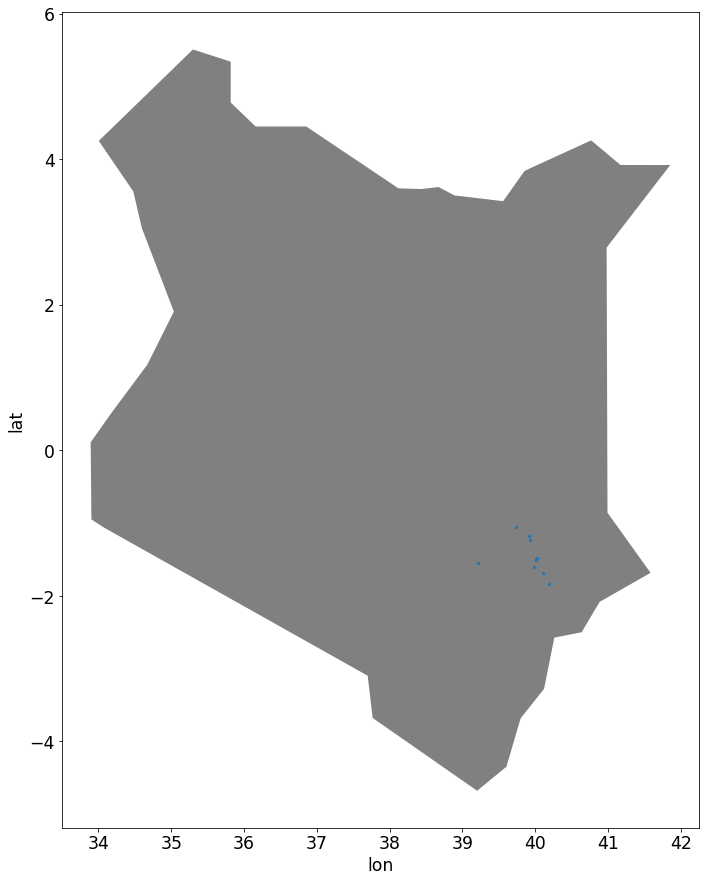

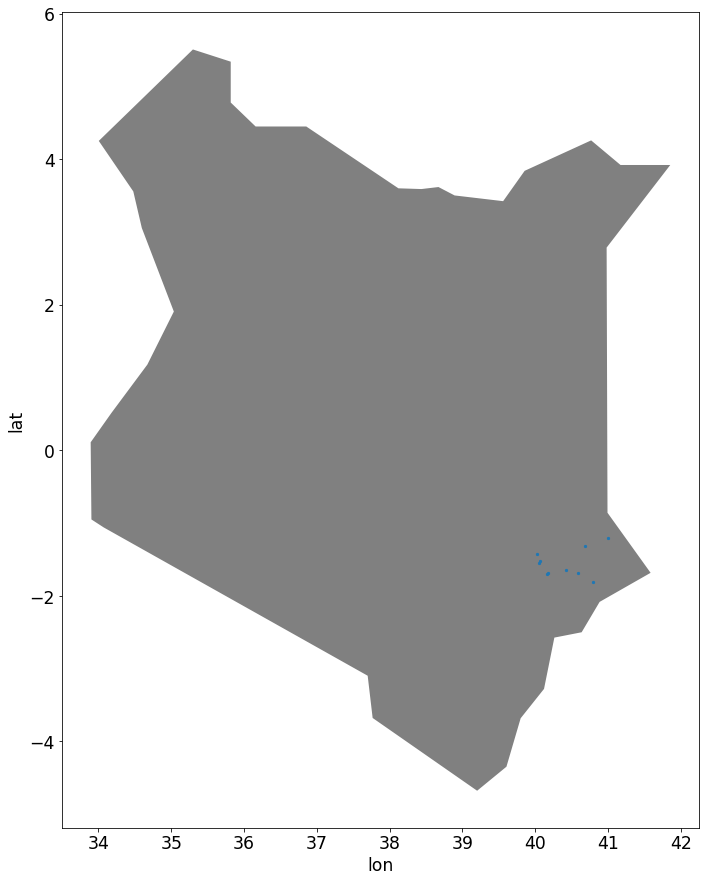

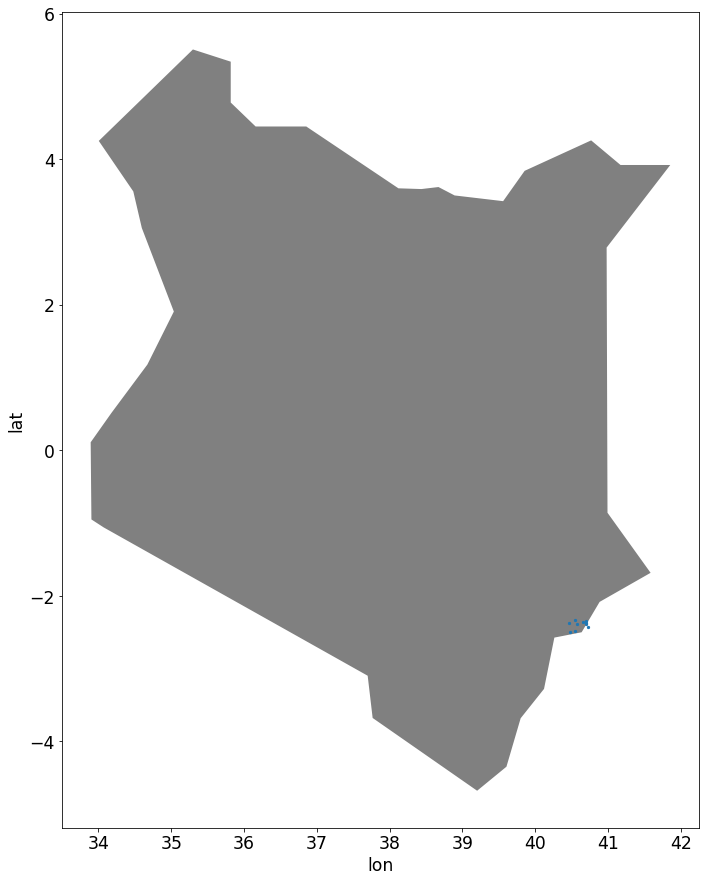

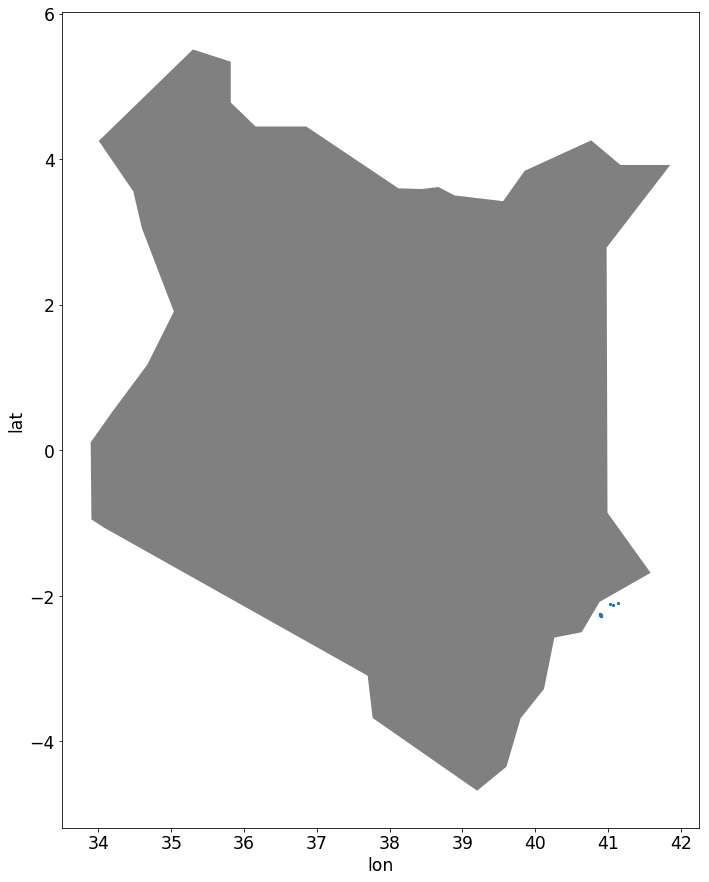

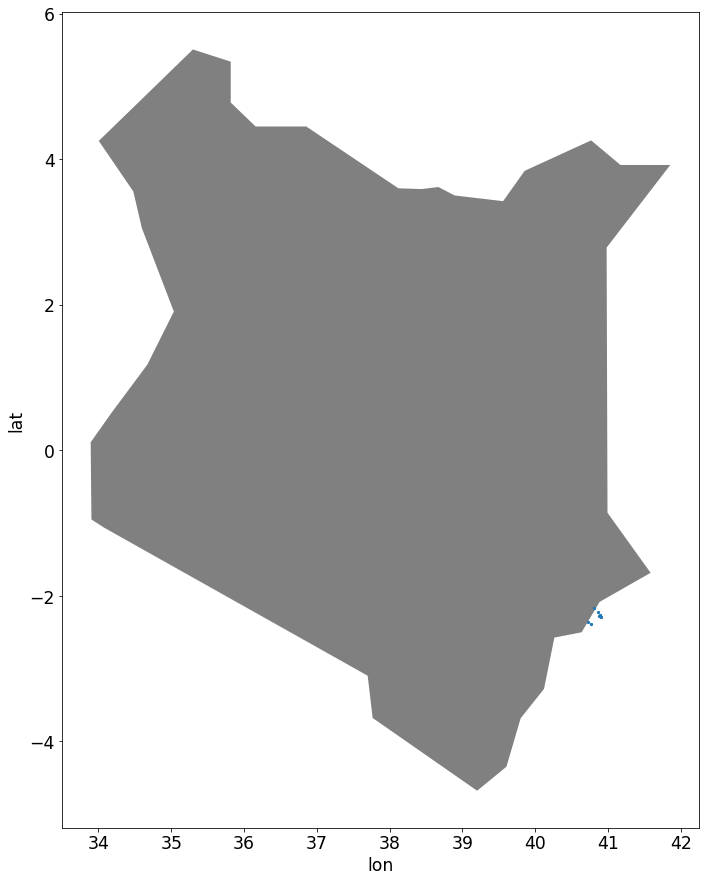

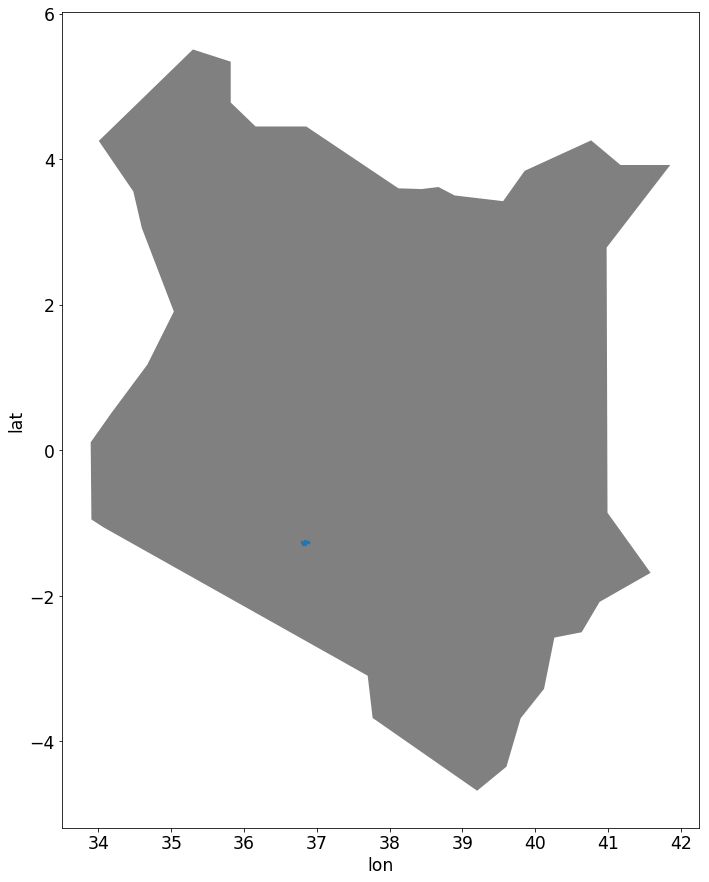

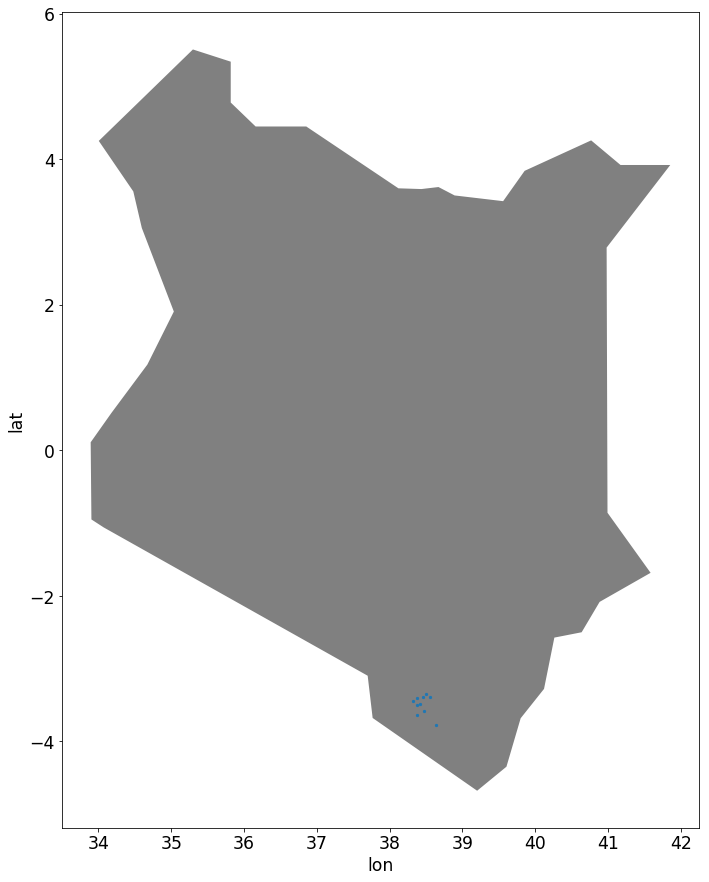

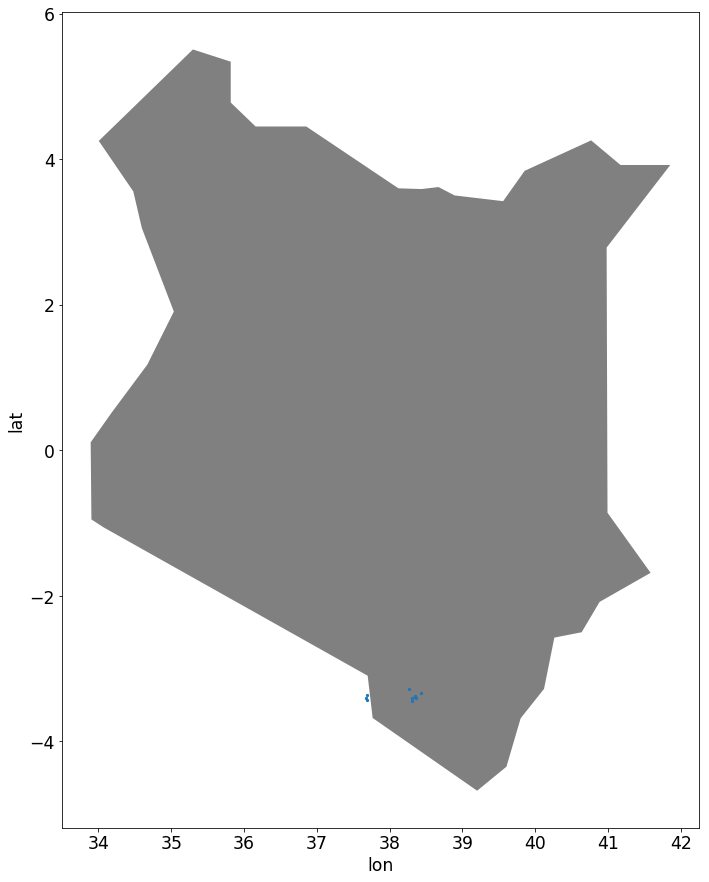

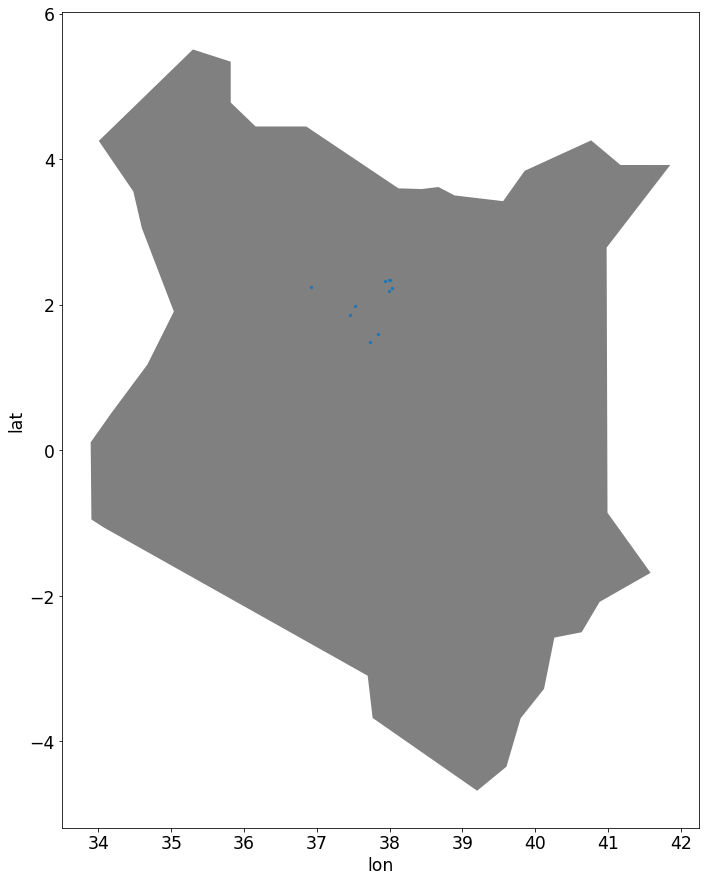

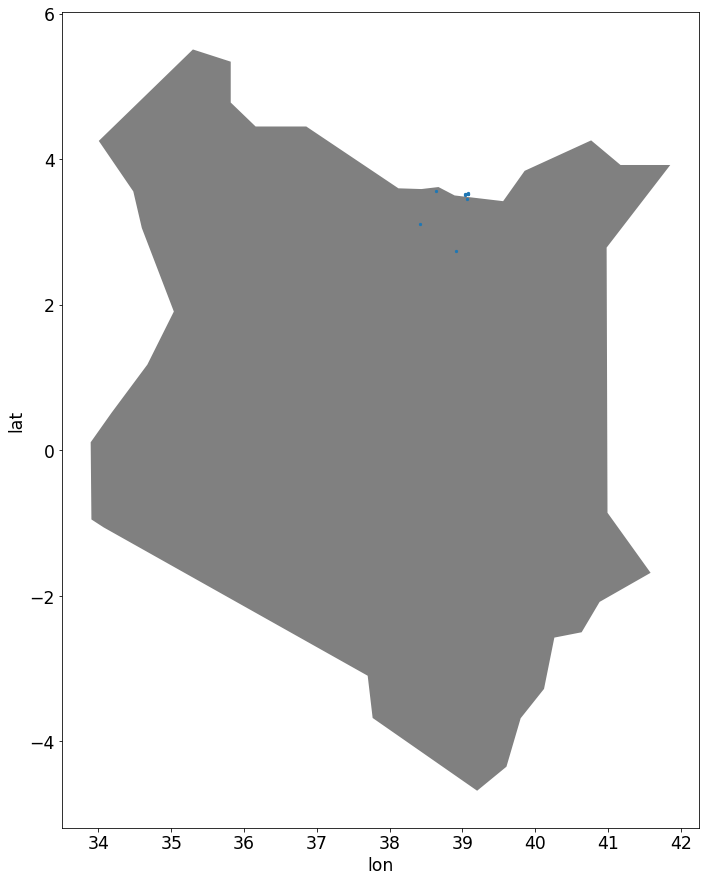

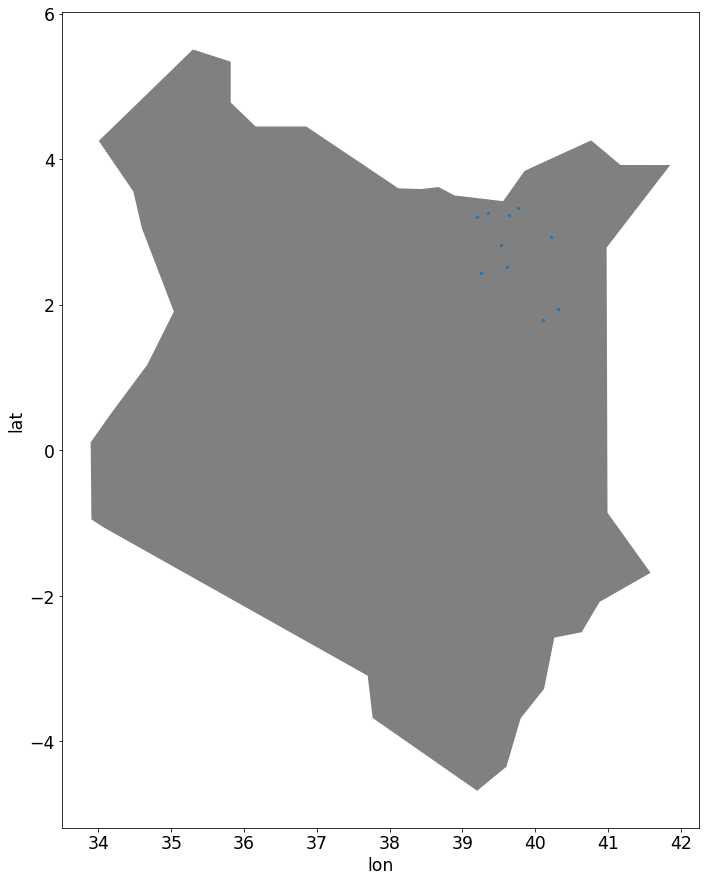

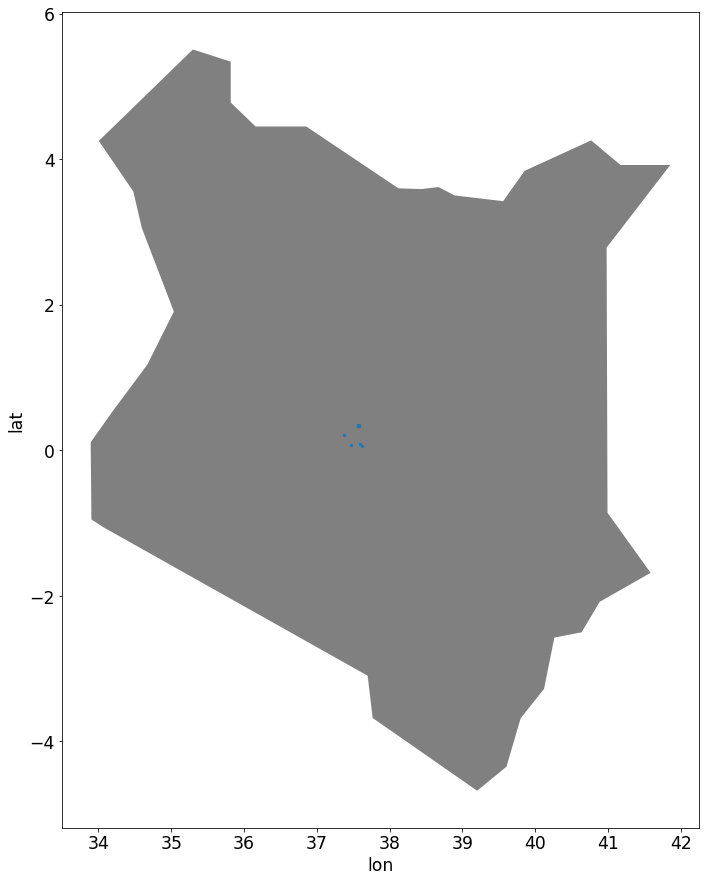

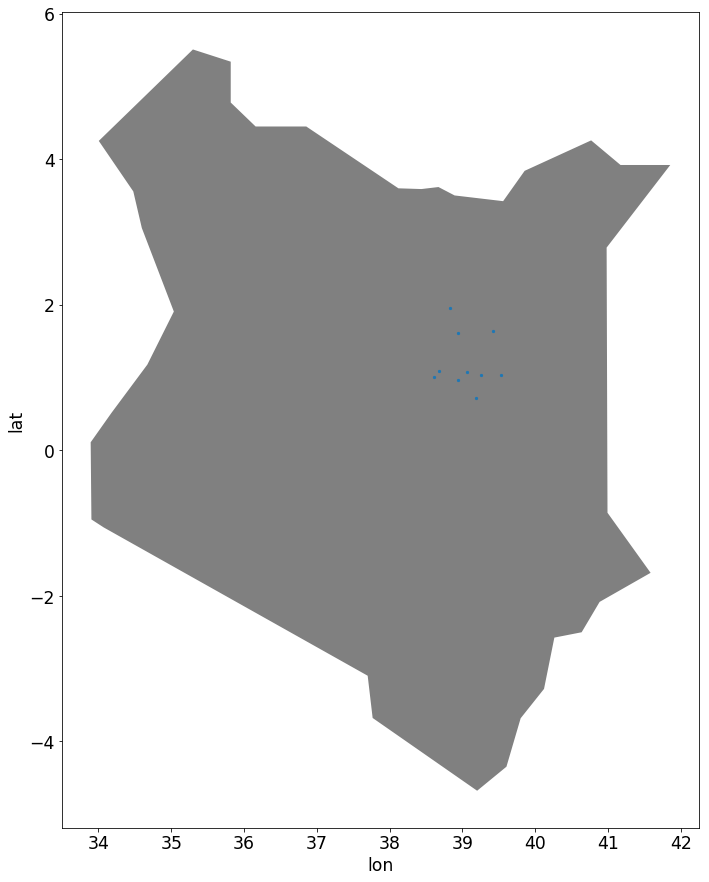

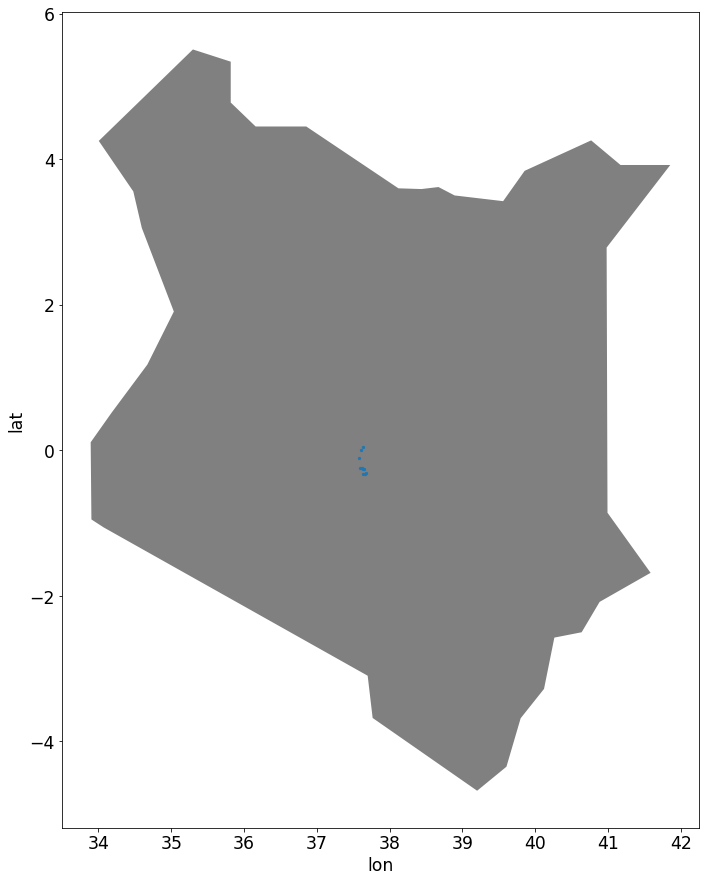

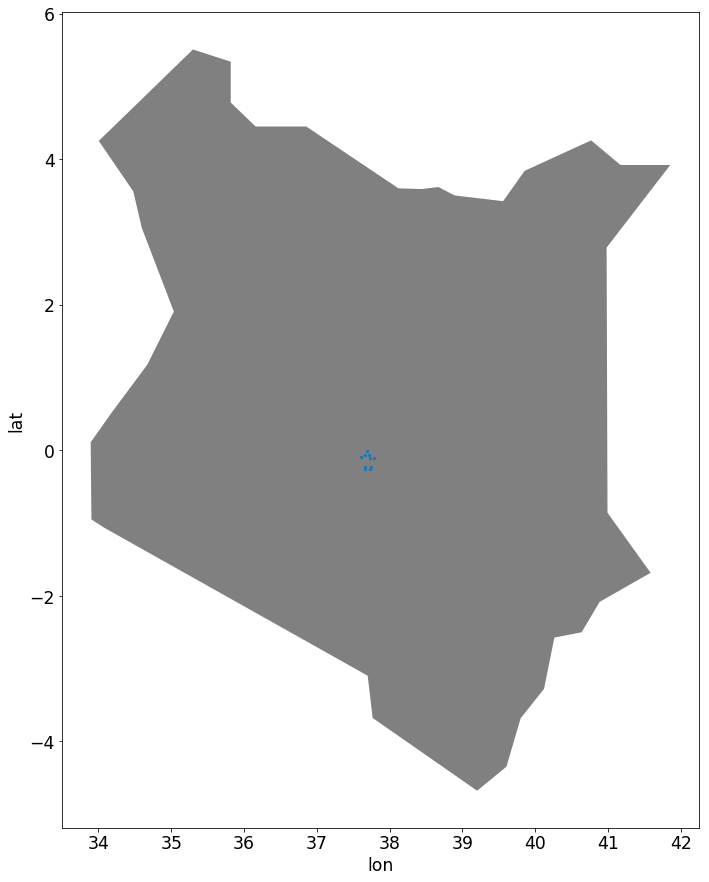

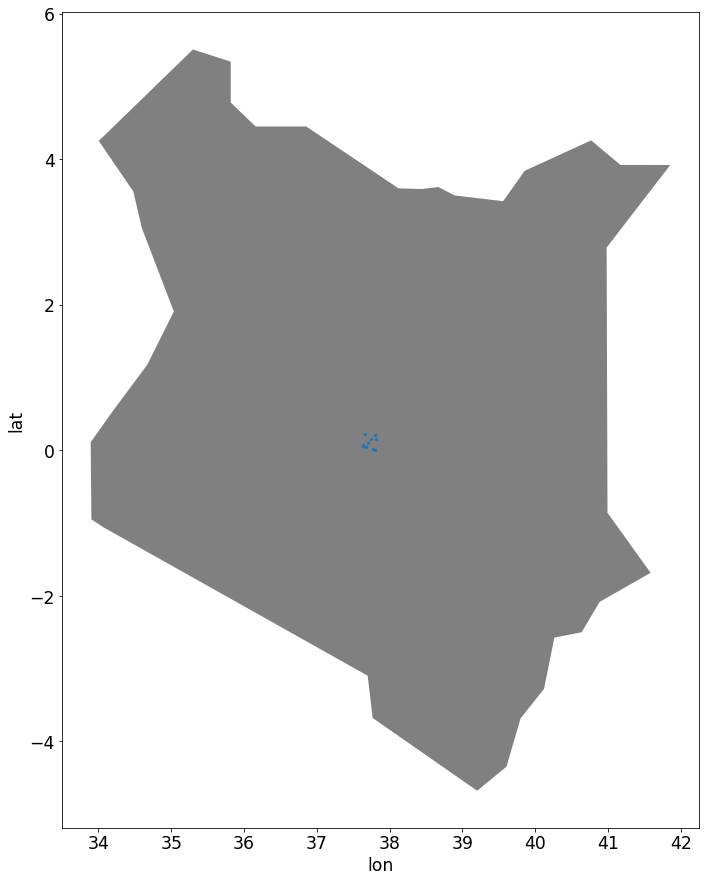

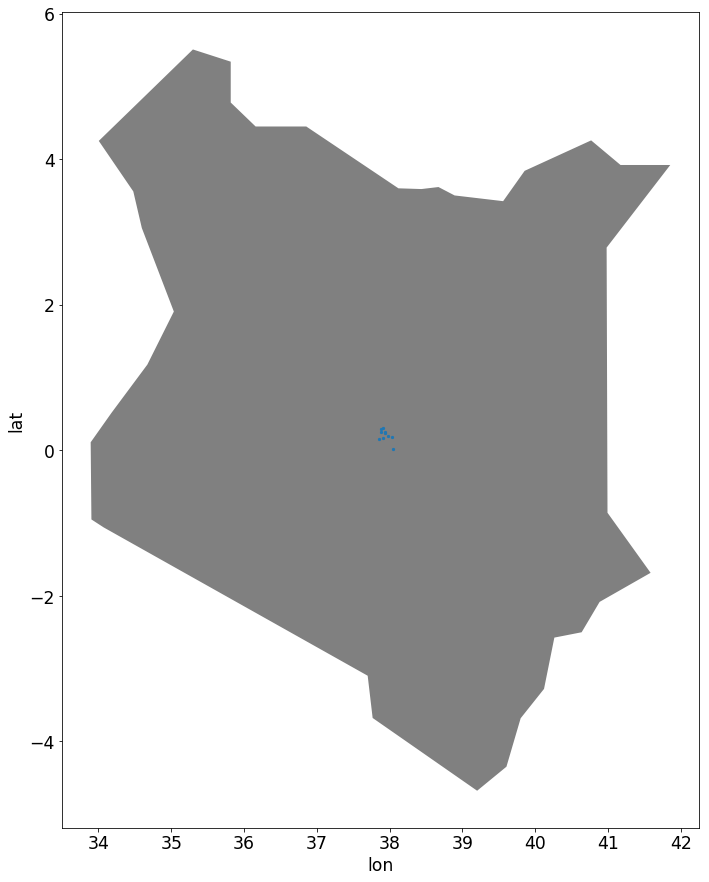

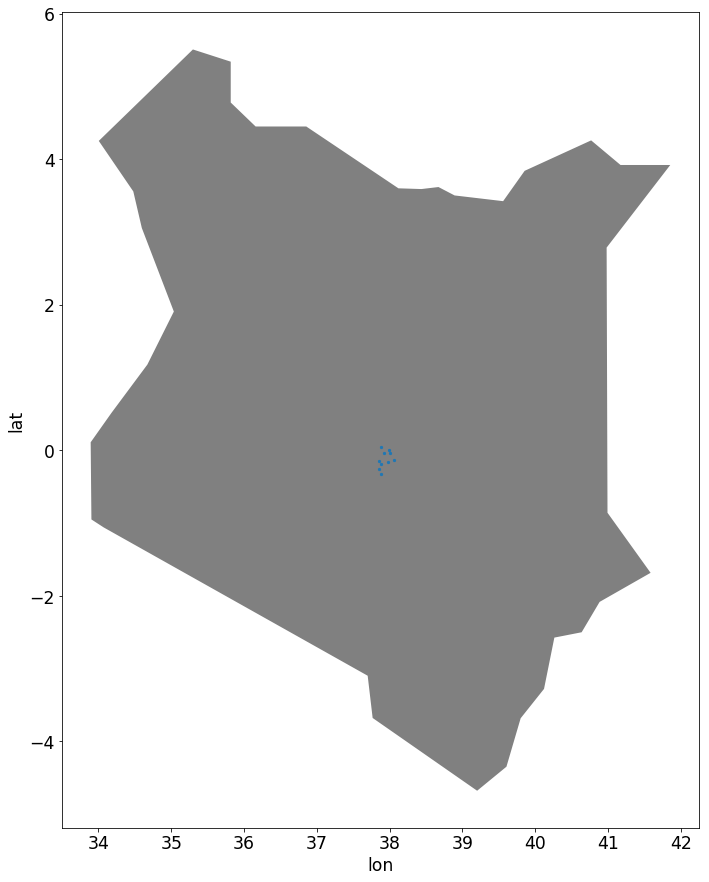

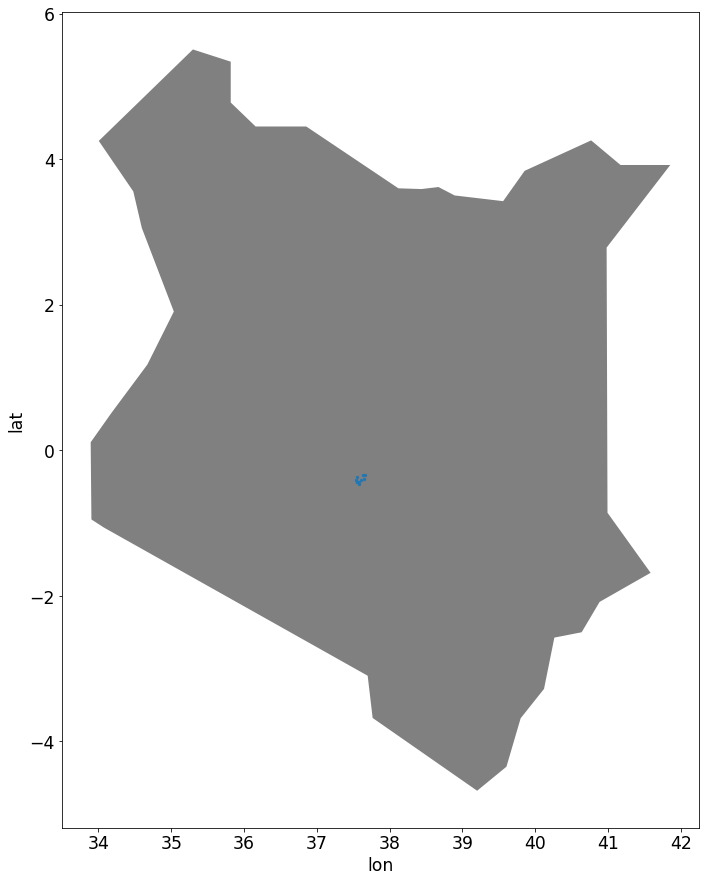

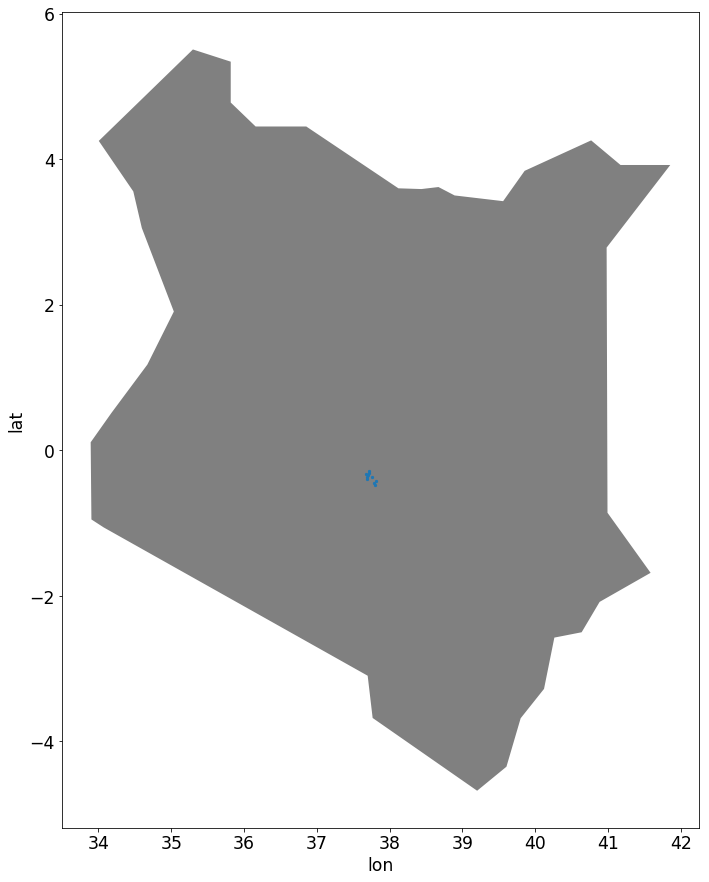

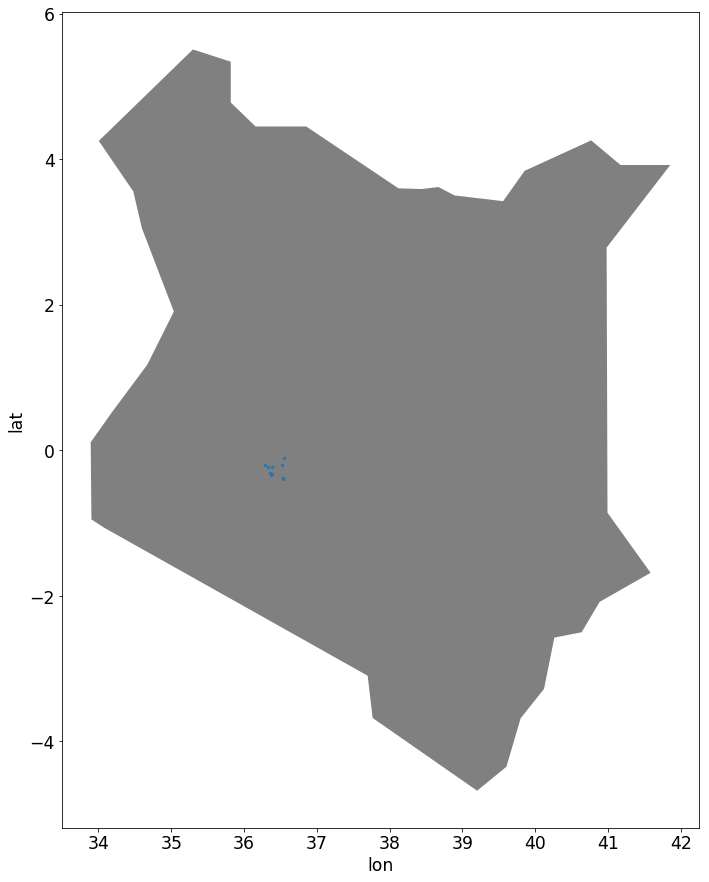

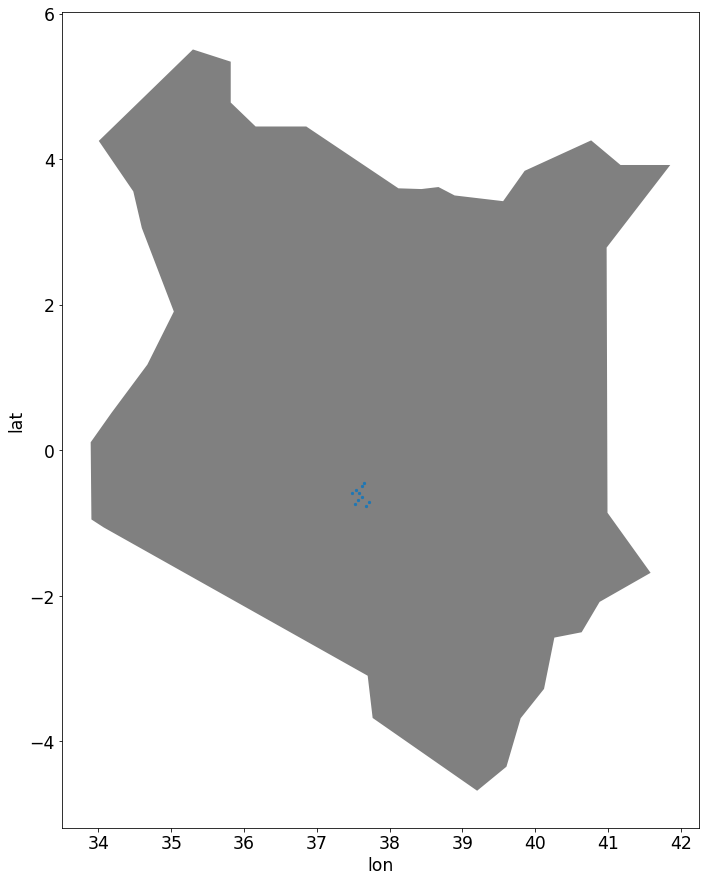

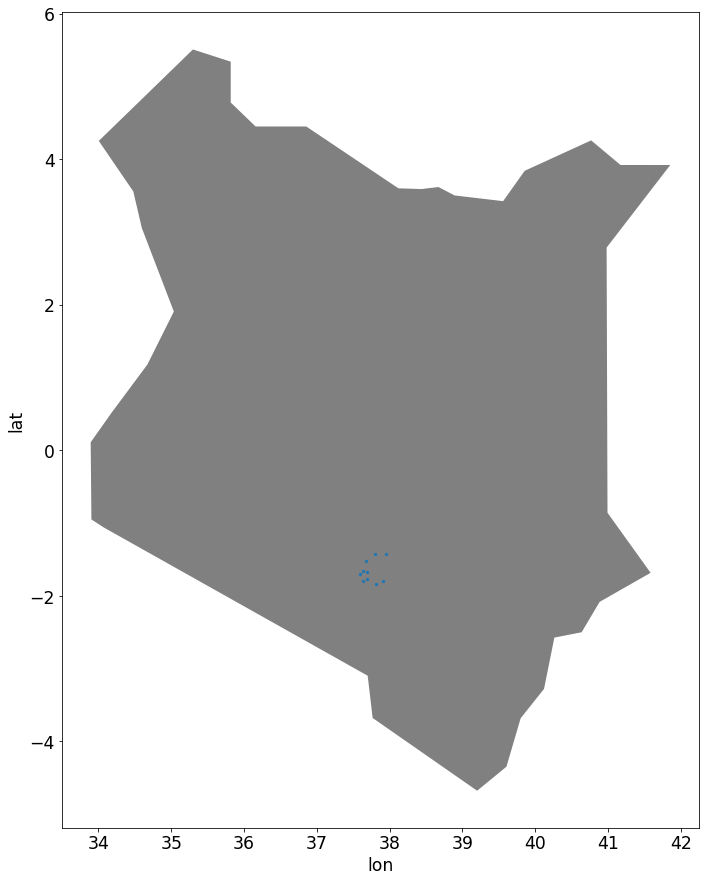

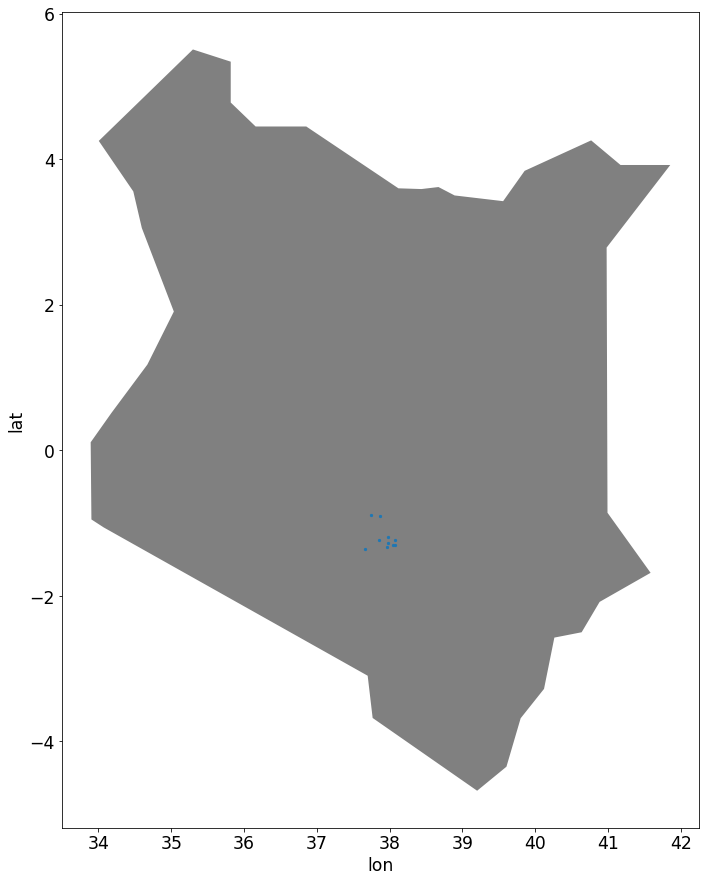

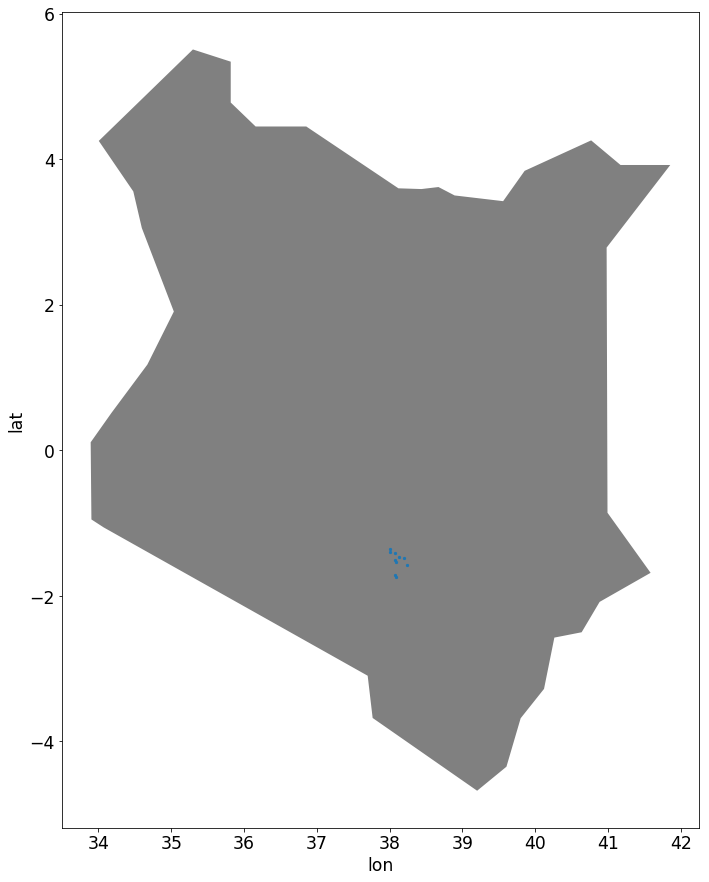

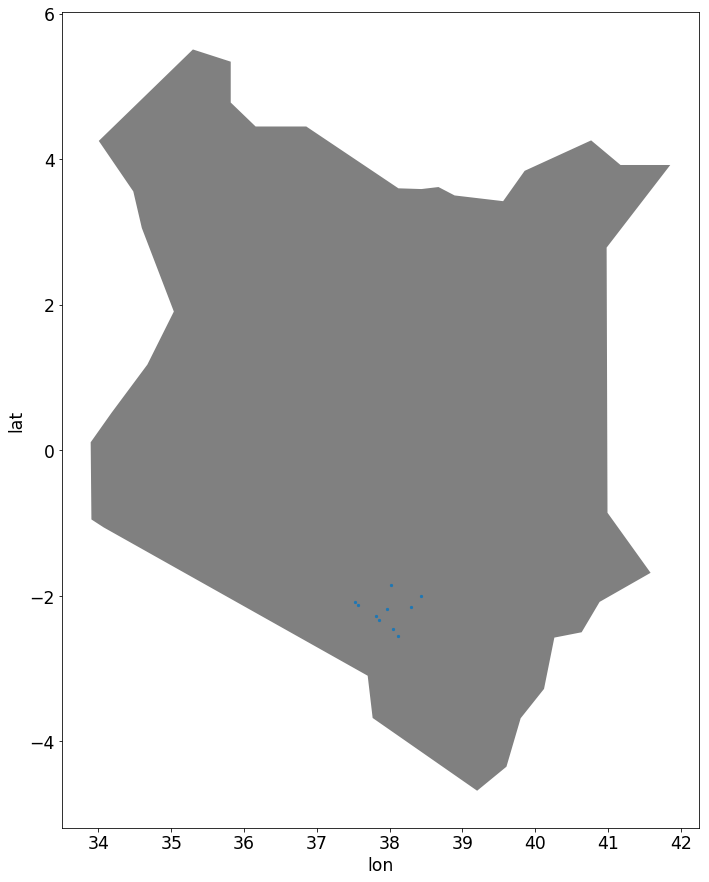

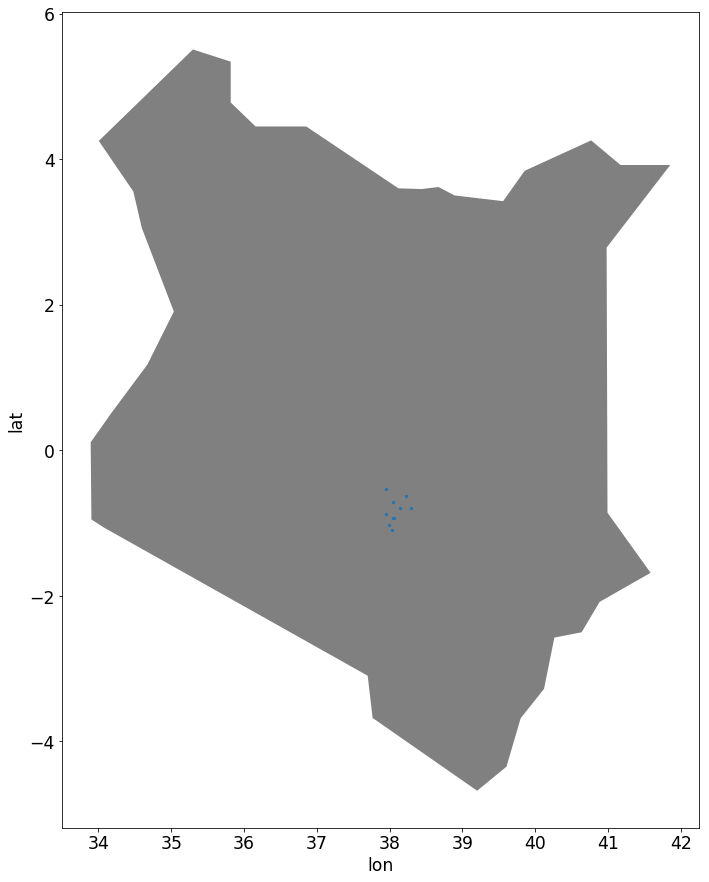

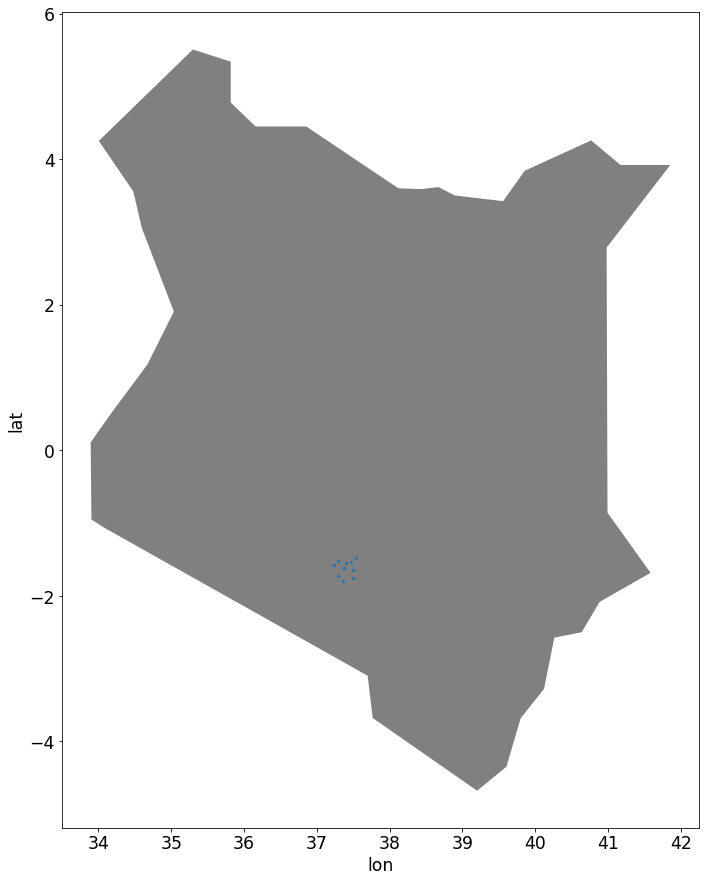

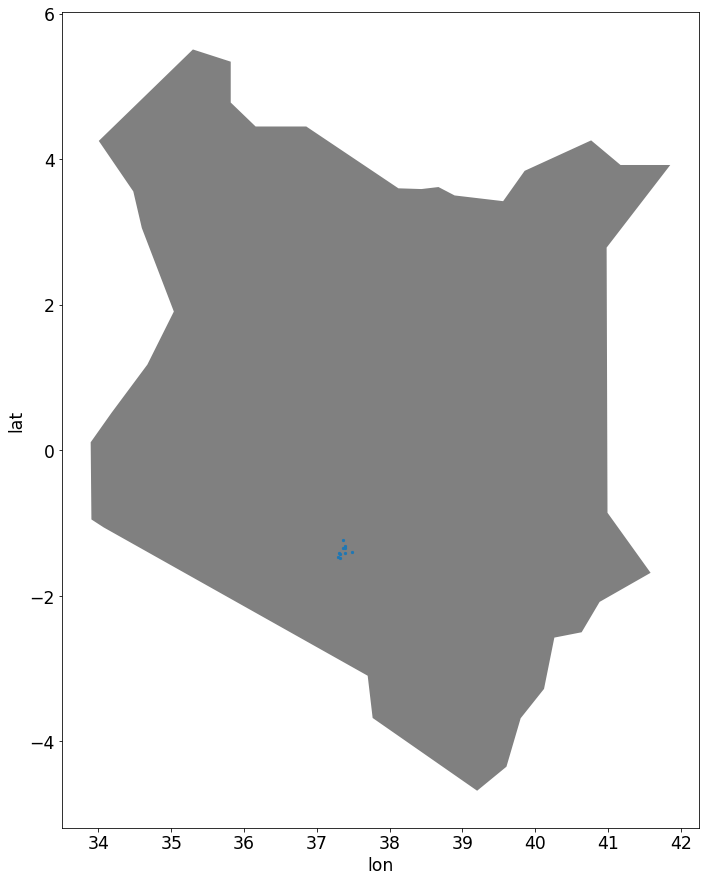

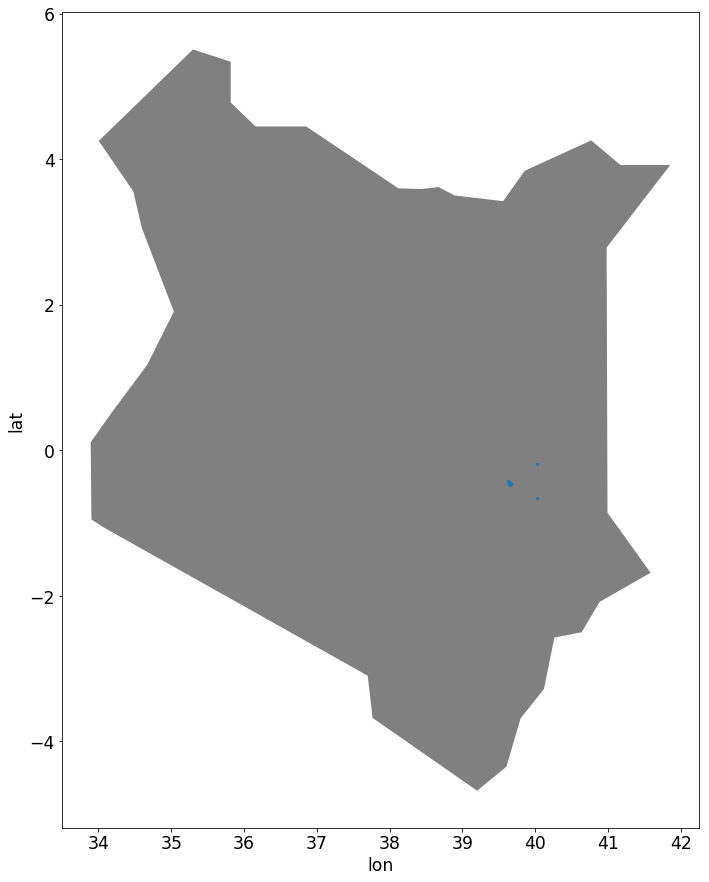

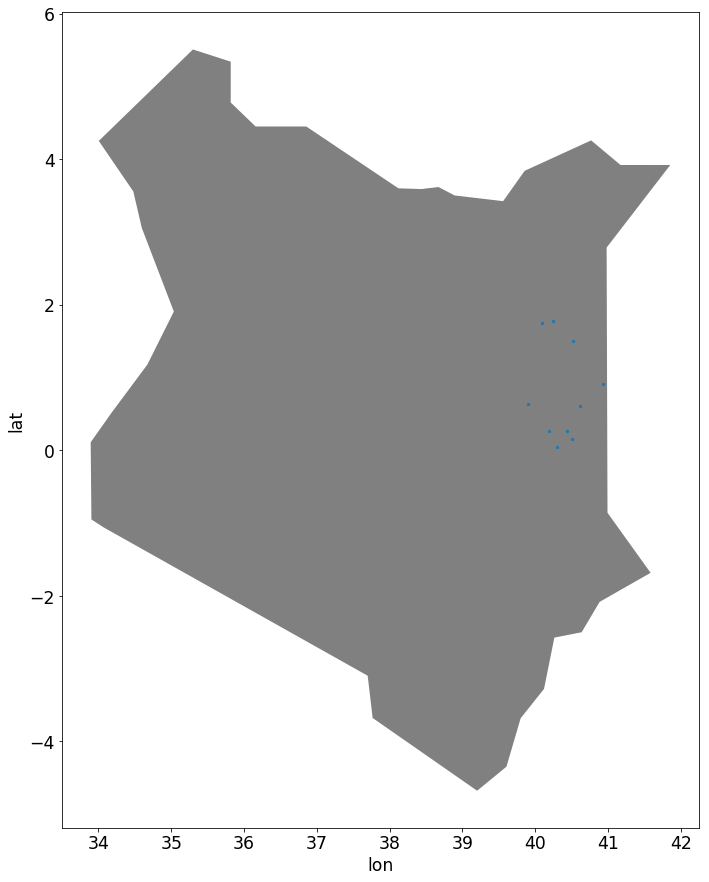

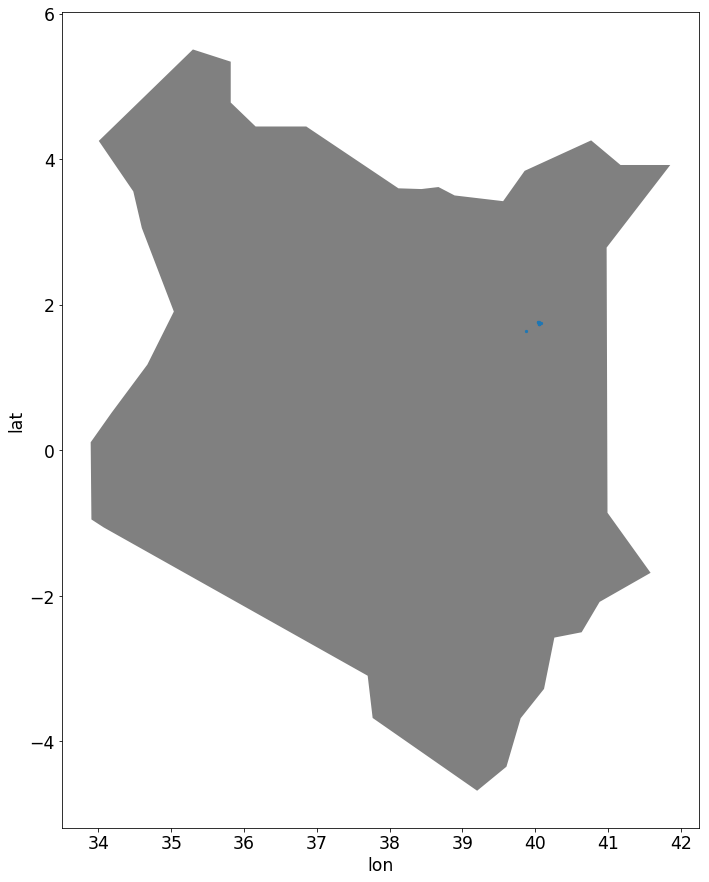

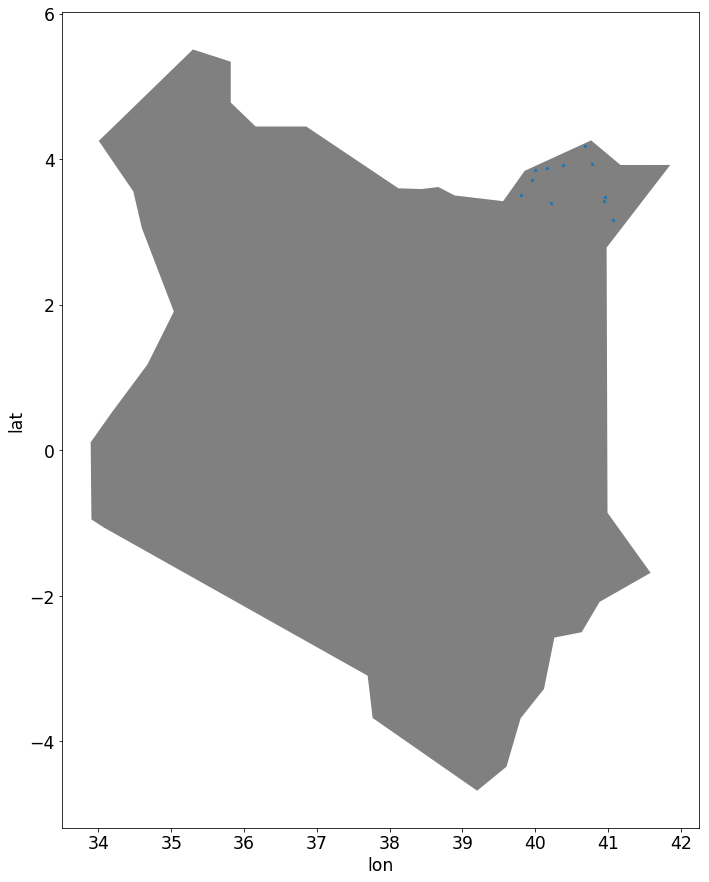

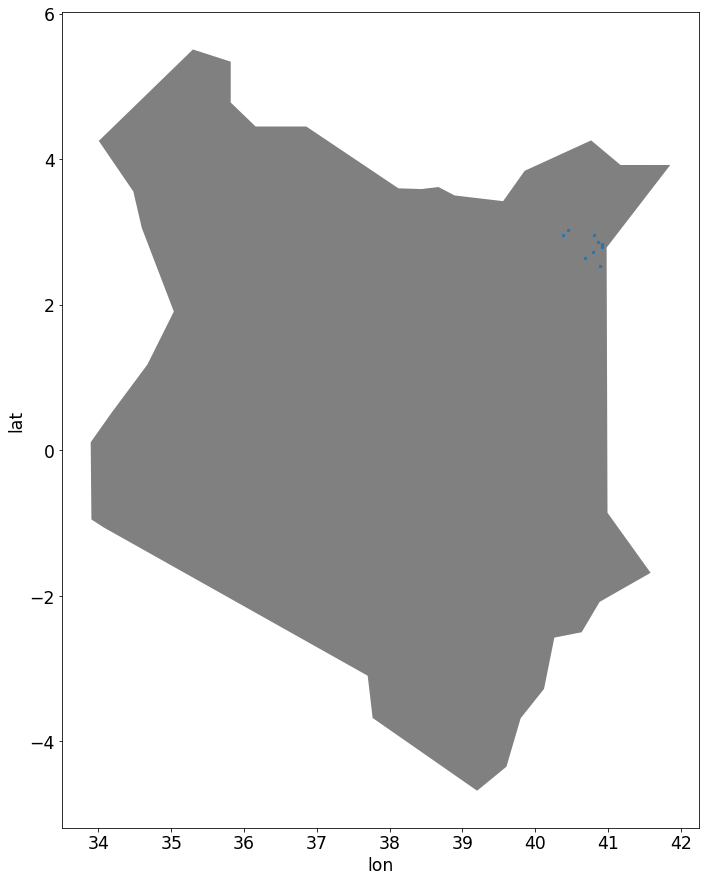

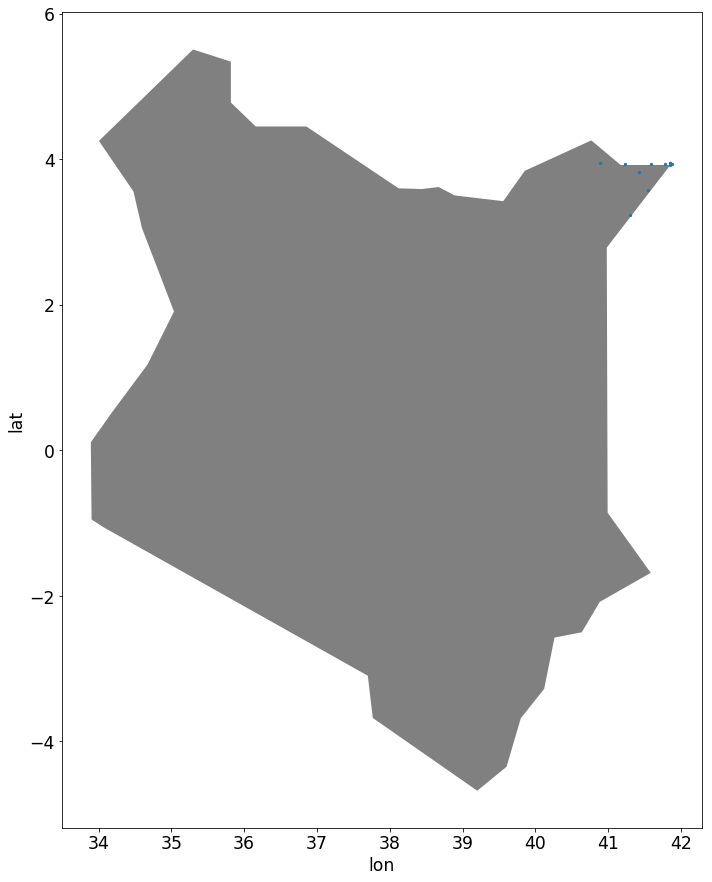

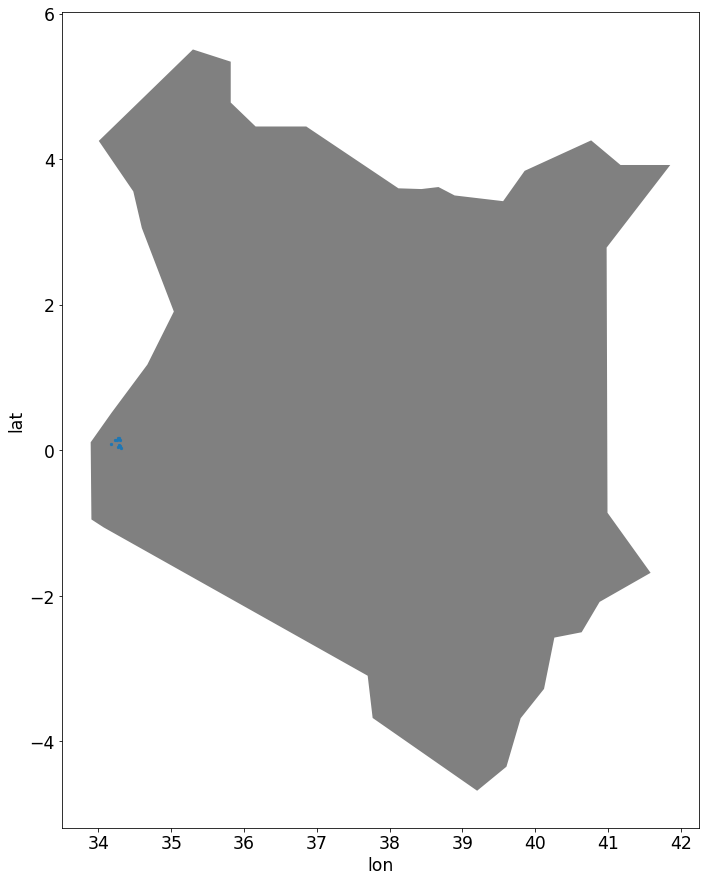

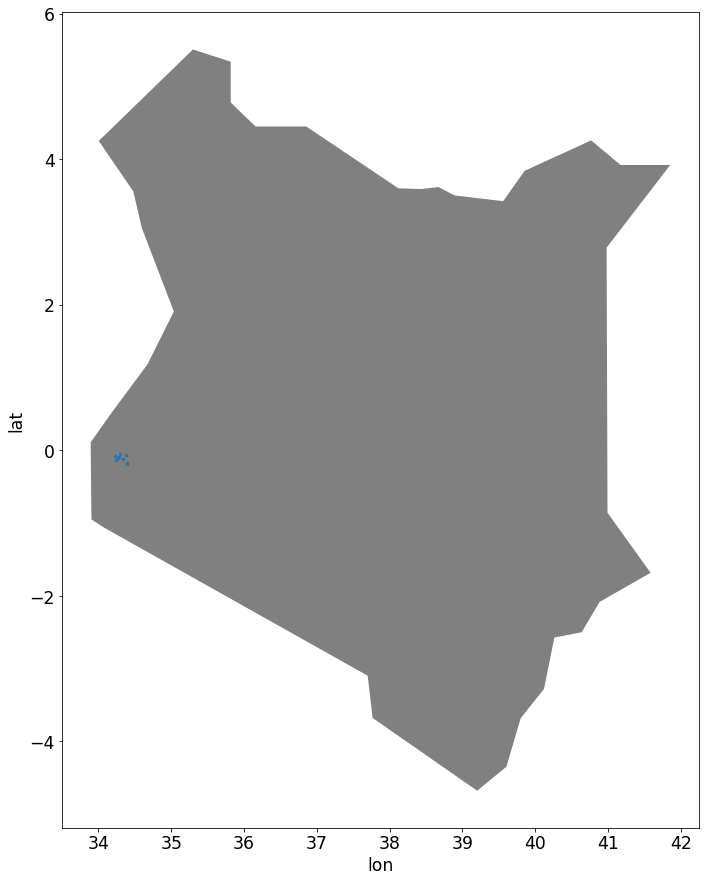

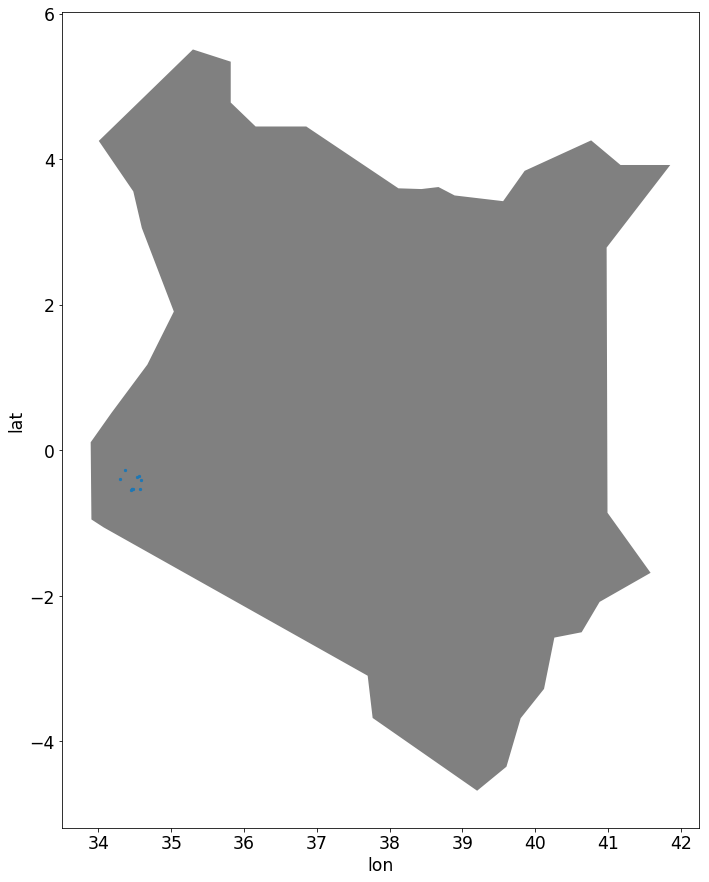

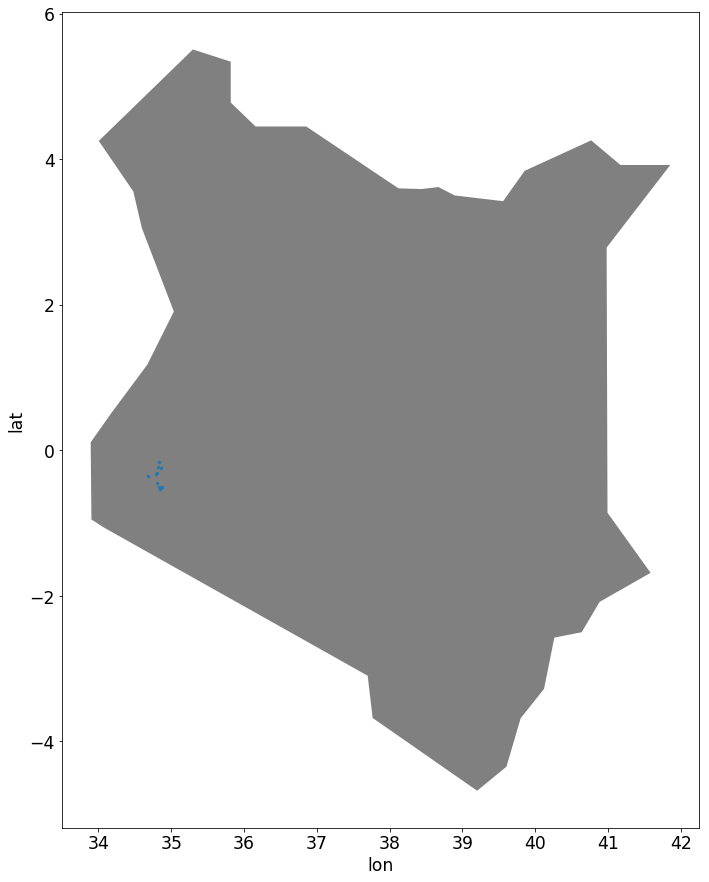

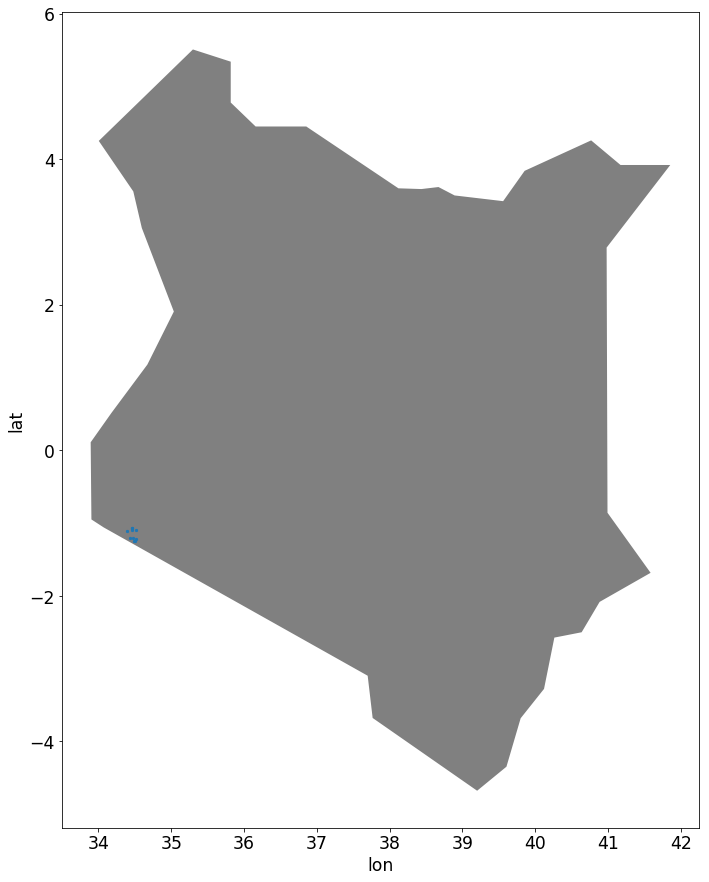

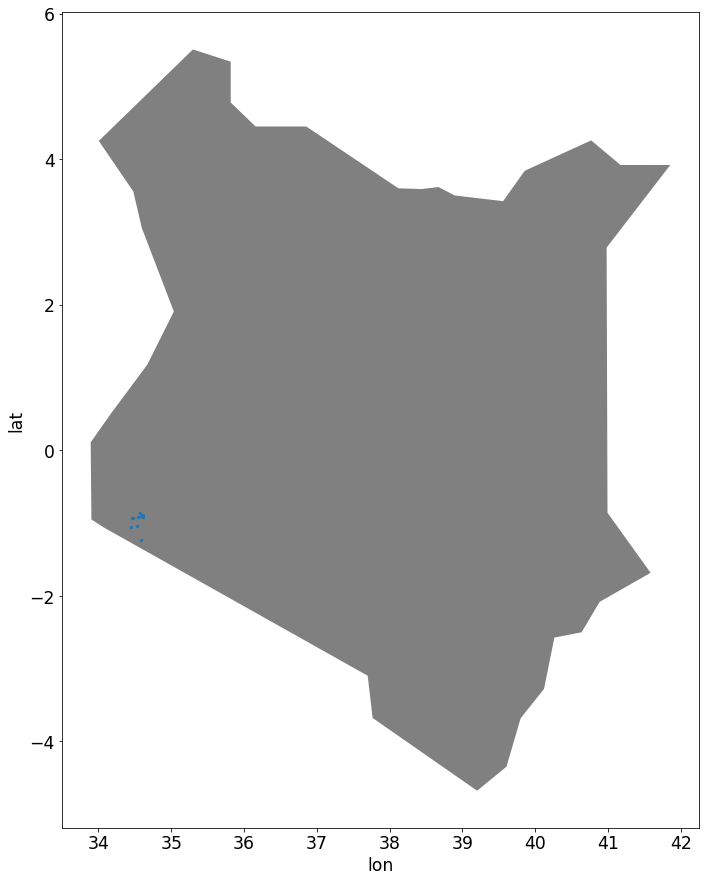

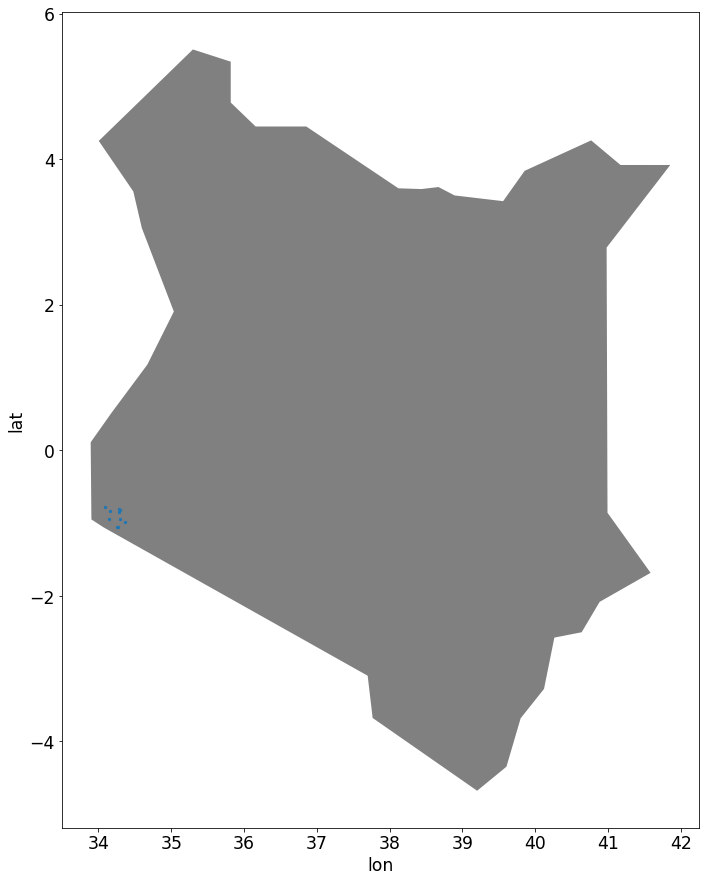

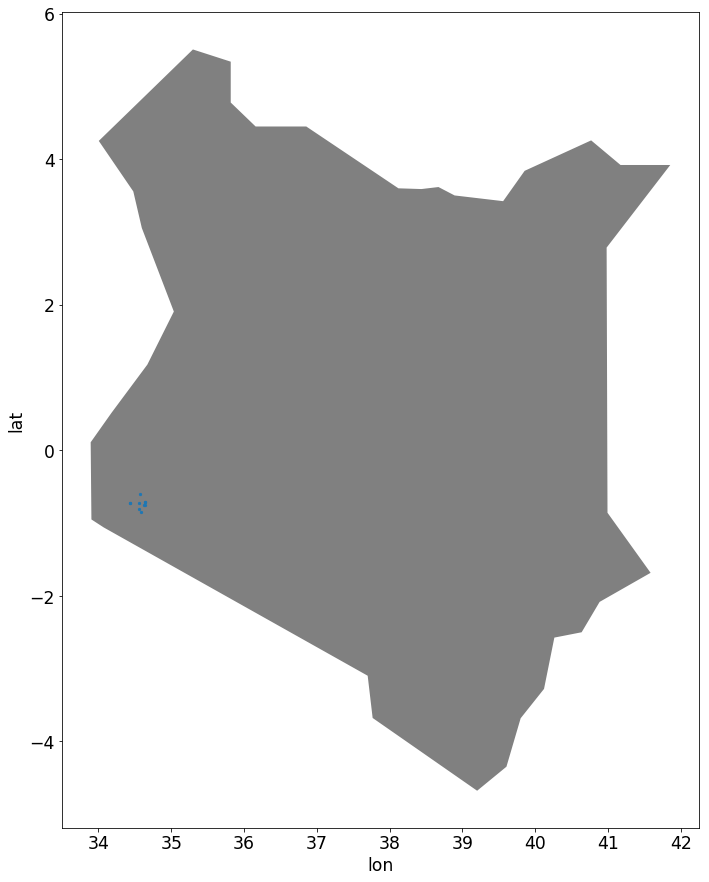

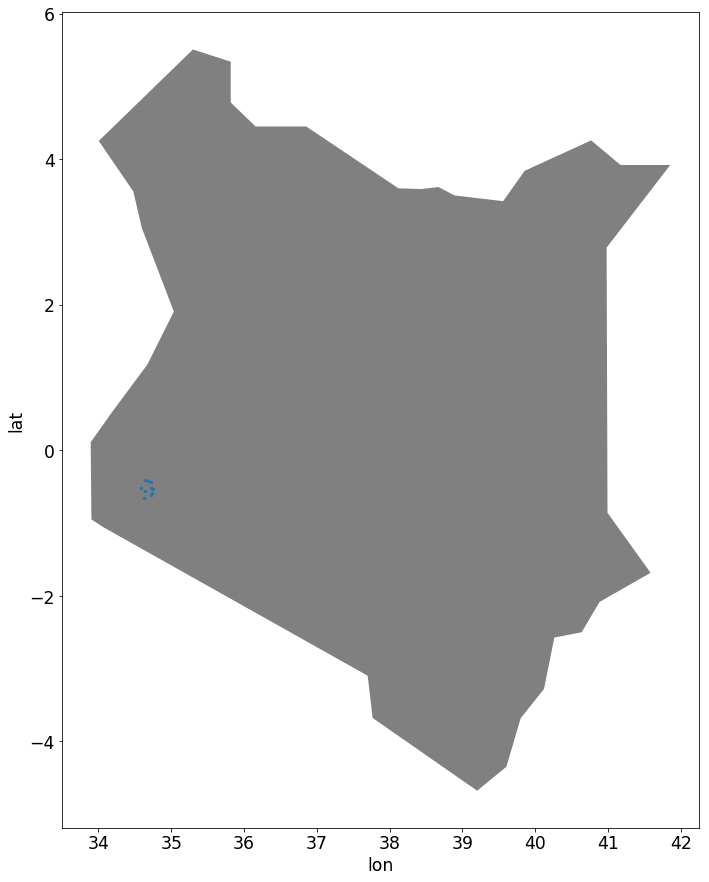

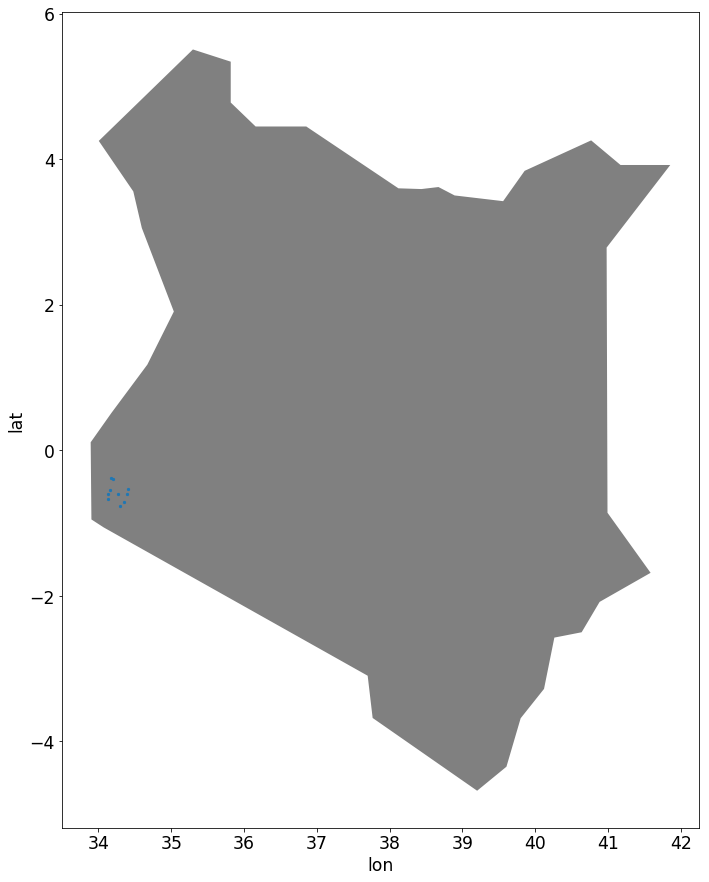

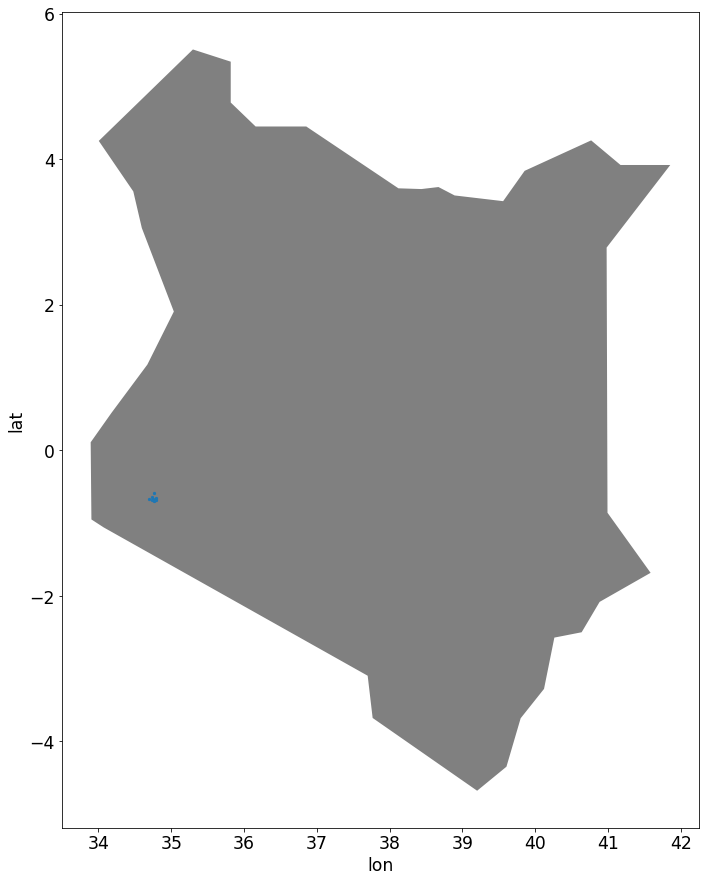

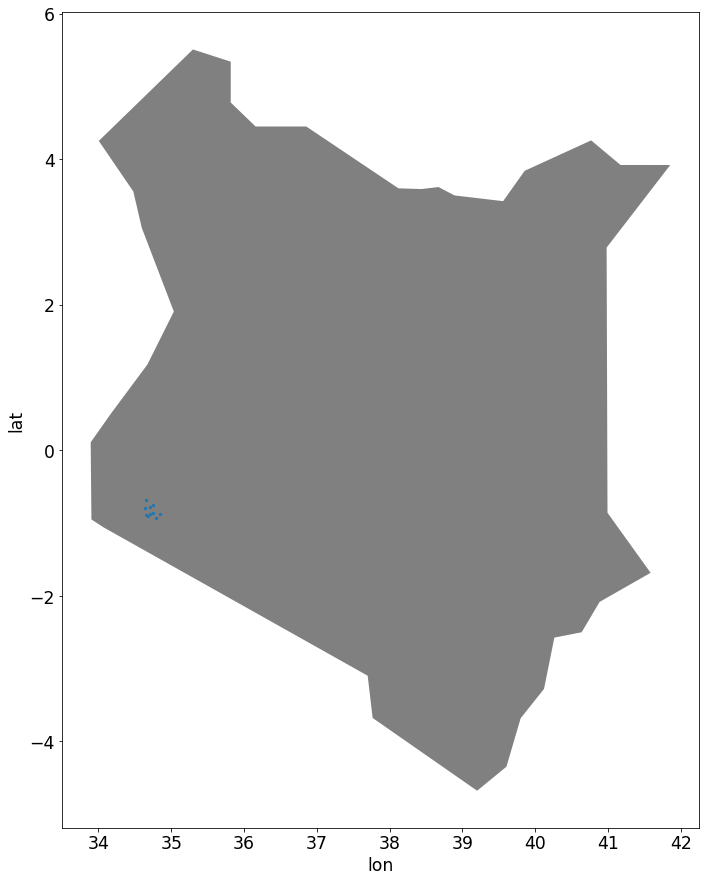

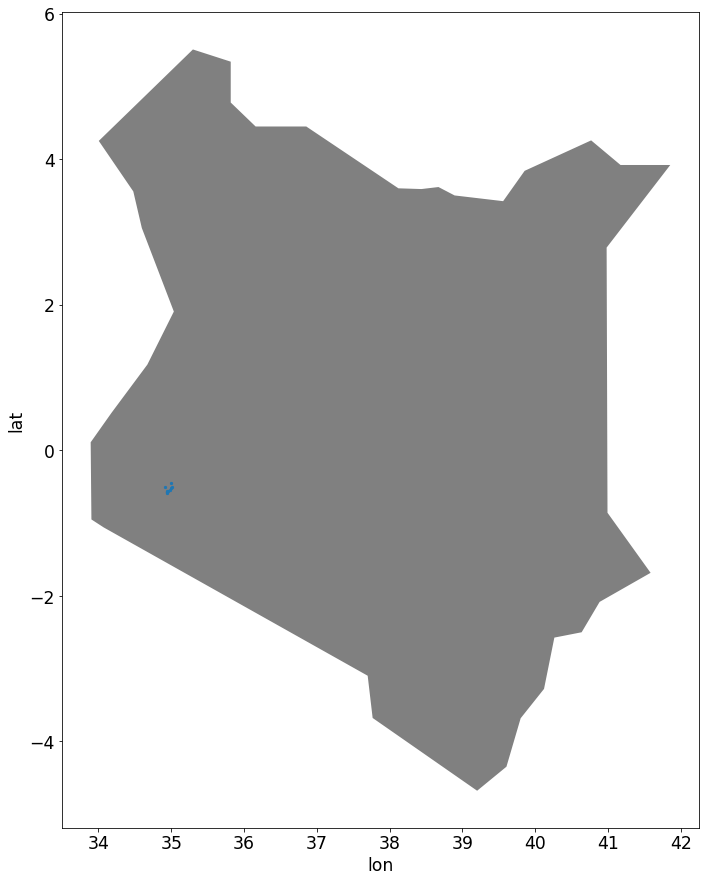

In [63]:
sc_ids = test_df.supercluster_id.to_numpy()
for sc in scs:
    ax = world[world.name=='Kenya'].plot(color="grey")
    some_clusters = test_df[(test_df.supercluster_id == sc)]
    some_clusters.plot(ax=ax, x='lon', y='lat', kind='scatter', s=5)

In [74]:
countries = cluster_df.country.unique()
country_dfs = []
for country in countries:
    print('Now clustering for {}'.format(country))
    country_df = cluster_df.loc[cluster_df.country==country]
    country_code = country_df.cluster_id.iloc[0][:2]
    pre_dists = get_dist_matrix(country_df)
    dists = np.copy(pre_dists)
    clusters = nearestNeighborClustering(dists)
    for i, (cluster, cost) in enumerate(clusters):
        country_df.loc[country_df.index[cluster], 'supercluster_id'] = '{}_SC_{}'.format(country_code, i)
    country_dfs.append(country_df)
final_df = pd.concat(country_dfs)
final_df

Now clustering for Armenia
Now clustering for Angola
Now clustering for Bangladesh
Now clustering for Benin
Now clustering for Burundi
Now clustering for Egypt
Now clustering for Ethiopia
Now clustering for Ghana
Now clustering for Haiti
Now clustering for India
Now clustering for Kenya
Now clustering for Cambodia
Now clustering for Lesotho
Now clustering for Myanmar
Now clustering for Malawi
Now clustering for Mozambique
Now clustering for Nepal
Now clustering for Philippines
Now clustering for Rwanda
Now clustering for Chad
Now clustering for Tajikistan
Now clustering for Timor
Now clustering for Tanzania
Now clustering for Uganda
Now clustering for Zimbabwe


country  cluster_id        lat        lon supercluster_id
0       Armenia    AM2015_1  40.208171  44.471346        AM_SC_29
1       Armenia   AM2015_10  40.202011  44.511379        AM_SC_29
2       Armenia  AM2015_100  40.141674  44.034517        AM_SC_18
3       Armenia  AM2015_101  40.149292  44.027902        AM_SC_18
4       Armenia  AM2015_102  40.087035  44.007822        AM_SC_18
...         ...         ...        ...        ...             ...
42099  Zimbabwe   ZW2015_95 -18.341095  29.890007        ZW_SC_38
42100  Zimbabwe   ZW2015_96 -21.357135  30.645874         ZW_SC_1
42101  Zimbabwe   ZW2015_97 -19.452031  29.773865        ZW_SC_35
42102  Zimbabwe   ZW2015_98 -20.131983  28.513421        ZW_SC_17
42103  Zimbabwe   ZW2015_99 -20.940917  29.031395        ZW_SC_15

[42104 rows x 5 columns]

In [101]:
countries = cluster_df.country.unique()
country_dfs = []
for country in ['Armenia', 'Mozambique']:
    print('Now clustering for {}'.format(country))
    country_df = cluster_df.loc[cluster_df.country==country]
    country_code = country_df.cluster_id.iloc[0][:2]
    dists = get_dist_matrix(country_df)
#     dists = np.copy(pre_dists)
    clusters = nearestNeighborClustering(dists)
    for i, (cluster, cost) in enumerate(clusters):
        country_df.loc[country_df.index[cluster], 'supercluster_id'] = '{}_SC_{}'.format(country_code, i)
        country_df.loc[country_df.index[cluster], 'mean_dist_supercluster_km'] = cost[0]
        country_df.loc[country_df.index[cluster], 'max_dist_supercluster_km'] = cost[1]
    country_dfs.append(country_df)
short_df = pd.concat(country_dfs)
short_df

Now clustering for Armenia
Now clustering for Mozambique


country  cluster_id        lat        lon supercluster_id  \
0         Armenia    AM2015_1  40.208171  44.471346        AM_SC_29   
1         Armenia   AM2015_10  40.202011  44.511379        AM_SC_29   
2         Armenia  AM2015_100  40.141674  44.034517        AM_SC_18   
3         Armenia  AM2015_101  40.149292  44.027902        AM_SC_18   
4         Armenia  AM2015_102  40.087035  44.007822        AM_SC_18   
...           ...         ...        ...        ...             ...   
36875  Mozambique   MZ2015_95 -16.620030  38.888548        MZ_SC_13   
36876  Mozambique   MZ2015_96 -13.855072  35.302063         MZ_SC_2   
36877  Mozambique   MZ2015_97 -22.047835  35.299665        MZ_SC_22   
36878  Mozambique   MZ2015_98 -26.033517  32.324164         MZ_SC_3   
36879  Mozambique   MZ2015_99 -25.940533  32.554837         MZ_SC_8   

       mean_dist_supercluster_km  max_dist_supercluster_km  
0                       2.321334                  5.383238  
1                       2.321334                  5.383238  
2                       7.129192                 15.378430  
3                       7.129192                 15.378430  
4                       7.129192                 15.378430  
...                          ...                       ...  
36875                 117.676113                252.486045  
36876                  56.207894                217.803261  
36877                  92.399823                261.318742  
36878                  25.069258                 75.096333  
36879                   3.605756                  7.755765  

[619 rows x 7 columns]

In [114]:
# final_df[['country', 'supercluster_id']].drop_duplicates()
agg_df = short_df[['country', 'supercluster_id', 'mean_dist_supercluster_km', 'max_dist_supercluster_km', 'cluster_id']] \
    .groupby('supercluster_id', as_index=False).agg({'country': 'max', 'mean_dist_supercluster_km': 'max', 'max_dist_supercluster_km': 'max', 'cluster_id' : 'count'})

In [117]:
agg_df.rename(columns={'cluster_id' : 'num_clusters'})

supercluster_id     country  mean_dist_supercluster_km  \
0          AM_SC_0     Armenia                  19.179595   
1          AM_SC_1     Armenia                  21.361394   
2         AM_SC_10     Armenia                   5.703680   
3         AM_SC_11     Armenia                  21.299009   
4         AM_SC_12     Armenia                  16.202572   
..             ...         ...                        ...   
56         MZ_SC_5  Mozambique                  97.099094   
57         MZ_SC_6  Mozambique                 162.875236   
58         MZ_SC_7  Mozambique                   5.086010   
59         MZ_SC_8  Mozambique                   3.605756   
60         MZ_SC_9  Mozambique                   4.939850   

    max_dist_supercluster_km  num_clusters  
0                  41.834979            11  
1                  45.603634            11  
2                  11.892082            10  
3                  48.943656            10  
4                  31.641181            10  
..                       ...           ...  
56                215.636041            11  
57                347.026116            10  
58                 10.404835            10  
59                  7.755765            10  
60                 12.474100            10  

[61 rows x 5 columns]